# MSCI ACWI Index v.s. misc. MSCI Indexes, using Random Portfolios and Portfolio Optimizer

> This notebook illustrates the usage of random portfolios in Python, using the [Portfolio Optimizer](https://portfoliooptimizer.io/) Web API.

> Idea is to analyze if investing in different MSCI World/Emerging Markets indexes - including small caps and factor indexes - leads to better performances v.s. the MSCI ACWI index.

> Let's first import the prices of the different MSCI indexes.

In [1]:
import numpy as np
import pandas as pd

# Define the (net return) prices for each asset (in USD), until 2021 10 29:
# - MSCI EMU Index
# - MSCI USA Index (equivalent to S&P 500)
# - MSCI World Index
# - MSCI Emerging Markets Index
# - MSCI Emerging Markets IMI Index
# - MSCI World Small Cap Index
# - MSCI World Quality Index
# - MSCI World Momentum Index
# - MSCI All Country World Index
asset_prices = [{"msci_index_code":"106400","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":35.91850672,"calc_date":19871231},{"level_eod":33.02040215,"calc_date":19880129},{"level_eod":37.027809930000004,"calc_date":19880229},{"level_eod":37.4974914,"calc_date":19880331},{"level_eod":38.04079962,"calc_date":19880429},{"level_eod":37.53575734,"calc_date":19880531},{"level_eod":37.90106644,"calc_date":19880630},{"level_eod":37.81210334,"calc_date":19880729},{"level_eod":36.76435457,"calc_date":19880831},{"level_eod":38.998857290000004,"calc_date":19880930},{"level_eod":42.95024849,"calc_date":19881031},{"level_eod":43.36175779,"calc_date":19881130},{"level_eod":44.1815802,"calc_date":19881230},{"level_eod":43.55117344,"calc_date":19890131},{"level_eod":43.05960389,"calc_date":19890228},{"level_eod":43.361635899999996,"calc_date":19890331},{"level_eod":45.06895125,"calc_date":19890428},{"level_eod":43.334594270000004,"calc_date":19890531},{"level_eod":45.37698991,"calc_date":19890630},{"level_eod":49.63510432,"calc_date":19890731},{"level_eod":49.49177201,"calc_date":19890831},{"level_eod":51.48351219,"calc_date":19890929},{"level_eod":48.98375938,"calc_date":19891031},{"level_eod":52.01951226,"calc_date":19891130},{"level_eod":58.48295281,"calc_date":19891229},{"level_eod":57.78273766,"calc_date":19900131},{"level_eod":56.264275899999994,"calc_date":19900228},{"level_eod":59.34229938,"calc_date":19900330},{"level_eod":58.96917398,"calc_date":19900430},{"level_eod":60.56501378,"calc_date":19900531},{"level_eod":61.85912684,"calc_date":19900629},{"level_eod":64.48482781,"calc_date":19900731},{"level_eod":56.17546074,"calc_date":19900831},{"level_eod":48.657050899999994,"calc_date":19900928},{"level_eod":53.43685616,"calc_date":19901031},{"level_eod":52.87521153,"calc_date":19901130},{"level_eod":51.6463125,"calc_date":19901231},{"level_eod":52.687520150000005,"calc_date":19910131},{"level_eod":57.741999830000005,"calc_date":19910228},{"level_eod":52.92295402,"calc_date":19910329},{"level_eod":52.69876722,"calc_date":19910430},{"level_eod":54.87392304,"calc_date":19910531},{"level_eod":50.02307212,"calc_date":19910628},{"level_eod":51.727306299999995,"calc_date":19910731},{"level_eod":52.64087069,"calc_date":19910830},{"level_eod":54.31197841,"calc_date":19910930},{"level_eod":53.26677355,"calc_date":19911031},{"level_eod":53.27479846,"calc_date":19911129},{"level_eod":57.16925245,"calc_date":19911231},{"level_eod":57.55093446,"calc_date":19920131},{"level_eod":58.8305296,"calc_date":19920228},{"level_eod":57.30177623,"calc_date":19920331},{"level_eod":58.30716369,"calc_date":19920430},{"level_eod":61.29042954,"calc_date":19920529},{"level_eod":60.885402830000004,"calc_date":19920630},{"level_eod":58.15644641,"calc_date":19920731},{"level_eod":58.16702222,"calc_date":19920831},{"level_eod":56.72226134,"calc_date":19920930},{"level_eod":53.569710699999995,"calc_date":19921030},{"level_eod":52.96624525,"calc_date":19921130},{"level_eod":53.10635715,"calc_date":19921231},{"level_eod":54.333717650000004,"calc_date":19930129},{"level_eod":56.85552356,"calc_date":19930226},{"level_eod":58.82810251,"calc_date":19930331},{"level_eod":59.377279290000004,"calc_date":19930430},{"level_eod":59.10876454,"calc_date":19930531},{"level_eod":58.05094817,"calc_date":19930630},{"level_eod":58.5909225,"calc_date":19930730},{"level_eod":64.84189932,"calc_date":19930831},{"level_eod":64.45309273,"calc_date":19930930},{"level_eod":66.77270006,"calc_date":19931029},{"level_eod":64.14867456,"calc_date":19931130},{"level_eod":68.80623576,"calc_date":19931231},{"level_eod":71.31830994,"calc_date":19940131},{"level_eod":69.87047628,"calc_date":19940228},{"level_eod":69.93104163,"calc_date":19940331},{"level_eod":73.82514585,"calc_date":19940429},{"level_eod":70.39594235,"calc_date":19940531},{"level_eod":68.79150059999999,"calc_date":19940630},{"level_eod":73.30997171,"calc_date":19940729},{"level_eod":74.68647749,"calc_date":19940831},{"level_eod":71.28348996,"calc_date":19940930},{"level_eod":73.93047566,"calc_date":19941031},{"level_eod":71.03579777,"calc_date":19941130},{"level_eod":71.36478614,"calc_date":19941230},{"level_eod":71.03669232,"calc_date":19950131},{"level_eod":73.03815103,"calc_date":19950228},{"level_eod":75.24453082000001,"calc_date":19950331},{"level_eod":78.41977911000001,"calc_date":19950428},{"level_eod":79.44756639,"calc_date":19950531},{"level_eod":80.11116333,"calc_date":19950630},{"level_eod":84.67089522,"calc_date":19950731},{"level_eod":80.27624086,"calc_date":19950831},{"level_eod":81.01954568000001,"calc_date":19950929},{"level_eod":79.85217493,"calc_date":19951031},{"level_eod":80.20755297,"calc_date":19951130},{"level_eod":83.32130334,"calc_date":19951229},{"level_eod":85.93492337,"calc_date":19960131},{"level_eod":87.01358692000001,"calc_date":19960229},{"level_eod":87.54939883,"calc_date":19960329},{"level_eod":88.59417355000001,"calc_date":19960430},{"level_eod":89.65396836000001,"calc_date":19960531},{"level_eod":90.81084913000001,"calc_date":19960628},{"level_eod":88.88668381000001,"calc_date":19960731},{"level_eod":89.61951757,"calc_date":19960830},{"level_eod":92.30076709000001,"calc_date":19960930},{"level_eod":93.25376389,"calc_date":19961031},{"level_eod":98.36311897,"calc_date":19961129},{"level_eod":100.0,"calc_date":19961231},{"level_eod":101.52390788,"calc_date":19970131},{"level_eod":102.02842073000001,"calc_date":19970228},{"level_eod":106.14335261000001,"calc_date":19970331},{"level_eod":104.27867136,"calc_date":19970430},{"level_eod":107.39300054,"calc_date":19970530},{"level_eod":114.44384813,"calc_date":19970630},{"level_eod":120.65283769632589,"calc_date":19970731},{"level_eod":111.38340100537728,"calc_date":19970829},{"level_eod":122.5118585194883,"calc_date":19970930},{"level_eod":114.90062469213423,"calc_date":19971031},{"level_eod":117.16828949429774,"calc_date":19971128},{"level_eod":121.43799733319055,"calc_date":19971231},{"level_eod":126.57518319656837,"calc_date":19980130},{"level_eod":136.83890707595404,"calc_date":19980227},{"level_eod":149.54623574038774,"calc_date":19980331},{"level_eod":154.60036466168935,"calc_date":19980430},{"level_eod":162.22919530646809,"calc_date":19980529},{"level_eod":164.4308226580343,"calc_date":19980630},{"level_eod":169.9292812532133,"calc_date":19980731},{"level_eod":145.45134084923285,"calc_date":19980831},{"level_eod":139.92618539400763,"calc_date":19980930},{"level_eod":150.9249579476292,"calc_date":19981030},{"level_eod":159.9625070761692,"calc_date":19981130},{"level_eod":169.02638071737368,"calc_date":19981231},{"level_eod":167.95673760042854,"calc_date":19990129},{"level_eod":159.88409707238665,"calc_date":19990226},{"level_eod":160.29626732547106,"calc_date":19990331},{"level_eod":164.66761351377664,"calc_date":19990430},{"level_eod":157.26289771673197,"calc_date":19990531},{"level_eod":161.54224672381417,"calc_date":19990630},{"level_eod":161.02937772129198,"calc_date":19990730},{"level_eod":164.505171946579,"calc_date":19990831},{"level_eod":163.68658146409257,"calc_date":19990930},{"level_eod":170.47536631401707,"calc_date":19991029},{"level_eod":176.66477305749302,"calc_date":19991130},{"level_eod":200.74942961770407,"calc_date":19991231},{"level_eod":188.5176044224408,"calc_date":20000131},{"level_eod":205.67682493874227,"calc_date":20000229},{"level_eod":205.10858740180782,"calc_date":20000331},{"level_eod":195.06429870556744,"calc_date":20000428},{"level_eod":194.68253476709836,"calc_date":20000531},{"level_eod":200.24209389491315,"calc_date":20000630},{"level_eod":194.27425414041045,"calc_date":20000731},{"level_eod":189.54475233471018,"calc_date":20000831},{"level_eod":180.09569974749263,"calc_date":20000929},{"level_eod":177.8367803749742,"calc_date":20001031},{"level_eod":171.46071550473462,"calc_date":20001130},{"level_eod":183.23735050990678,"calc_date":20001229},{"level_eod":184.25235390605843,"calc_date":20010131},{"level_eod":166.09587186660946,"calc_date":20010228},{"level_eod":153.51487727491542,"calc_date":20010330},{"level_eod":165.9301160706355,"calc_date":20010430},{"level_eod":155.15184172615773,"calc_date":20010531},{"level_eod":149.11604946432112,"calc_date":20010629},{"level_eod":149.7962585084227,"calc_date":20010731},{"level_eod":144.17237018888795,"calc_date":20010831},{"level_eod":125.98819329655512,"calc_date":20010928},{"level_eod":131.56377846233661,"calc_date":20011031},{"level_eod":138.10139343729406,"calc_date":20011130},{"level_eod":141.99014494425936,"calc_date":20011231},{"level_eod":134.04956247025882,"calc_date":20020131},{"level_eod":133.34293864392305,"calc_date":20020228},{"level_eod":141.17082939367754,"calc_date":20020329},{"level_eod":138.9020029081613,"calc_date":20020430},{"level_eod":138.46374810803954,"calc_date":20020531},{"level_eod":134.43530279254327,"calc_date":20020628},{"level_eod":115.38560497983647,"calc_date":20020731},{"level_eod":116.3721177973433,"calc_date":20020830},{"level_eod":96.7127830473851,"calc_date":20020930},{"level_eod":109.20051322820032,"calc_date":20021031},{"level_eod":116.37129133056301,"calc_date":20021129},{"level_eod":110.84003168742096,"calc_date":20021231},{"level_eod":107.21082129691285,"calc_date":20030131},{"level_eod":102.7578839977297,"calc_date":20030228},{"level_eod":99.57953759465427,"calc_date":20030331},{"level_eod":115.74654639633303,"calc_date":20030430},{"level_eod":123.77049761228157,"calc_date":20030530},{"level_eod":125.45207014834548,"calc_date":20030630},{"level_eod":128.5893210804251,"calc_date":20030731},{"level_eod":128.60460505918311,"calc_date":20030829},{"level_eod":128.9504004272666,"calc_date":20030930},{"level_eod":138.53380794045603,"calc_date":20031031},{"level_eod":145.74129170978088,"calc_date":20031128},{"level_eod":158.67149122436237,"calc_date":20031231},{"level_eod":161.41335303048,"calc_date":20040130},{"level_eod":164.4972273092856,"calc_date":20040227},{"level_eod":158.0366293395256,"calc_date":20040331},{"level_eod":155.87440269758693,"calc_date":20040430},{"level_eod":157.98558923558653,"calc_date":20040531},{"level_eod":161.7515008665275,"calc_date":20040630},{"level_eod":155.51680791392775,"calc_date":20040730},{"level_eod":155.1075906408234,"calc_date":20040831},{"level_eod":162.06886931744756,"calc_date":20040930},{"level_eod":170.46988206656133,"calc_date":20041029},{"level_eod":183.21082569678364,"calc_date":20041130},{"level_eod":192.64464907872141,"calc_date":20041231},{"level_eod":188.45289792520705,"calc_date":20050131},{"level_eod":197.31604563587072,"calc_date":20050228},{"level_eod":192.5405071349829,"calc_date":20050331},{"level_eod":184.88095312648085,"calc_date":20050429},{"level_eod":186.91530027379198,"calc_date":20050531},{"level_eod":190.00655064642658,"calc_date":20050630},{"level_eod":199.06444810929722,"calc_date":20050729},{"level_eod":199.70661197660675,"calc_date":20050831},{"level_eod":205.05116719509445,"calc_date":20050930},{"level_eod":197.00831593907992,"calc_date":20051031},{"level_eod":201.56605364208187,"calc_date":20051130},{"level_eod":209.60035944030906,"calc_date":20051230},{"level_eod":224.58716046641686,"calc_date":20060131},{"level_eod":226.7418113414102,"calc_date":20060228},{"level_eod":236.69189600317085,"calc_date":20060331},{"level_eod":246.7131055198732,"calc_date":20060428},{"level_eod":239.51785739135875,"calc_date":20060531},{"level_eod":239.68232726319775,"calc_date":20060630},{"level_eod":241.73024187246094,"calc_date":20060731},{"level_eod":250.98344505660637,"calc_date":20060831},{"level_eod":255.0585075330235,"calc_date":20060929},{"level_eod":264.93117010537486,"calc_date":20061031},{"level_eod":276.037912465274,"calc_date":20061130},{"level_eod":285.673487813343,"calc_date":20061229},{"level_eod":287.53803011454335,"calc_date":20070131},{"level_eod":287.7190416971587,"calc_date":20070228},{"level_eod":298.616271140868,"calc_date":20070330},{"level_eod":320.49751331070036,"calc_date":20070430},{"level_eod":328.7586726189434,"calc_date":20070531},{"level_eod":327.47588681808986,"calc_date":20070629},{"level_eod":319.83681198203567,"calc_date":20070731},{"level_eod":316.5399674329001,"calc_date":20070831},{"level_eod":334.989926285173,"calc_date":20070928},{"level_eod":351.3294130723788,"calc_date":20071031},{"level_eod":344.43664338398565,"calc_date":20071130},{"level_eod":341.5191890992767,"calc_date":20071231},{"level_eod":301.19173459902174,"calc_date":20080131},{"level_eod":305.2761100342127,"calc_date":20080229},{"level_eod":310.17545287913254,"calc_date":20080331},{"level_eod":323.20992170980986,"calc_date":20080430},{"level_eod":325.5522149693691,"calc_date":20080530},{"level_eod":291.4300894597534,"calc_date":20080630},{"level_eod":284.2004417495682,"calc_date":20080731},{"level_eod":271.405255620556,"calc_date":20080829},{"level_eod":229.51499374924356,"calc_date":20080930},{"level_eod":174.56220478791204,"calc_date":20081031},{"level_eod":163.11128095509363,"calc_date":20081128},{"level_eod":179.0641939192657,"calc_date":20081231},{"level_eod":153.865808489816,"calc_date":20090130},{"level_eod":135.87888191506067,"calc_date":20090227},{"level_eod":147.7005885723471,"calc_date":20090331},{"level_eod":170.82612985527695,"calc_date":20090430},{"level_eod":190.86974964154365,"calc_date":20090529},{"level_eod":185.772437099778,"calc_date":20090630},{"level_eod":205.6730258133166,"calc_date":20090731},{"level_eod":219.7860631240182,"calc_date":20090831},{"level_eod":233.60247997149008,"calc_date":20090930},{"level_eod":225.41892598536387,"calc_date":20091030},{"level_eod":232.9929953624359,"calc_date":20091130},{"level_eod":235.3138429653249,"calc_date":20091231},{"level_eod":217.27351063326827,"calc_date":20100129},{"level_eod":209.42293432087217,"calc_date":20100226},{"level_eod":223.95949145819063,"calc_date":20100331},{"level_eod":214.650872478219,"calc_date":20100430},{"level_eod":186.45517555827132,"calc_date":20100531},{"level_eod":184.01563447857458,"calc_date":20100630},{"level_eod":208.0062656761809,"calc_date":20100730},{"level_eod":195.22786067269183,"calc_date":20100831},{"level_eod":220.76666391982874,"calc_date":20100930},{"level_eod":233.07099110867344,"calc_date":20101029},{"level_eod":207.59642473572006,"calc_date":20101130},{"level_eod":225.30739284633015,"calc_date":20101231},{"level_eod":240.70924751561432,"calc_date":20110131},{"level_eod":247.22083624967198,"calc_date":20110228},{"level_eod":247.35305248231174,"calc_date":20110331},{"level_eod":268.03352844845966,"calc_date":20110429},{"level_eod":253.70315326553398,"calc_date":20110531},{"level_eod":253.55192430537707,"calc_date":20110630},{"level_eod":237.05931267201785,"calc_date":20110729},{"level_eod":206.71804944748078,"calc_date":20110831},{"level_eod":181.46275527689843,"calc_date":20110930},{"level_eod":204.83686811080526,"calc_date":20111031},{"level_eod":192.9655925664628,"calc_date":20111130},{"level_eod":185.5537214486535,"calc_date":20111230},{"level_eod":197.15764470458055,"calc_date":20120131},{"level_eod":210.00581990521766,"calc_date":20120229},{"level_eod":208.854816988453,"calc_date":20120330},{"level_eod":196.94863797334912,"calc_date":20120430},{"level_eod":171.03020969159735,"calc_date":20120531},{"level_eod":186.56517137630067,"calc_date":20120629},{"level_eod":186.33701391041822,"calc_date":20120731},{"level_eod":198.42728605924202,"calc_date":20120831},{"level_eod":205.0505850760519,"calc_date":20120928},{"level_eod":209.97395718404456,"calc_date":20121031},{"level_eod":216.64972166907563,"calc_date":20121130},{"level_eod":224.83296847530076,"calc_date":20121231},{"level_eod":238.456679791083,"calc_date":20130131},{"level_eod":227.7952632629991,"calc_date":20130228},{"level_eod":223.9715035282507,"calc_date":20130329},{"level_eod":236.71216333936744,"calc_date":20130430},{"level_eod":240.21635984996243,"calc_date":20130531},{"level_eod":227.76778115359159,"calc_date":20130628},{"level_eod":247.43075861002328,"calc_date":20130731},{"level_eod":243.072684236377,"calc_date":20130830},{"level_eod":264.4913312579725,"calc_date":20130930},{"level_eod":280.0309698542177,"calc_date":20131031},{"level_eod":284.1197707182872,"calc_date":20131129},{"level_eod":289.8884173794091,"calc_date":20131231},{"level_eod":277.40611054529836,"calc_date":20140131},{"level_eod":297.6968053723245,"calc_date":20140228},{"level_eod":297.9654034476097,"calc_date":20140331},{"level_eod":302.9600739272293,"calc_date":20140430},{"level_eod":305.67457048395033,"calc_date":20140530},{"level_eod":304.16896882319185,"calc_date":20140630},{"level_eod":287.21845012253834,"calc_date":20140731},{"level_eod":287.33043068082947,"calc_date":20140829},{"level_eod":277.8108799316327,"calc_date":20140930},{"level_eod":268.5489711680803,"calc_date":20141031},{"level_eod":279.96372689736233,"calc_date":20141128},{"level_eod":265.55679048422576,"calc_date":20141231},{"level_eod":265.948052531976,"calc_date":20150130},{"level_eod":283.5822479227237,"calc_date":20150227},{"level_eod":279.70115388489086,"calc_date":20150331},{"level_eod":287.58670399784035,"calc_date":20150430},{"level_eod":282.5852804015571,"calc_date":20150529},{"level_eod":275.8767551041451,"calc_date":20150630},{"level_eod":286.3935828697234,"calc_date":20150731},{"level_eod":265.9705272075589,"calc_date":20150831},{"level_eod":252.69354839092702,"calc_date":20150930},{"level_eod":274.3147218334234,"calc_date":20151030},{"level_eod":269.9987672844491,"calc_date":20151130},{"level_eod":261.78310549384656,"calc_date":20151231},{"level_eod":244.25883981110272,"calc_date":20160129},{"level_eod":237.82823824629955,"calc_date":20160229},{"level_eod":256.3187469195493,"calc_date":20160331},{"level_eod":260.71602639051673,"calc_date":20160429},{"level_eod":258.8555503374013,"calc_date":20160531},{"level_eod":242.7826346506878,"calc_date":20160630},{"level_eod":256.8637584937979,"calc_date":20160729},{"level_eod":259.29164410881236,"calc_date":20160831},{"level_eod":261.66905487473326,"calc_date":20160930},{"level_eod":258.62373157899344,"calc_date":20161031},{"level_eod":249.49563663226627,"calc_date":20161130},{"level_eod":265.29724413961304,"calc_date":20161230},{"level_eod":269.12810510153116,"calc_date":20170131},{"level_eod":271.5911901360557,"calc_date":20170228},{"level_eod":288.14843616645624,"calc_date":20170331},{"level_eod":300.068772,"calc_date":20170428},{"level_eod":314.710405,"calc_date":20170531},{"level_eod":311.123959,"calc_date":20170630},{"level_eod":322.660188,"calc_date":20170731},{"level_eod":323.869589,"calc_date":20170831},{"level_eod":336.34005,"calc_date":20170929},{"level_eod":339.478544,"calc_date":20171031},{"level_eod":340.378293,"calc_date":20171130},{"level_eod":339.752542,"calc_date":20171229},{"level_eod":363.634334,"calc_date":20180131},{"level_eod":342.607301,"calc_date":20180228},{"level_eod":338.199183,"calc_date":20180330},{"level_eod":348.4375855036769,"calc_date":20180430},{"level_eod":331.842254779872,"calc_date":20180531},{"level_eod":328.9975234592362,"calc_date":20180629},{"level_eod":341.1220191892815,"calc_date":20180731},{"level_eod":330.2038670702018,"calc_date":20180831},{"level_eod":328.71271491638805,"calc_date":20180928},{"level_eod":299.97380333429516,"calc_date":20181031},{"level_eod":297.19912889089613,"calc_date":20181130},{"level_eod":282.34560952747455,"calc_date":20181231},{"level_eod":301.2211268610069,"calc_date":20190131},{"level_eod":310.6950637827291,"calc_date":20190228},{"level_eod":310.4106014037207,"calc_date":20190329},{"level_eod":325.75553811474873,"calc_date":20190430},{"level_eod":304.83822622713785,"calc_date":20190531},{"level_eod":327.43307797432607,"calc_date":20190628},{"level_eod":320.5872058336116,"calc_date":20190731},{"level_eod":313.1960876799263,"calc_date":20190830},{"level_eod":321.58522631417856,"calc_date":20190930},{"level_eod":333.048880266462,"calc_date":20191031},{"level_eod":337.88758067526584,"calc_date":20191129},{"level_eod":347.85888265412336,"calc_date":20191231},{"level_eod":337.500346952335,"calc_date":20200131},{"level_eod":308.02985409153575,"calc_date":20200228},{"level_eod":254.7354580027576,"calc_date":20200331},{"level_eod":270.7796131811199,"calc_date":20200430},{"level_eod":288.00325057954393,"calc_date":20200529},{"level_eod":305.01529881327025,"calc_date":20200630},{"level_eod":316.6028160805413,"calc_date":20200731},{"level_eod":331.4550830160986,"calc_date":20200831},{"level_eod":319.0758225226723,"calc_date":20200930},{"level_eod":299.2520321057515,"calc_date":20201030},{"level_eod":359.84545449827436,"calc_date":20201130},{"level_eod":375.3218567658884,"calc_date":20201231},{"level_eod":367.7222386405174,"calc_date":20210129},{"level_eod":380.58820407959,"calc_date":20210226},{"level_eod":392.81489462457233,"calc_date":20210331},{"level_eod":411.02079959835146,"calc_date":20210430},{"level_eod":427.8250688245125,"calc_date":20210531},{"level_eod":419.3389912244327,"calc_date":20210630},{"level_eod":424.8145607229649,"calc_date":20210730},{"level_eod":433.2879360903518,"calc_date":20210831},{"level_eod":411.0628061368295,"calc_date":20210930},{"level_eod":427.29615008254626,"calc_date":20211029}]}},
                {"msci_index_code":"984000","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":100.0,"calc_date":19691231},{"level_eod":92.797554,"calc_date":19700130},{"level_eod":97.948771,"calc_date":19700227},{"level_eod":98.458407,"calc_date":19700331},{"level_eod":89.8647,"calc_date":19700430},{"level_eod":84.721503,"calc_date":19700529},{"level_eod":81.193723,"calc_date":19700630},{"level_eod":87.227103,"calc_date":19700731},{"level_eod":90.738318,"calc_date":19700831},{"level_eod":93.756971,"calc_date":19700930},{"level_eod":93.012572,"calc_date":19701030},{"level_eod":98.046054,"calc_date":19701130},{"level_eod":103.644621,"calc_date":19701231},{"level_eod":108.382089,"calc_date":19710129},{"level_eod":109.452716,"calc_date":19710226},{"level_eod":113.870798,"calc_date":19710331},{"level_eod":118.262787,"calc_date":19710430},{"level_eod":113.635513,"calc_date":19710531},{"level_eod":114.383091,"calc_date":19710630},{"level_eod":110.277616,"calc_date":19710730},{"level_eod":114.791801,"calc_date":19710831},{"level_eod":113.334683,"calc_date":19710930},{"level_eod":109.257915,"calc_date":19711029},{"level_eod":109.683532,"calc_date":19711130},{"level_eod":116.536429,"calc_date":19711231},{"level_eod":118.878224,"calc_date":19720131},{"level_eod":122.208106,"calc_date":19720229},{"level_eod":124.11522199999999,"calc_date":19720331},{"level_eod":124.316707,"calc_date":19720428},{"level_eod":124.181692,"calc_date":19720531},{"level_eod":121.960388,"calc_date":19720630},{"level_eod":121.274379,"calc_date":19720731},{"level_eod":125.70184,"calc_date":19720831},{"level_eod":125.907799,"calc_date":19720929},{"level_eod":127.554002,"calc_date":19721031},{"level_eod":132.474974,"calc_date":19721130},{"level_eod":134.687273,"calc_date":19721229},{"level_eod":131.50042,"calc_date":19730131},{"level_eod":125.374308,"calc_date":19730228},{"level_eod":123.917532,"calc_date":19730330},{"level_eod":119.178927,"calc_date":19730430},{"level_eod":117.314584,"calc_date":19730531},{"level_eod":117.492832,"calc_date":19730629},{"level_eod":122.133948,"calc_date":19730731},{"level_eod":118.085096,"calc_date":19730831},{"level_eod":122.322097,"calc_date":19730928},{"level_eod":122.863679,"calc_date":19731031},{"level_eod":109.848905,"calc_date":19731130},{"level_eod":111.79,"calc_date":19731231},{"level_eod":109.887,"calc_date":19740131},{"level_eod":109.775,"calc_date":19740228},{"level_eod":107.099,"calc_date":19740329},{"level_eod":102.988,"calc_date":19740430},{"level_eod":99.806,"calc_date":19740531},{"level_eod":98.134,"calc_date":19740628},{"level_eod":90.345,"calc_date":19740731},{"level_eod":82.166,"calc_date":19740830},{"level_eod":72.618,"calc_date":19740930},{"level_eod":85.431,"calc_date":19741031},{"level_eod":81.476,"calc_date":19741129},{"level_eod":79.768,"calc_date":19741231},{"level_eod":90.045,"calc_date":19750131},{"level_eod":95.632,"calc_date":19750228},{"level_eod":97.899,"calc_date":19750331},{"level_eod":102.247,"calc_date":19750430},{"level_eod":106.851,"calc_date":19750530},{"level_eod":111.921,"calc_date":19750630},{"level_eod":104.356,"calc_date":19750731},{"level_eod":102.005,"calc_date":19750829},{"level_eod":98.372,"calc_date":19750930},{"level_eod":105.071,"calc_date":19751031},{"level_eod":108.183,"calc_date":19751128},{"level_eod":107.043,"calc_date":19751231},{"level_eod":119.468,"calc_date":19760130},{"level_eod":118.171,"calc_date":19760227},{"level_eod":122.236,"calc_date":19760331},{"level_eod":120.89,"calc_date":19760430},{"level_eod":119.527,"calc_date":19760531},{"level_eod":124.773,"calc_date":19760630},{"level_eod":124.031,"calc_date":19760730},{"level_eod":123.853,"calc_date":19760831},{"level_eod":126.932,"calc_date":19760930},{"level_eod":124.503,"calc_date":19761029},{"level_eod":123.927,"calc_date":19761130},{"level_eod":130.45,"calc_date":19761231},{"level_eod":124.044,"calc_date":19770131},{"level_eod":121.464,"calc_date":19770228},{"level_eod":120.018,"calc_date":19770331},{"level_eod":120.341,"calc_date":19770429},{"level_eod":118.032,"calc_date":19770531},{"level_eod":123.717,"calc_date":19770630},{"level_eod":122.13,"calc_date":19770729},{"level_eod":119.786,"calc_date":19770831},{"level_eod":119.797,"calc_date":19770930},{"level_eod":114.777,"calc_date":19771031},{"level_eod":117.701,"calc_date":19771130},{"level_eod":118.324,"calc_date":19771230},{"level_eod":111.367,"calc_date":19780131},{"level_eod":108.816,"calc_date":19780228},{"level_eod":111.4,"calc_date":19780331},{"level_eod":121.865,"calc_date":19780428},{"level_eod":122.292,"calc_date":19780531},{"level_eod":120.284,"calc_date":19780630},{"level_eod":127.494,"calc_date":19780731},{"level_eod":130.779,"calc_date":19780831},{"level_eod":130.134,"calc_date":19780929},{"level_eod":118.976,"calc_date":19781031},{"level_eod":121.287,"calc_date":19781130},{"level_eod":123.371,"calc_date":19781229},{"level_eod":128.893,"calc_date":19790131},{"level_eod":124.319,"calc_date":19790228},{"level_eod":131.259,"calc_date":19790330},{"level_eod":131.129,"calc_date":19790430},{"level_eod":128.454,"calc_date":19790531},{"level_eod":133.251,"calc_date":19790629},{"level_eod":134.576,"calc_date":19790731},{"level_eod":141.083,"calc_date":19790831},{"level_eod":140.692,"calc_date":19790928},{"level_eod":131.504,"calc_date":19791031},{"level_eod":136.779,"calc_date":19791130},{"level_eod":138.825,"calc_date":19791231},{"level_eod":147.006,"calc_date":19800131},{"level_eod":145.328,"calc_date":19800229},{"level_eod":132.278,"calc_date":19800331},{"level_eod":137.823,"calc_date":19800430},{"level_eod":144.255,"calc_date":19800530},{"level_eod":148.731,"calc_date":19800630},{"level_eod":158.398,"calc_date":19800731},{"level_eod":159.282,"calc_date":19800829},{"level_eod":163.084,"calc_date":19800930},{"level_eod":166.991,"calc_date":19801031},{"level_eod":184.197,"calc_date":19801128},{"level_eod":177.577,"calc_date":19801231},{"level_eod":170.768,"calc_date":19810130},{"level_eod":174.168,"calc_date":19810227},{"level_eod":179.752,"calc_date":19810331},{"level_eod":176.198,"calc_date":19810430},{"level_eod":175.476,"calc_date":19810529},{"level_eod":174.884,"calc_date":19810630},{"level_eod":175.928,"calc_date":19810731},{"level_eod":165.659,"calc_date":19810831},{"level_eod":157.64,"calc_date":19810930},{"level_eod":165.235,"calc_date":19811030},{"level_eod":172.236,"calc_date":19811130},{"level_eod":167.44,"calc_date":19811231},{"level_eod":165.304,"calc_date":19820129},{"level_eod":156.531,"calc_date":19820226},{"level_eod":155.442,"calc_date":19820331},{"level_eod":162.02,"calc_date":19820430},{"level_eod":156.403,"calc_date":19820531},{"level_eod":154.194,"calc_date":19820630},{"level_eod":151.199,"calc_date":19820730},{"level_eod":169.568,"calc_date":19820831},{"level_eod":171.566,"calc_date":19820930},{"level_eod":190.442,"calc_date":19821029},{"level_eod":197.602,"calc_date":19821130},{"level_eod":200.927,"calc_date":19821231},{"level_eod":208.734,"calc_date":19830131},{"level_eod":212.939,"calc_date":19830228},{"level_eod":220.092,"calc_date":19830331},{"level_eod":237.158,"calc_date":19830429},{"level_eod":233.274,"calc_date":19830531},{"level_eod":242.09,"calc_date":19830630},{"level_eod":234.024,"calc_date":19830729},{"level_eod":238.583,"calc_date":19830831},{"level_eod":241.46,"calc_date":19830930},{"level_eod":238.517,"calc_date":19831031},{"level_eod":243.424,"calc_date":19831130},{"level_eod":241.868,"calc_date":19831230},{"level_eod":238.951,"calc_date":19840131},{"level_eod":228.818,"calc_date":19840229},{"level_eod":232.825,"calc_date":19840330},{"level_eod":235.015,"calc_date":19840430},{"level_eod":221.616,"calc_date":19840531},{"level_eod":226.099,"calc_date":19840629},{"level_eod":224.109,"calc_date":19840731},{"level_eod":248.218,"calc_date":19840831},{"level_eod":248.362,"calc_date":19840928},{"level_eod":249.383,"calc_date":19841031},{"level_eod":246.701,"calc_date":19841130},{"level_eod":252.663,"calc_date":19841231},{"level_eod":272.702,"calc_date":19850131},{"level_eod":275.671,"calc_date":19850228},{"level_eod":276.153,"calc_date":19850329},{"level_eod":275.276,"calc_date":19850430},{"level_eod":292.052,"calc_date":19850531},{"level_eod":296.065,"calc_date":19850628},{"level_eod":294.908,"calc_date":19850731},{"level_eod":291.962,"calc_date":19850830},{"level_eod":282.455,"calc_date":19850930},{"level_eod":295.003,"calc_date":19851031},{"level_eod":315.224,"calc_date":19851129},{"level_eod":331.185326,"calc_date":19851231},{"level_eod":332.966501,"calc_date":19860131},{"level_eod":357.885065,"calc_date":19860228},{"level_eod":377.548634,"calc_date":19860331},{"level_eod":371.984292,"calc_date":19860430},{"level_eod":389.986072,"calc_date":19860530},{"level_eod":394.746818,"calc_date":19860630},{"level_eod":373.358879,"calc_date":19860731},{"level_eod":400.628889,"calc_date":19860829},{"level_eod":366.207393,"calc_date":19860930},{"level_eod":386.652898,"calc_date":19861031},{"level_eod":395.40101,"calc_date":19861128},{"level_eod":385.095465,"calc_date":19861231},{"level_eod":435.888565,"calc_date":19870130},{"level_eod":451.191951,"calc_date":19870227},{"level_eod":462.999793,"calc_date":19870331},{"level_eod":458.455103,"calc_date":19870430},{"level_eod":460.681489,"calc_date":19870529},{"level_eod":484.173126,"calc_date":19870630},{"level_eod":506.826145,"calc_date":19870731},{"level_eod":526.431258,"calc_date":19870831},{"level_eod":514.837377,"calc_date":19870930},{"level_eod":405.205754,"calc_date":19871030},{"level_eod":370.581274,"calc_date":19871130},{"level_eod":396.299499,"calc_date":19871231},{"level_eod":412.890018,"calc_date":19880129},{"level_eod":429.787823,"calc_date":19880229},{"level_eod":415.015329,"calc_date":19880331},{"level_eod":418.424379,"calc_date":19880429},{"level_eod":421.616836,"calc_date":19880531},{"level_eod":440.834675,"calc_date":19880630},{"level_eod":439.060693,"calc_date":19880729},{"level_eod":423.919016,"calc_date":19880831},{"level_eod":441.622087,"calc_date":19880930},{"level_eod":454.743742,"calc_date":19881031},{"level_eod":447.31475,"calc_date":19881130},{"level_eod":454.216956,"calc_date":19881230},{"level_eod":488.34498,"calc_date":19890131},{"level_eod":473.269974,"calc_date":19890228},{"level_eod":483.491453,"calc_date":19890331},{"level_eod":509.307137,"calc_date":19890428},{"level_eod":528.507277,"calc_date":19890531},{"level_eod":526.07963,"calc_date":19890630},{"level_eod":573.843113,"calc_date":19890731},{"level_eod":582.063223,"calc_date":19890831},{"level_eod":580.356958,"calc_date":19890929},{"level_eod":566.739682,"calc_date":19891031},{"level_eod":577.981218,"calc_date":19891130},{"level_eod":590.539742,"calc_date":19891229},{"level_eod":551.749748,"calc_date":19900131},{"level_eod":559.470229,"calc_date":19900228},{"level_eod":572.231455,"calc_date":19900330},{"level_eod":560.093294,"calc_date":19900430},{"level_eod":611.389918,"calc_date":19900531},{"level_eod":608.65185,"calc_date":19900629},{"level_eod":607.251121,"calc_date":19900731},{"level_eod":551.223032,"calc_date":19900831},{"level_eod":525.180072,"calc_date":19900928},{"level_eod":523.086681,"calc_date":19901031},{"level_eod":556.960172,"calc_date":19901130},{"level_eod":571.953115,"calc_date":19901231},{"level_eod":598.746078,"calc_date":19910131},{"level_eod":639.644484,"calc_date":19910228},{"level_eod":654.748954,"calc_date":19910329},{"level_eod":656.820564,"calc_date":19910430},{"level_eod":683.62214,"calc_date":19910531},{"level_eod":651.802552,"calc_date":19910628},{"level_eod":681.825214,"calc_date":19910731},{"level_eod":697.849953,"calc_date":19910830},{"level_eod":685.497165,"calc_date":19910930},{"level_eod":696.806856,"calc_date":19911031},{"level_eod":668.132116,"calc_date":19911129},{"level_eod":743.9189897,"calc_date":19911231},{"level_eod":730.9939367,"calc_date":19920131},{"level_eod":738.8318763,"calc_date":19920228},{"level_eod":724.6752395,"calc_date":19920331},{"level_eod":745.3382024,"calc_date":19920430},{"level_eod":747.8423032,"calc_date":19920529},{"level_eod":735.8782471999999,"calc_date":19920630},{"level_eod":766.0221306999999,"calc_date":19920731},{"level_eod":747.109863,"calc_date":19920831},{"level_eod":754.6770768,"calc_date":19920930},{"level_eod":758.7273874,"calc_date":19921030},{"level_eod":783.392973,"calc_date":19921130},{"level_eod":791.4797903,"calc_date":19921231},{"level_eod":797.893465,"calc_date":19930129},{"level_eod":807.8360339999999,"calc_date":19930226},{"level_eod":823.919996,"calc_date":19930331},{"level_eod":805.191145,"calc_date":19930430},{"level_eod":825.228219,"calc_date":19930531},{"level_eod":827.237042,"calc_date":19930630},{"level_eod":825.791166,"calc_date":19930730},{"level_eod":855.0627989999999,"calc_date":19930831},{"level_eod":846.09724,"calc_date":19930930},{"level_eod":860.4269816716221,"calc_date":19931029},{"level_eod":854.0687844721974,"calc_date":19931130},{"level_eod":863.8700014328571,"calc_date":19931231},{"level_eod":894.7461874313855,"calc_date":19940131},{"level_eod":869.0732970683207,"calc_date":19940228},{"level_eod":830.9244089675908,"calc_date":19940331},{"level_eod":842.2346437606349,"calc_date":19940429},{"level_eod":855.7385574840265,"calc_date":19940531},{"level_eod":831.1956462904373,"calc_date":19940630},{"level_eod":858.7958011774314,"calc_date":19940729},{"level_eod":892.1342190638937,"calc_date":19940831},{"level_eod":872.7969137161921,"calc_date":19940930},{"level_eod":892.3918235221134,"calc_date":19941031},{"level_eod":861.4730776462164,"calc_date":19941130},{"level_eod":873.6717140079503,"calc_date":19941230},{"level_eod":897.3311616761532,"calc_date":19950131},{"level_eod":932.2825877280118,"calc_date":19950228},{"level_eod":956.8418746981598,"calc_date":19950331},{"level_eod":986.4605934602982,"calc_date":19950428},{"level_eod":1024.5582017952524,"calc_date":19950531},{"level_eod":1049.342631051436,"calc_date":19950630},{"level_eod":1084.5600386479866,"calc_date":19950731},{"level_eod":1084.213572236264,"calc_date":19950831},{"level_eod":1132.4191002588866,"calc_date":19950929},{"level_eod":1131.4569732814068,"calc_date":19951031},{"level_eod":1180.7707316110373,"calc_date":19951130},{"level_eod":1198.183915904849,"calc_date":19951229},{"level_eod":1240.4947456347281,"calc_date":19960131},{"level_eod":1252.9676061161647,"calc_date":19960229},{"level_eod":1265.2170805537767,"calc_date":19960329},{"level_eod":1283.4765228981005,"calc_date":19960430},{"level_eod":1317.2899092608006,"calc_date":19960531},{"level_eod":1324.6046877015303,"calc_date":19960628},{"level_eod":1265.8693589754707,"calc_date":19960731},{"level_eod":1293.7505652434631,"calc_date":19960830},{"level_eod":1365.7609995516732,"calc_date":19960930},{"level_eod":1400.2188396692438,"calc_date":19961031},{"level_eod":1505.6007746980906,"calc_date":19961129},{"level_eod":1476.6329407069793,"calc_date":19961231},{"level_eod":1577.3169357567376,"calc_date":19970131},{"level_eod":1588.0078808941482,"calc_date":19970228},{"level_eod":1516.462636009835,"calc_date":19970331},{"level_eod":1615.8907152485176,"calc_date":19970430},{"level_eod":1706.9567293302364,"calc_date":19970530},{"level_eod":1784.2992735378534,"calc_date":19970630},{"level_eod":1924.9470728633896,"calc_date":19970731},{"level_eod":1810.2391922983277,"calc_date":19970829},{"level_eod":1904.3210351714488,"calc_date":19970930},{"level_eod":1851.9708609797121,"calc_date":19971031},{"level_eod":1941.2108255744497,"calc_date":19971128},{"level_eod":1969.4674388546453,"calc_date":19971231},{"level_eod":1994.3956865886482,"calc_date":19980130},{"level_eod":2133.861729490692,"calc_date":19980227},{"level_eod":2244.0650481892685,"calc_date":19980331},{"level_eod":2269.911365705893,"calc_date":19980430},{"level_eod":2223.8985649108868,"calc_date":19980529},{"level_eod":2319.0162469269408,"calc_date":19980630},{"level_eod":2295.5851571059443,"calc_date":19980731},{"level_eod":1975.5536910724272,"calc_date":19980831},{"level_eod":2104.8841693826953,"calc_date":19980930},{"level_eod":2267.279412792416,"calc_date":19981030},{"level_eod":2420.7431565874213,"calc_date":19981130},{"level_eod":2563.071497630638,"calc_date":19981231},{"level_eod":2673.0519020704746,"calc_date":19990129},{"level_eod":2597.6230371054894,"calc_date":19990226},{"level_eod":2704.8490855603286,"calc_date":19990331},{"level_eod":2801.9018650279486,"calc_date":19990430},{"level_eod":2735.896183881069,"calc_date":19990531},{"level_eod":2882.251919284231,"calc_date":19990630},{"level_eod":2788.014083286008,"calc_date":19990730},{"level_eod":2769.570470094072,"calc_date":19990831},{"level_eod":2686.5398566945587,"calc_date":19990930},{"level_eod":2861.4427939847988,"calc_date":19991029},{"level_eod":2921.991670854665,"calc_date":19991130},{"level_eod":3124.9539592534716,"calc_date":19991231},{"level_eod":2956.771881601431,"calc_date":20000131},{"level_eod":2885.673947245807,"calc_date":20000229},{"level_eod":3172.9175348814606,"calc_date":20000331},{"level_eod":3069.471609317828,"calc_date":20000428},{"level_eod":2987.48841780289,"calc_date":20000531},{"level_eod":3058.3554222481525,"calc_date":20000630},{"level_eod":3002.865063945949,"calc_date":20000731},{"level_eod":3158.1772575770156,"calc_date":20000831},{"level_eod":2985.5974966148465,"calc_date":20000929},{"level_eod":2963.537467434877,"calc_date":20001031},{"level_eod":2728.678162227941,"calc_date":20001130},{"level_eod":2723.624975889589,"calc_date":20001229},{"level_eod":2822.4580307665997,"calc_date":20010131},{"level_eod":2569.2356343894826,"calc_date":20010228},{"level_eod":2404.758789116454,"calc_date":20010330},{"level_eod":2591.4230031027428,"calc_date":20010430},{"level_eod":2605.836231322726,"calc_date":20010531},{"level_eod":2545.701498019392,"calc_date":20010629},{"level_eod":2521.2020306267004,"calc_date":20010731},{"level_eod":2352.6594396154446,"calc_date":20010831},{"level_eod":2172.110610326313,"calc_date":20010928},{"level_eod":2203.208777577354,"calc_date":20011031},{"level_eod":2371.904370571757,"calc_date":20011130},{"level_eod":2386.1188524494682,"calc_date":20011231},{"level_eod":2351.7323937907204,"calc_date":20020131},{"level_eod":2304.702765017241,"calc_date":20020228},{"level_eod":2390.039303504095,"calc_date":20020329},{"level_eod":2234.444534895566,"calc_date":20020430},{"level_eod":2216.7805988445707,"calc_date":20020531},{"level_eod":2047.0077469839698,"calc_date":20020628},{"level_eod":1899.2038325359722,"calc_date":20020731},{"level_eod":1907.3473494194136,"calc_date":20020830},{"level_eod":1691.3346767403755,"calc_date":20020930},{"level_eod":1844.1723667213987,"calc_date":20021031},{"level_eod":1954.1559717548307,"calc_date":20021129},{"level_eod":1835.1956432948757,"calc_date":20021231},{"level_eod":1790.162881529215,"calc_date":20030131},{"level_eod":1761.8644257917979,"calc_date":20030228},{"level_eod":1777.5508152500274,"calc_date":20030331},{"level_eod":1925.359720888021,"calc_date":20030430},{"level_eod":2027.5935102504197,"calc_date":20030530},{"level_eod":2051.8502559578924,"calc_date":20030630},{"level_eod":2089.0997635993085,"calc_date":20030731},{"level_eod":2127.275647632529,"calc_date":20030829},{"level_eod":2101.8502492707257,"calc_date":20030930},{"level_eod":2220.831974071203,"calc_date":20031031},{"level_eod":2241.217363858181,"calc_date":20031128},{"level_eod":2356.5164190305095,"calc_date":20031231},{"level_eod":2398.4275503994086,"calc_date":20040130},{"level_eod":2426.321474712455,"calc_date":20040227},{"level_eod":2386.8491028237386,"calc_date":20040331},{"level_eod":2349.395311745285,"calc_date":20040430},{"level_eod":2379.5095582450485,"calc_date":20040531},{"level_eod":2423.393324294219,"calc_date":20040630},{"level_eod":2340.002114149315,"calc_date":20040730},{"level_eod":2350.743745176829,"calc_date":20040831},{"level_eod":2375.505606399922,"calc_date":20040930},{"level_eod":2410.9236813585308,"calc_date":20041029},{"level_eod":2508.692481004714,"calc_date":20041130},{"level_eod":2595.3935403070095,"calc_date":20041231},{"level_eod":2530.406777276797,"calc_date":20050131},{"level_eod":2581.5547745632985,"calc_date":20050228},{"level_eod":2539.1981345779654,"calc_date":20050331},{"level_eod":2492.4213595697174,"calc_date":20050429},{"level_eod":2572.538292332819,"calc_date":20050531},{"level_eod":2577.7849587658216,"calc_date":20050630},{"level_eod":2673.7281116505865,"calc_date":20050729},{"level_eod":2647.264123007248,"calc_date":20050831},{"level_eod":2669.0107372225475,"calc_date":20050930},{"level_eod":2624.3799381660583,"calc_date":20051031},{"level_eod":2728.3663012085185,"calc_date":20051130},{"level_eod":2728.81208391844,"calc_date":20051230},{"level_eod":2802.4605533869526,"calc_date":20060131},{"level_eod":2803.453564493611,"calc_date":20060228},{"level_eod":2838.248121574747,"calc_date":20060331},{"level_eod":2874.6188373963796,"calc_date":20060428},{"level_eod":2787.750511095314,"calc_date":20060531},{"level_eod":2789.817852206243,"calc_date":20060630},{"level_eod":2798.2807376991705,"calc_date":20060731},{"level_eod":2863.813216970692,"calc_date":20060831},{"level_eod":2935.6753634690326,"calc_date":20060929},{"level_eod":3035.091833461392,"calc_date":20061031},{"level_eod":3093.057356537258,"calc_date":20061130},{"level_eod":3129.252242989879,"calc_date":20061229},{"level_eod":3184.988960352244,"calc_date":20070131},{"level_eod":3124.5933248710758,"calc_date":20070228},{"level_eod":3157.239271142936,"calc_date":20070330},{"level_eod":3291.6611639600014,"calc_date":20070430},{"level_eod":3404.7107799450405,"calc_date":20070531},{"level_eod":3346.551597559971,"calc_date":20070629},{"level_eod":3241.97528310819,"calc_date":20070731},{"level_eod":3289.148834730815,"calc_date":20070831},{"level_eod":3412.458080143019,"calc_date":20070928},{"level_eod":3468.901658451365,"calc_date":20071031},{"level_eod":3320.171499391535,"calc_date":20071130},{"level_eod":3299.544402241559,"calc_date":20071231},{"level_eod":3098.162253317208,"calc_date":20080131},{"level_eod":2999.8169090677984,"calc_date":20080229},{"level_eod":2987.288225572093,"calc_date":20080331},{"level_eod":3134.116736436525,"calc_date":20080430},{"level_eod":3182.1358730774314,"calc_date":20080530},{"level_eod":2921.2296931581536,"calc_date":20080630},{"level_eod":2886.6106330529296,"calc_date":20080731},{"level_eod":2924.2824013670634,"calc_date":20080829},{"level_eod":2654.577016403652,"calc_date":20080930},{"level_eod":2199.442921200161,"calc_date":20081031},{"level_eod":2035.1922041296948,"calc_date":20081128},{"level_eod":2059.8661263266913,"calc_date":20081231},{"level_eod":1891.2465113905741,"calc_date":20090130},{"level_eod":1695.5240289470162,"calc_date":20090227},{"level_eod":1839.7111514570508,"calc_date":20090331},{"level_eod":2015.4014420989133,"calc_date":20090430},{"level_eod":2124.65289858662,"calc_date":20090529},{"level_eod":2128.3408059994326,"calc_date":20090630},{"level_eod":2287.8303714256845,"calc_date":20090731},{"level_eod":2365.7545358258412,"calc_date":20090831},{"level_eod":2456.4033007040134,"calc_date":20090930},{"level_eod":2407.9560795315806,"calc_date":20091030},{"level_eod":2549.368630338483,"calc_date":20091130},{"level_eod":2600.677062605128,"calc_date":20091231},{"level_eod":2508.6947928381255,"calc_date":20100129},{"level_eod":2584.365984195741,"calc_date":20100226},{"level_eod":2737.9101453818507,"calc_date":20100331},{"level_eod":2780.9431305199273,"calc_date":20100430},{"level_eod":2555.0405746922547,"calc_date":20100531},{"level_eod":2418.003063869428,"calc_date":20100630},{"level_eod":2586.09011445346,"calc_date":20100730},{"level_eod":2469.51009546807,"calc_date":20100831},{"level_eod":2692.7776237246535,"calc_date":20100930},{"level_eod":2797.8714784265626,"calc_date":20101029},{"level_eod":2799.0701995287477,"calc_date":20101130},{"level_eod":2984.8483076757784,"calc_date":20101231},{"level_eod":3055.504630731702,"calc_date":20110131},{"level_eod":3155.949740702358,"calc_date":20110228},{"level_eod":3158.287715609294,"calc_date":20110331},{"level_eod":3253.8931306674936,"calc_date":20110429},{"level_eod":3216.5206583417753,"calc_date":20110531},{"level_eod":3160.4509518386412,"calc_date":20110630},{"level_eod":3097.8554201830925,"calc_date":20110729},{"level_eod":2924.323090556907,"calc_date":20110831},{"level_eod":2712.72093954338,"calc_date":20110930},{"level_eod":3009.5274118675125,"calc_date":20111031},{"level_eod":2998.7092552720856,"calc_date":20111130},{"level_eod":3025.485828528828,"calc_date":20111230},{"level_eod":3166.8970734433206,"calc_date":20120131},{"level_eod":3304.0011084179946,"calc_date":20120229},{"level_eod":3408.231326934831,"calc_date":20120330},{"level_eod":3386.4903374311434,"calc_date":20120430},{"level_eod":3175.9483948125453,"calc_date":20120531},{"level_eod":3299.797917619145,"calc_date":20120629},{"level_eod":3343.314287785237,"calc_date":20120731},{"level_eod":3419.1050836768127,"calc_date":20120831},{"level_eod":3504.625457908562,"calc_date":20120928},{"level_eod":3439.930574333378,"calc_date":20121031},{"level_eod":3459.290291240702,"calc_date":20121130},{"level_eod":3489.3454703734606,"calc_date":20121231},{"level_eod":3672.6204398363357,"calc_date":20130131},{"level_eod":3717.2154459600256,"calc_date":20130228},{"level_eod":3855.318712831235,"calc_date":20130329},{"level_eod":3930.2691859304614,"calc_date":20130430},{"level_eod":4010.1437684861858,"calc_date":20130531},{"level_eod":3954.6992761097385,"calc_date":20130628},{"level_eod":4161.086455926237,"calc_date":20130731},{"level_eod":4043.5542796943996,"calc_date":20130830},{"level_eod":4175.550320617423,"calc_date":20130930},{"level_eod":4359.328194312044,"calc_date":20131031},{"level_eod":4480.635594471029,"calc_date":20131129},{"level_eod":4598.636348822751,"calc_date":20131231},{"level_eod":4441.150606088549,"calc_date":20140131},{"level_eod":4646.672145618332,"calc_date":20140228},{"level_eod":4676.538950828224,"calc_date":20140331},{"level_eod":4703.085484393506,"calc_date":20140430},{"level_eod":4812.04282474783,"calc_date":20140530},{"level_eod":4912.780179633948,"calc_date":20140630},{"level_eod":4841.8766625597755,"calc_date":20140731},{"level_eod":5033.032460533636,"calc_date":20140829},{"level_eod":4952.1318559906795,"calc_date":20140930},{"level_eod":5069.897093656665,"calc_date":20141031},{"level_eod":5200.732190635037,"calc_date":20141128},{"level_eod":5182.276726073005,"calc_date":20141231},{"level_eod":5034.453695229859,"calc_date":20150130},{"level_eod":5325.154801794326,"calc_date":20150227},{"level_eod":5245.794089711037,"calc_date":20150331},{"level_eod":5292.141901147171,"calc_date":20150430},{"level_eod":5359.099401926226,"calc_date":20150529},{"level_eod":5255.057627622381,"calc_date":20150630},{"level_eod":5357.442915235852,"calc_date":20150731},{"level_eod":5029.124676482599,"calc_date":20150831},{"level_eod":4893.4209151935465,"calc_date":20150930},{"level_eod":5295.181576304287,"calc_date":20151030},{"level_eod":5309.818073063889,"calc_date":20151130},{"level_eod":5217.809508283892,"calc_date":20151231},{"level_eod":4938.7279430350845,"calc_date":20160129},{"level_eod":4924.41353198789,"calc_date":20160229},{"level_eod":5258.513294461472,"calc_date":20160331},{"level_eod":5282.716067343205,"calc_date":20160429},{"level_eod":5375.459147129723,"calc_date":20160531},{"level_eod":5386.6834098269355,"calc_date":20160630},{"level_eod":5589.164514547959,"calc_date":20160729},{"level_eod":5593.458159773512,"calc_date":20160831},{"level_eod":5597.1004380281865,"calc_date":20160930},{"level_eod":5489.025397127559,"calc_date":20161031},{"level_eod":5682.744412654019,"calc_date":20161130},{"level_eod":5786.242101301157,"calc_date":20161230},{"level_eod":5904.259570251493,"calc_date":20170131},{"level_eod":6132.220775393741,"calc_date":20170228},{"level_eod":6138.114358402998,"calc_date":20170331},{"level_eod":6202.361762,"calc_date":20170428},{"level_eod":6282.293067,"calc_date":20170531},{"level_eod":6319.030907,"calc_date":20170630},{"level_eod":6444.899283,"calc_date":20170731},{"level_eod":6461.297042,"calc_date":20170831},{"level_eod":6590.653601,"calc_date":20170929},{"level_eod":6739.369036,"calc_date":20171031},{"level_eod":6939.441367,"calc_date":20171130},{"level_eod":7012.178793,"calc_date":20171229},{"level_eod":7412.424925,"calc_date":20180131},{"level_eod":7136.032655,"calc_date":20180228},{"level_eod":6958.794936,"calc_date":20180330},{"level_eod":6984.489604510324,"calc_date":20180430},{"level_eod":7149.827650500281,"calc_date":20180531},{"level_eod":7195.705634149383,"calc_date":20180629},{"level_eod":7451.538722862723,"calc_date":20180731},{"level_eod":7693.3180574587595,"calc_date":20180831},{"level_eod":7725.442301292837,"calc_date":20180928},{"level_eod":7186.724327813045,"calc_date":20181031},{"level_eod":7321.498877274299,"calc_date":20181130},{"level_eod":6658.752238133603,"calc_date":20181231},{"level_eod":7203.503603792312,"calc_date":20190131},{"level_eod":7439.471800085638,"calc_date":20190228},{"level_eod":7573.775910729995,"calc_date":20190329},{"level_eod":7874.859359647126,"calc_date":20190430},{"level_eod":7371.928885940803,"calc_date":20190531},{"level_eod":7886.433742576334,"calc_date":20190628},{"level_eod":8005.452480666432,"calc_date":20190731},{"level_eod":7860.957019012202,"calc_date":20190830},{"level_eod":7997.339604735752,"calc_date":20190930},{"level_eod":8168.603341404782,"calc_date":20191031},{"level_eod":8470.360011624098,"calc_date":20191129},{"level_eod":8714.670356304012,"calc_date":20191231},{"level_eod":8728.574634401688,"calc_date":20200131},{"level_eod":8011.768960415265,"calc_date":20200228},{"level_eod":6991.832443715977,"calc_date":20200331},{"level_eod":7908.78875270915,"calc_date":20200430},{"level_eod":8314.807193470275,"calc_date":20200529},{"level_eod":8500.966507664574,"calc_date":20200630},{"level_eod":9002.466701747519,"calc_date":20200731},{"level_eod":9673.731066211267,"calc_date":20200831},{"level_eod":9309.462867073336,"calc_date":20200930},{"level_eod":9064.404301053028,"calc_date":20201030},{"level_eod":10108.215980436136,"calc_date":20201130},{"level_eod":10520.810120787766,"calc_date":20201231},{"level_eod":10420.143520961261,"calc_date":20210129},{"level_eod":10687.874008233632,"calc_date":20210226},{"level_eod":11085.830807542361,"calc_date":20210331},{"level_eod":11686.171759119119,"calc_date":20210430},{"level_eod":11737.390611972298,"calc_date":20210531},{"level_eod":12060.214841601204,"calc_date":20210630},{"level_eod":12341.872106988494,"calc_date":20210730},{"level_eod":12701.171371054785,"calc_date":20210831},{"level_eod":12097.61547927707,"calc_date":20210930},{"level_eod":12938.180575864293,"calc_date":20211029}]}},
                {"msci_index_code":"990100","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":100.0,"calc_date":19691231},{"level_eod":94.455,"calc_date":19700130},{"level_eod":97.405,"calc_date":19700227},{"level_eod":97.708,"calc_date":19700331},{"level_eod":88.578,"calc_date":19700430},{"level_eod":82.99,"calc_date":19700529},{"level_eod":80.946,"calc_date":19700630},{"level_eod":85.965,"calc_date":19700731},{"level_eod":88.799,"calc_date":19700831},{"level_eod":91.667,"calc_date":19700930},{"level_eod":90.314,"calc_date":19701030},{"level_eod":92.337,"calc_date":19701130},{"level_eod":96.915,"calc_date":19701231},{"level_eod":101.369,"calc_date":19710129},{"level_eod":102.438,"calc_date":19710226},{"level_eod":106.933,"calc_date":19710331},{"level_eod":110.429,"calc_date":19710430},{"level_eod":107.814,"calc_date":19710531},{"level_eod":108.909,"calc_date":19710630},{"level_eod":107.168,"calc_date":19710730},{"level_eod":109.507,"calc_date":19710831},{"level_eod":108.466,"calc_date":19710930},{"level_eod":104.351,"calc_date":19711029},{"level_eod":105.233,"calc_date":19711130},{"level_eod":114.712,"calc_date":19711231},{"level_eod":118.911,"calc_date":19720131},{"level_eod":123.473,"calc_date":19720229},{"level_eod":125.187,"calc_date":19720331},{"level_eod":126.848,"calc_date":19720428},{"level_eod":129.432,"calc_date":19720531},{"level_eod":126.428,"calc_date":19720630},{"level_eod":128.381,"calc_date":19720731},{"level_eod":132.028,"calc_date":19720831},{"level_eod":130.019,"calc_date":19720929},{"level_eod":131.094,"calc_date":19721031},{"level_eod":137.975,"calc_date":19721130},{"level_eod":140.503,"calc_date":19721229},{"level_eod":140.826,"calc_date":19730131},{"level_eod":141.799,"calc_date":19730228},{"level_eod":141.997,"calc_date":19730330},{"level_eod":134.842,"calc_date":19730430},{"level_eod":134.44,"calc_date":19730531},{"level_eod":135.285,"calc_date":19730629},{"level_eod":138.51,"calc_date":19730731},{"level_eod":132.743,"calc_date":19730831},{"level_eod":136.584,"calc_date":19730928},{"level_eod":137.962,"calc_date":19731031},{"level_eod":120.073,"calc_date":19731130},{"level_eod":119.086,"calc_date":19731231},{"level_eod":119.999,"calc_date":19740131},{"level_eod":121.866,"calc_date":19740228},{"level_eod":118.78,"calc_date":19740329},{"level_eod":116.801,"calc_date":19740430},{"level_eod":112.098,"calc_date":19740531},{"level_eod":108.574,"calc_date":19740628},{"level_eod":102.144,"calc_date":19740731},{"level_eod":92.287,"calc_date":19740830},{"level_eod":83.68,"calc_date":19740930},{"level_eod":91.689,"calc_date":19741031},{"level_eod":90.257,"calc_date":19741129},{"level_eod":88.758,"calc_date":19741231},{"level_eod":101.701,"calc_date":19750131},{"level_eod":110.683,"calc_date":19750228},{"level_eod":111.494,"calc_date":19750331},{"level_eod":116.112,"calc_date":19750430},{"level_eod":118.858,"calc_date":19750530},{"level_eod":120.356,"calc_date":19750630},{"level_eod":113.706,"calc_date":19750731},{"level_eod":111.945,"calc_date":19750829},{"level_eod":107.251,"calc_date":19750930},{"level_eod":114.639,"calc_date":19751031},{"level_eod":117.774,"calc_date":19751128},{"level_eod":117.875,"calc_date":19751231},{"level_eod":128.408,"calc_date":19760130},{"level_eod":127.458,"calc_date":19760227},{"level_eod":128.961,"calc_date":19760331},{"level_eod":128.021,"calc_date":19760430},{"level_eod":125.888,"calc_date":19760531},{"level_eod":129.762,"calc_date":19760630},{"level_eod":128.548,"calc_date":19760730},{"level_eod":128.256,"calc_date":19760831},{"level_eod":129.333,"calc_date":19760930},{"level_eod":124.808,"calc_date":19761029},{"level_eod":124.318,"calc_date":19761130},{"level_eod":133.667,"calc_date":19761231},{"level_eod":129.18,"calc_date":19770131},{"level_eod":128.613,"calc_date":19770228},{"level_eod":127.809,"calc_date":19770331},{"level_eod":129.206,"calc_date":19770429},{"level_eod":127.451,"calc_date":19770531},{"level_eod":132.249,"calc_date":19770630},{"level_eod":130.476,"calc_date":19770729},{"level_eod":130.958,"calc_date":19770831},{"level_eod":132.589,"calc_date":19770930},{"level_eod":130.324,"calc_date":19771031},{"level_eod":131.957,"calc_date":19771130},{"level_eod":134.575,"calc_date":19771230},{"level_eod":130.616,"calc_date":19780131},{"level_eod":129.612,"calc_date":19780228},{"level_eod":135.475,"calc_date":19780331},{"level_eod":141.556,"calc_date":19780428},{"level_eod":143.331,"calc_date":19780531},{"level_eod":144.75,"calc_date":19780630},{"level_eod":155.181,"calc_date":19780731},{"level_eod":158.737,"calc_date":19780831},{"level_eod":160.561,"calc_date":19780929},{"level_eod":157.432,"calc_date":19781031},{"level_eod":151.859,"calc_date":19781130},{"level_eod":156.805,"calc_date":19781229},{"level_eod":160.811,"calc_date":19790131},{"level_eod":157.72,"calc_date":19790228},{"level_eod":164.318,"calc_date":19790330},{"level_eod":164.067,"calc_date":19790430},{"level_eod":161.215,"calc_date":19790531},{"level_eod":165.861,"calc_date":19790629},{"level_eod":167.094,"calc_date":19790731},{"level_eod":173.787,"calc_date":19790831},{"level_eod":177.675,"calc_date":19790928},{"level_eod":164.44,"calc_date":19791031},{"level_eod":169.474,"calc_date":19791130},{"level_eod":173.98,"calc_date":19791231},{"level_eod":184.435,"calc_date":19800131},{"level_eod":184.503,"calc_date":19800229},{"level_eod":164.629,"calc_date":19800331},{"level_eod":175.383,"calc_date":19800430},{"level_eod":183.992,"calc_date":19800530},{"level_eod":192.781,"calc_date":19800630},{"level_eod":198.672,"calc_date":19800731},{"level_eod":202.521,"calc_date":19800829},{"level_eod":208.571,"calc_date":19800930},{"level_eod":214.614,"calc_date":19801031},{"level_eod":223.556,"calc_date":19801128},{"level_eod":218.644,"calc_date":19801231},{"level_eod":212.25,"calc_date":19810130},{"level_eod":212.838,"calc_date":19810227},{"level_eod":220.375,"calc_date":19810331},{"level_eod":220.452,"calc_date":19810430},{"level_eod":216.119,"calc_date":19810529},{"level_eod":215.717,"calc_date":19810630},{"level_eod":212.043,"calc_date":19810731},{"level_eod":207.838,"calc_date":19810831},{"level_eod":192.186,"calc_date":19810930},{"level_eod":198.044,"calc_date":19811030},{"level_eod":212.731,"calc_date":19811130},{"level_eod":208.181,"calc_date":19811231},{"level_eod":205.087,"calc_date":19820129},{"level_eod":192.634,"calc_date":19820226},{"level_eod":187.341,"calc_date":19820331},{"level_eod":196.502,"calc_date":19820430},{"level_eod":191.513,"calc_date":19820531},{"level_eod":182.826,"calc_date":19820630},{"level_eod":180.439,"calc_date":19820730},{"level_eod":193.491,"calc_date":19820831},{"level_eod":194.351,"calc_date":19820930},{"level_eod":207.664,"calc_date":19821029},{"level_eod":218.621,"calc_date":19821130},{"level_eod":228.392,"calc_date":19821231},{"level_eod":233.223,"calc_date":19830131},{"level_eod":238.074,"calc_date":19830228},{"level_eod":246.407,"calc_date":19830331},{"level_eod":263.953,"calc_date":19830429},{"level_eod":261.323,"calc_date":19830531},{"level_eod":269.484,"calc_date":19830630},{"level_eod":264.634,"calc_date":19830729},{"level_eod":266.012,"calc_date":19830831},{"level_eod":271.354,"calc_date":19830930},{"level_eod":268.119,"calc_date":19831031},{"level_eod":275.001,"calc_date":19831130},{"level_eod":278.474,"calc_date":19831230},{"level_eod":280.739,"calc_date":19840131},{"level_eod":276.062,"calc_date":19840229},{"level_eod":289.006,"calc_date":19840330},{"level_eod":287.909,"calc_date":19840430},{"level_eod":266.284,"calc_date":19840531},{"level_eod":268.54,"calc_date":19840629},{"level_eod":259.05,"calc_date":19840731},{"level_eod":284.998,"calc_date":19840831},{"level_eod":283.868,"calc_date":19840928},{"level_eod":286.847,"calc_date":19841031},{"level_eod":285.717,"calc_date":19841130},{"level_eod":291.613,"calc_date":19841231},{"level_eod":307.636,"calc_date":19850131},{"level_eod":308.161,"calc_date":19850228},{"level_eod":318.779,"calc_date":19850329},{"level_eod":317.824,"calc_date":19850430},{"level_eod":334.076,"calc_date":19850531},{"level_eod":339.953,"calc_date":19850628},{"level_eod":346.882,"calc_date":19850731},{"level_eod":349.639,"calc_date":19850830},{"level_eod":352.162,"calc_date":19850930},{"level_eod":371.024,"calc_date":19851031},{"level_eod":391.668,"calc_date":19851129},{"level_eod":409.905,"calc_date":19851231},{"level_eod":415.868246,"calc_date":19860131},{"level_eod":453.234421,"calc_date":19860228},{"level_eod":497.415808,"calc_date":19860331},{"level_eod":510.970221,"calc_date":19860430},{"level_eod":509.368196,"calc_date":19860530},{"level_eod":529.674487,"calc_date":19860630},{"level_eod":533.79469,"calc_date":19860731},{"level_eod":580.298882,"calc_date":19860829},{"level_eod":557.093819,"calc_date":19860930},{"level_eod":547.379709,"calc_date":19861031},{"level_eod":570.391861,"calc_date":19861128},{"level_eod":581.612557,"calc_date":19861231},{"level_eod":649.780015,"calc_date":19870130},{"level_eod":671.045781,"calc_date":19870227},{"level_eod":712.438253,"calc_date":19870331},{"level_eod":754.049234,"calc_date":19870430},{"level_eod":754.929478,"calc_date":19870529},{"level_eod":754.320217,"calc_date":19870630},{"level_eod":769.218365,"calc_date":19870731},{"level_eod":814.509921,"calc_date":19870831},{"level_eod":800.14903,"calc_date":19870930},{"level_eod":664.105947,"calc_date":19871030},{"level_eod":647.759308,"calc_date":19871130},{"level_eod":675.62375,"calc_date":19871231},{"level_eod":691.912748,"calc_date":19880129},{"level_eod":731.869528,"calc_date":19880229},{"level_eod":753.769502,"calc_date":19880331},{"level_eod":763.076133,"calc_date":19880429},{"level_eod":747.624485,"calc_date":19880531},{"level_eod":746.387215,"calc_date":19880630},{"level_eod":760.221398,"calc_date":19880729},{"level_eod":718.25319,"calc_date":19880831},{"level_eod":748.520469,"calc_date":19880930},{"level_eod":798.131984,"calc_date":19881031},{"level_eod":825.706048,"calc_date":19881130},{"level_eod":832.956472,"calc_date":19881230},{"level_eod":862.880336,"calc_date":19890131},{"level_eod":857.236133,"calc_date":19890228},{"level_eod":851.517154,"calc_date":19890331},{"level_eod":870.942001,"calc_date":19890428},{"level_eod":849.365112,"calc_date":19890531},{"level_eod":839.554621,"calc_date":19890630},{"level_eod":934.194438,"calc_date":19890731},{"level_eod":911.356642,"calc_date":19890831},{"level_eod":936.856315,"calc_date":19890929},{"level_eod":905.376576,"calc_date":19891031},{"level_eod":941.282388,"calc_date":19891130},{"level_eod":971.297444,"calc_date":19891229},{"level_eod":925.695363,"calc_date":19900131},{"level_eod":885.750781,"calc_date":19900228},{"level_eod":832.006401,"calc_date":19900330},{"level_eod":819.754201,"calc_date":19900430},{"level_eod":905.815722,"calc_date":19900531},{"level_eod":899.096049,"calc_date":19900629},{"level_eod":907.018444,"calc_date":19900731},{"level_eod":821.843665,"calc_date":19900831},{"level_eod":734.904515,"calc_date":19900928},{"level_eod":803.22675,"calc_date":19901031},{"level_eod":789.752208,"calc_date":19901130},{"level_eod":806.004213,"calc_date":19901231},{"level_eod":835.195207,"calc_date":19910131},{"level_eod":912.2236,"calc_date":19910228},{"level_eod":885.059251,"calc_date":19910329},{"level_eod":891.704385,"calc_date":19910430},{"level_eod":911.635089,"calc_date":19910531},{"level_eod":855.081143,"calc_date":19910628},{"level_eod":895.188964,"calc_date":19910731},{"level_eod":892.068469,"calc_date":19910830},{"level_eod":915.185232,"calc_date":19910930},{"level_eod":929.747127,"calc_date":19911031},{"level_eod":888.950154,"calc_date":19911129},{"level_eod":953.376362,"calc_date":19911231},{"level_eod":935.4450800000001,"calc_date":19920131},{"level_eod":919.0238455,"calc_date":19920228},{"level_eod":875.4504893999999,"calc_date":19920331},{"level_eod":887.3678041999999,"calc_date":19920430},{"level_eod":922.3818454999999,"calc_date":19920529},{"level_eod":891.1970411,"calc_date":19920630},{"level_eod":893.1808946,"calc_date":19920731},{"level_eod":914.6070937,"calc_date":19920831},{"level_eod":905.9287102999999,"calc_date":19920930},{"level_eod":881.1000372,"calc_date":19921030},{"level_eod":896.5855161,"calc_date":19921130},{"level_eod":903.5503934,"calc_date":19921231},{"level_eod":906.300838,"calc_date":19930129},{"level_eod":927.498961,"calc_date":19930226},{"level_eod":981.000498,"calc_date":19930331},{"level_eod":1026.195271,"calc_date":19930430},{"level_eod":1049.573183,"calc_date":19930531},{"level_eod":1040.4976159999999,"calc_date":19930630},{"level_eod":1061.663943,"calc_date":19930730},{"level_eod":1110.067402,"calc_date":19930831},{"level_eod":1089.291649,"calc_date":19930930},{"level_eod":1119.0471026494158,"calc_date":19931029},{"level_eod":1055.4823540056348,"calc_date":19931130},{"level_eod":1106.8714267572532,"calc_date":19931231},{"level_eod":1179.616593789733,"calc_date":19940131},{"level_eod":1164.0913265233432,"calc_date":19940228},{"level_eod":1113.6441654841578,"calc_date":19940331},{"level_eod":1147.8094646798806,"calc_date":19940429},{"level_eod":1150.5018766723665,"calc_date":19940531},{"level_eod":1147.044287609265,"calc_date":19940630},{"level_eod":1168.5882118055486,"calc_date":19940729},{"level_eod":1203.5143282788295,"calc_date":19940831},{"level_eod":1171.6258232314938,"calc_date":19940930},{"level_eod":1204.6839873010358,"calc_date":19941031},{"level_eod":1152.1685686934863,"calc_date":19941130},{"level_eod":1163.056373203693,"calc_date":19941230},{"level_eod":1145.3187796984812,"calc_date":19950131},{"level_eod":1161.7381661096545,"calc_date":19950228},{"level_eod":1217.4511339734665,"calc_date":19950331},{"level_eod":1259.5983048544417,"calc_date":19950428},{"level_eod":1270.0875753391813,"calc_date":19950531},{"level_eod":1269.4122276510966,"calc_date":19950630},{"level_eod":1332.6401386649509,"calc_date":19950731},{"level_eod":1302.6635947037291,"calc_date":19950831},{"level_eod":1340.3237368188443,"calc_date":19950929},{"level_eod":1318.932605904556,"calc_date":19951031},{"level_eod":1364.4409337644709,"calc_date":19951130},{"level_eod":1404.0454034058814,"calc_date":19951229},{"level_eod":1429.1537092669737,"calc_date":19960131},{"level_eod":1437.5637561003327,"calc_date":19960229},{"level_eod":1461.1879488846866,"calc_date":19960329},{"level_eod":1495.2468051044289,"calc_date":19960430},{"level_eod":1496.2403115751213,"calc_date":19960531},{"level_eod":1503.50600616062,"calc_date":19960628},{"level_eod":1450.0691207684692,"calc_date":19960731},{"level_eod":1466.4346565239343,"calc_date":19960830},{"level_eod":1523.5470768120438,"calc_date":19960930},{"level_eod":1533.8813071725142,"calc_date":19961031},{"level_eod":1619.5349524402804,"calc_date":19961129},{"level_eod":1593.2942655532643,"calc_date":19961231},{"level_eod":1612.1970951982905,"calc_date":19970131},{"level_eod":1630.4384976865715,"calc_date":19970228},{"level_eod":1597.8834583154367,"calc_date":19970331},{"level_eod":1649.8088945988623,"calc_date":19970430},{"level_eod":1751.3404770144793,"calc_date":19970530},{"level_eod":1838.3876050843216,"calc_date":19970630},{"level_eod":1922.7579860115084,"calc_date":19970731},{"level_eod":1793.831575996942,"calc_date":19970829},{"level_eod":1890.9832943495883,"calc_date":19970930},{"level_eod":1791.1531282109745,"calc_date":19971031},{"level_eod":1822.5441963941284,"calc_date":19971128},{"level_eod":1844.4514328989621,"calc_date":19971231},{"level_eod":1895.5464471787534,"calc_date":19980130},{"level_eod":2023.4624431831016,"calc_date":19980227},{"level_eod":2108.594984729992,"calc_date":19980331},{"level_eod":2128.8841430767607,"calc_date":19980430},{"level_eod":2101.886084484413,"calc_date":19980529},{"level_eod":2151.4498892293514,"calc_date":19980630},{"level_eod":2147.6789217400724,"calc_date":19980731},{"level_eod":1860.9575330980215,"calc_date":19980831},{"level_eod":1893.550876466684,"calc_date":19980930},{"level_eod":2064.403123197235,"calc_date":19981030},{"level_eod":2186.848051499282,"calc_date":19981130},{"level_eod":2293.3539395428274,"calc_date":19981231},{"level_eod":2343.2378981141055,"calc_date":19990129},{"level_eod":2280.5716665176938,"calc_date":19990226},{"level_eod":2375.1934315121534,"calc_date":19990331},{"level_eod":2468.492639847425,"calc_date":19990430},{"level_eod":2377.95859937331,"calc_date":19990531},{"level_eod":2488.537126007964,"calc_date":19990630},{"level_eod":2480.735961332043,"calc_date":19990730},{"level_eod":2475.9894272690517,"calc_date":19990831},{"level_eod":2451.6435789903817,"calc_date":19990930},{"level_eod":2578.7440084508416,"calc_date":19991029},{"level_eod":2650.9558107777325,"calc_date":19991130},{"level_eod":2865.1991033661566,"calc_date":19991231},{"level_eod":2700.7903497766506,"calc_date":20000131},{"level_eod":2707.74980272958,"calc_date":20000229},{"level_eod":2894.5703353333965,"calc_date":20000331},{"level_eod":2771.8489431642165,"calc_date":20000428},{"level_eod":2701.3439401363803,"calc_date":20000531},{"level_eod":2791.968549520879,"calc_date":20000630},{"level_eod":2713.0378253083904,"calc_date":20000731},{"level_eod":2800.95259467885,"calc_date":20000831},{"level_eod":2651.689753100153,"calc_date":20000929},{"level_eod":2606.9361786468335,"calc_date":20001031},{"level_eod":2448.333921974527,"calc_date":20001130},{"level_eod":2487.6134344967827,"calc_date":20001229},{"level_eod":2535.5162035972844,"calc_date":20010131},{"level_eod":2320.9536775418987,"calc_date":20010228},{"level_eod":2168.116678285262,"calc_date":20010330},{"level_eod":2327.938366066897,"calc_date":20010430},{"level_eod":2297.60276490417,"calc_date":20010531},{"level_eod":2225.2929978201705,"calc_date":20010629},{"level_eod":2195.54884804474,"calc_date":20010731},{"level_eod":2089.840583292506,"calc_date":20010831},{"level_eod":1905.4136764108357,"calc_date":20010928},{"level_eod":1941.7975832541547,"calc_date":20011031},{"level_eod":2056.379506778925,"calc_date":20011130},{"level_eod":2069.0985079271454,"calc_date":20011231},{"level_eod":2006.2041553729864,"calc_date":20020131},{"level_eod":1988.558845571928,"calc_date":20020228},{"level_eod":2076.154592022391,"calc_date":20020329},{"level_eod":2005.5874602148074,"calc_date":20020430},{"level_eod":2008.931162772596,"calc_date":20020531},{"level_eod":1886.6942962862609,"calc_date":20020628},{"level_eod":1727.4992351231829,"calc_date":20020731},{"level_eod":1730.449187841896,"calc_date":20020830},{"level_eod":1539.9262757993706,"calc_date":20020930},{"level_eod":1653.3942429235344,"calc_date":20021031},{"level_eod":1742.2869962508005,"calc_date":20021129},{"level_eod":1657.6358766575893,"calc_date":20021231},{"level_eod":1607.1209827503476,"calc_date":20030131},{"level_eod":1578.993718858023,"calc_date":20030228},{"level_eod":1573.7820874241745,"calc_date":20030331},{"level_eod":1713.2484648972697,"calc_date":20030430},{"level_eod":1810.7900016477474,"calc_date":20030530},{"level_eod":1841.9007659079039,"calc_date":20030630},{"level_eod":1879.089321760358,"calc_date":20030731},{"level_eod":1919.4560850785012,"calc_date":20030829},{"level_eod":1931.0083330717434,"calc_date":20030930},{"level_eod":2045.4049338313293,"calc_date":20031031},{"level_eod":2076.3202588032555,"calc_date":20031128},{"level_eod":2206.423360277526,"calc_date":20031231},{"level_eod":2241.827321534782,"calc_date":20040130},{"level_eod":2279.3671175915183,"calc_date":20040227},{"level_eod":2264.241814800017,"calc_date":20040331},{"level_eod":2217.8672147188345,"calc_date":20040430},{"level_eod":2238.0736868726417,"calc_date":20040531},{"level_eod":2284.019128538432,"calc_date":20040630},{"level_eod":2209.445633948684,"calc_date":20040730},{"level_eod":2219.1574417586558,"calc_date":20040831},{"level_eod":2261.1380422873494,"calc_date":20040930},{"level_eod":2316.4690231791283,"calc_date":20041029},{"level_eod":2438.1559587939373,"calc_date":20041130},{"level_eod":2531.2277435578067,"calc_date":20041231},{"level_eod":2474.239146034857,"calc_date":20050131},{"level_eod":2552.6175625078154,"calc_date":20050228},{"level_eod":2503.067706272775,"calc_date":20050331},{"level_eod":2448.5275197450146,"calc_date":20050429},{"level_eod":2492.031521145371,"calc_date":20050531},{"level_eod":2513.595116995053,"calc_date":20050630},{"level_eod":2601.3994128693057,"calc_date":20050729},{"level_eod":2621.0013608546774,"calc_date":20050831},{"level_eod":2689.077778625007,"calc_date":20050930},{"level_eod":2623.838124343637,"calc_date":20051031},{"level_eod":2711.2633405246384,"calc_date":20051130},{"level_eod":2771.330352489874,"calc_date":20051230},{"level_eod":2895.079155796253,"calc_date":20060131},{"level_eod":2890.769462637957,"calc_date":20060228},{"level_eod":2954.3340246888515,"calc_date":20060331},{"level_eod":3044.0296168034606,"calc_date":20060428},{"level_eod":2940.0492168016813,"calc_date":20060531},{"level_eod":2939.186723987702,"calc_date":20060630},{"level_eod":2957.5302045250887,"calc_date":20060731},{"level_eod":3034.2993226168755,"calc_date":20060831},{"level_eod":3070.479056081198,"calc_date":20060929},{"level_eod":3183.1740265634894,"calc_date":20061031},{"level_eod":3261.123708846584,"calc_date":20061130},{"level_eod":3327.4260684379196,"calc_date":20061229},{"level_eod":3366.707055688973,"calc_date":20070131},{"level_eod":3349.187521408382,"calc_date":20070228},{"level_eod":3410.4956023472932,"calc_date":20070330},{"level_eod":3560.9424083670406,"calc_date":20070430},{"level_eod":3660.6801754952426,"calc_date":20070531},{"level_eod":3632.4440798839228,"calc_date":20070629},{"level_eod":3551.998829691624,"calc_date":20070731},{"level_eod":3549.303928240427,"calc_date":20070831},{"level_eod":3718.0929140714006,"calc_date":20070928},{"level_eod":3832.132712142053,"calc_date":20071031},{"level_eod":3675.4912384944364,"calc_date":20071130},{"level_eod":3628.0727838634716,"calc_date":20071231},{"level_eod":3350.817264770072,"calc_date":20080131},{"level_eod":3331.423027480489,"calc_date":20080229},{"level_eod":3299.4912829150885,"calc_date":20080331},{"level_eod":3472.9056764841753,"calc_date":20080430},{"level_eod":3525.8628892748943,"calc_date":20080530},{"level_eod":3244.6485472722347,"calc_date":20080630},{"level_eod":3165.368349359615,"calc_date":20080731},{"level_eod":3120.897713343502,"calc_date":20080829},{"level_eod":2749.710549713483,"calc_date":20080930},{"level_eod":2228.3628360222033,"calc_date":20081031},{"level_eod":2084.123819681126,"calc_date":20081128},{"level_eod":2150.990420241162,"calc_date":20081231},{"level_eod":1962.5513489156708,"calc_date":20090130},{"level_eod":1761.6660387229635,"calc_date":20090227},{"level_eod":1894.5112339747845,"calc_date":20090331},{"level_eod":2107.036383045319,"calc_date":20090430},{"level_eod":2297.9464806426013,"calc_date":20090529},{"level_eod":2287.5792422622662,"calc_date":20090630},{"level_eod":2481.330445714914,"calc_date":20090731},{"level_eod":2583.697379257216,"calc_date":20090831},{"level_eod":2686.679133660181,"calc_date":20090930},{"level_eod":2638.8796816539443,"calc_date":20091030},{"level_eod":2746.7117509480936,"calc_date":20091130},{"level_eod":2796.0349833811183,"calc_date":20091231},{"level_eod":2680.472301193984,"calc_date":20100129},{"level_eod":2718.2579148884465,"calc_date":20100226},{"level_eod":2886.6005547343075,"calc_date":20100331},{"level_eod":2887.0060954880514,"calc_date":20100430},{"level_eod":2610.4645651886854,"calc_date":20100531},{"level_eod":2520.961671005172,"calc_date":20100630},{"level_eod":2725.343876053728,"calc_date":20100730},{"level_eod":2623.5930818024112,"calc_date":20100831},{"level_eod":2868.2321367110217,"calc_date":20100930},{"level_eod":2975.146650901111,"calc_date":20101029},{"level_eod":2910.914585765209,"calc_date":20101130},{"level_eod":3124.941239096737,"calc_date":20101231},{"level_eod":3195.5394333339214,"calc_date":20110131},{"level_eod":3307.424082859562,"calc_date":20110228},{"level_eod":3274.807023196721,"calc_date":20110331},{"level_eod":3413.928867618804,"calc_date":20110429},{"level_eod":3343.105624115242,"calc_date":20110531},{"level_eod":3290.219403321494,"calc_date":20110630},{"level_eod":3230.559985326311,"calc_date":20110729},{"level_eod":3002.943910493506,"calc_date":20110831},{"level_eod":2743.5780307858054,"calc_date":20110930},{"level_eod":3027.3646321435217,"calc_date":20111031},{"level_eod":2953.4501309153457,"calc_date":20111130},{"level_eod":2951.8092242048697,"calc_date":20111230},{"level_eod":3099.9397836411713,"calc_date":20120131},{"level_eod":3251.3681462770537,"calc_date":20120229},{"level_eod":3293.1692795212707,"calc_date":20120330},{"level_eod":3255.772076975034,"calc_date":20120430},{"level_eod":2974.720594960229,"calc_date":20120531},{"level_eod":3126.2990549619535,"calc_date":20120629},{"level_eod":3166.4891173885812,"calc_date":20120731},{"level_eod":3246.765028961346,"calc_date":20120831},{"level_eod":3335.964596812221,"calc_date":20120928},{"level_eod":3313.4218782379094,"calc_date":20121031},{"level_eod":3355.85020502313,"calc_date":20121130},{"level_eod":3418.9610836938386,"calc_date":20121231},{"level_eod":3593.121482473901,"calc_date":20130131},{"level_eod":3599.053810481178,"calc_date":20130228},{"level_eod":3683.356097426887,"calc_date":20130329},{"level_eod":3799.3481182224746,"calc_date":20130430},{"level_eod":3800.782837513077,"calc_date":20130531},{"level_eod":3707.1297401013526,"calc_date":20130628},{"level_eod":3902.2948170259483,"calc_date":20130731},{"level_eod":3819.2345022146637,"calc_date":20130830},{"level_eod":4010.245229339139,"calc_date":20130930},{"level_eod":4167.220207703299,"calc_date":20131031},{"level_eod":4241.278159162655,"calc_date":20131129},{"level_eod":4331.022324017045,"calc_date":20131231},{"level_eod":4170.60790482482,"calc_date":20140131},{"level_eod":4379.3928949352385,"calc_date":20140228},{"level_eod":4385.731168159199,"calc_date":20140331},{"level_eod":4430.670912990612,"calc_date":20140430},{"level_eod":4517.8435456955785,"calc_date":20140530},{"level_eod":4598.664239023725,"calc_date":20140630},{"level_eod":4525.272524211511,"calc_date":20140731},{"level_eod":4624.987877798603,"calc_date":20140829},{"level_eod":4499.4605949337065,"calc_date":20140930},{"level_eod":4528.567627643577,"calc_date":20141031},{"level_eod":4619.324320909906,"calc_date":20141128},{"level_eod":4544.837195341653,"calc_date":20141231},{"level_eod":4462.486303227001,"calc_date":20150130},{"level_eod":4723.937271943544,"calc_date":20150227},{"level_eod":4649.990896118857,"calc_date":20150331},{"level_eod":4759.045199651444,"calc_date":20150430},{"level_eod":4775.438739650332,"calc_date":20150529},{"level_eod":4664.398801598921,"calc_date":20150630},{"level_eod":4748.124777175952,"calc_date":20150731},{"level_eod":4433.919533339393,"calc_date":20150831},{"level_eod":4270.377427897868,"calc_date":20150930},{"level_eod":4608.779713734811,"calc_date":20151030},{"level_eod":4585.848058355219,"calc_date":20151130},{"level_eod":4505.240818014336,"calc_date":20151231},{"level_eod":4235.718475462594,"calc_date":20160129},{"level_eod":4204.193782328915,"calc_date":20160229},{"level_eod":4489.4864695989045,"calc_date":20160331},{"level_eod":4560.525703453746,"calc_date":20160429},{"level_eod":4586.140433233273,"calc_date":20160531},{"level_eod":4534.750823054035,"calc_date":20160630},{"level_eod":4726.3370028428235,"calc_date":20160729},{"level_eod":4730.265040996948,"calc_date":20160831},{"level_eod":4755.391862715362,"calc_date":20160930},{"level_eod":4663.361264334187,"calc_date":20161031},{"level_eod":4730.415837435786,"calc_date":20161130},{"level_eod":4843.6070458250115,"calc_date":20161230},{"level_eod":4960.508236984373,"calc_date":20170131},{"level_eod":5098.129753193549,"calc_date":20170228},{"level_eod":5152.4345369763705,"calc_date":20170331},{"level_eod":5228.725995,"calc_date":20170428},{"level_eod":5339.337031,"calc_date":20170531},{"level_eod":5359.880137,"calc_date":20170630},{"level_eod":5488.155112,"calc_date":20170731},{"level_eod":5495.883376,"calc_date":20170831},{"level_eod":5619.234267,"calc_date":20170929},{"level_eod":5725.429205,"calc_date":20171031},{"level_eod":5849.48515,"calc_date":20171130},{"level_eod":5928.590589,"calc_date":20171229},{"level_eod":6241.621388,"calc_date":20180131},{"level_eod":5983.046729,"calc_date":20180228},{"level_eod":5852.637594,"calc_date":20180330},{"level_eod":5919.891266937949,"calc_date":20180430},{"level_eod":5956.987856125023,"calc_date":20180531},{"level_eod":5954.146306738491,"calc_date":20180629},{"level_eod":6140.115403739443,"calc_date":20180731},{"level_eod":6216.08610450343,"calc_date":20180831},{"level_eod":6250.698123976783,"calc_date":20180928},{"level_eod":5791.722559502515,"calc_date":20181031},{"level_eod":5857.516001926343,"calc_date":20181130},{"level_eod":5412.122264559776,"calc_date":20181231},{"level_eod":5833.2166968655165,"calc_date":20190131},{"level_eod":6008.620525331989,"calc_date":20190228},{"level_eod":6087.540577877559,"calc_date":20190329},{"level_eod":6303.400576760042,"calc_date":20190430},{"level_eod":5939.688953869624,"calc_date":20190531},{"level_eod":6331.084152055798,"calc_date":20190628},{"level_eod":6362.444205190041,"calc_date":20190731},{"level_eod":6232.303356725174,"calc_date":20190830},{"level_eod":6364.932801590402,"calc_date":20190930},{"level_eod":6526.904329715292,"calc_date":20191031},{"level_eod":6708.679670621157,"calc_date":20191129},{"level_eod":6909.659924503841,"calc_date":20191231},{"level_eod":6867.603170302272,"calc_date":20200131},{"level_eod":6287.117312088787,"calc_date":20200228},{"level_eod":5455.063009106599,"calc_date":20200331},{"level_eod":6050.997296346334,"calc_date":20200430},{"level_eod":6343.309860517056,"calc_date":20200529},{"level_eod":6511.097068651783,"calc_date":20200630},{"level_eod":6822.596784156778,"calc_date":20200731},{"level_eod":7278.444279481709,"calc_date":20200831},{"level_eod":7027.344275714213,"calc_date":20200930},{"level_eod":6811.780377476065,"calc_date":20201030},{"level_eod":7682.7449465170275,"calc_date":20201130},{"level_eod":8008.468080316946,"calc_date":20201231},{"level_eod":7928.874524662465,"calc_date":20210129},{"level_eod":8132.046926579653,"calc_date":20210226},{"level_eod":8402.617283999743,"calc_date":20210331},{"level_eod":8793.676051502614,"calc_date":20210430},{"level_eod":8920.352836516171,"calc_date":20210531},{"level_eod":9053.309216,"calc_date":20210630},{"level_eod":9215.479623836525,"calc_date":20210730},{"level_eod":9444.837782862693,"calc_date":20210831},{"level_eod":9052.683070259656,"calc_date":20210930},{"level_eod":9565.43164725188,"calc_date":20211029}]}},
                {"msci_index_code":"891800","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":100.0,"calc_date":20001229},{"level_eod":113.75829932766716,"calc_date":20010131},{"level_eod":104.84145575175614,"calc_date":20010228},{"level_eod":94.49684066183717,"calc_date":20010330},{"level_eod":99.15469870488603,"calc_date":20010430},{"level_eod":100.30330870843619,"calc_date":20010531},{"level_eod":98.20850508948786,"calc_date":20010629},{"level_eod":91.95902030364171,"calc_date":20010731},{"level_eod":91.03698521040674,"calc_date":20010831},{"level_eod":76.93354125293727,"calc_date":20010928},{"level_eod":81.70475069501876,"calc_date":20011031},{"level_eod":90.228821068461,"calc_date":20011130},{"level_eod":97.38496248830572,"calc_date":20011231},{"level_eod":100.67123669272831,"calc_date":20020131},{"level_eod":102.3027560548594,"calc_date":20020228},{"level_eod":108.42466191923512,"calc_date":20020329},{"level_eod":109.11953972158454,"calc_date":20020430},{"level_eod":107.35497666238156,"calc_date":20020531},{"level_eod":99.27190949973786,"calc_date":20020628},{"level_eod":91.68284509810805,"calc_date":20020731},{"level_eod":93.08441556956666,"calc_date":20020830},{"level_eod":83.03824035912189,"calc_date":20020930},{"level_eod":88.43317790487451,"calc_date":20021031},{"level_eod":94.51902757709927,"calc_date":20021129},{"level_eod":91.3749919828566,"calc_date":20021231},{"level_eod":90.97227458166734,"calc_date":20030131},{"level_eod":88.41553877594379,"calc_date":20030228},{"level_eod":85.89082412331273,"calc_date":20030331},{"level_eod":93.52919215151387,"calc_date":20030430},{"level_eod":100.21619667631796,"calc_date":20030530},{"level_eod":105.89691327611702,"calc_date":20030630},{"level_eod":112.48238641438672,"calc_date":20030731},{"level_eod":120.00914508977448,"calc_date":20030829},{"level_eod":120.88321475429916,"calc_date":20030930},{"level_eod":131.16754882692484,"calc_date":20031031},{"level_eod":132.76387022233413,"calc_date":20031128},{"level_eod":142.37742318736804,"calc_date":20031231},{"level_eod":147.3486382162969,"calc_date":20040130},{"level_eod":154.106418820803,"calc_date":20040227},{"level_eod":156.03242110619624,"calc_date":20040331},{"level_eod":143.25580674621173,"calc_date":20040430},{"level_eod":140.39801786302635,"calc_date":20040531},{"level_eod":140.99644031707933,"calc_date":20040630},{"level_eod":138.4147806943061,"calc_date":20040730},{"level_eod":144.1552978125705,"calc_date":20040831},{"level_eod":152.47173874316883,"calc_date":20040930},{"level_eod":156.11523219531884,"calc_date":20041029},{"level_eod":170.56709659358114,"calc_date":20041130},{"level_eod":178.75921228034082,"calc_date":20041231},{"level_eod":179.2126724193231,"calc_date":20050131},{"level_eod":194.84900737746733,"calc_date":20050228},{"level_eod":181.97156865317643,"calc_date":20050331},{"level_eod":177.08716044162315,"calc_date":20050429},{"level_eod":183.25120143033797,"calc_date":20050531},{"level_eod":189.47708494062744,"calc_date":20050630},{"level_eod":202.7210432345619,"calc_date":20050729},{"level_eod":204.45742288437103,"calc_date":20050831},{"level_eod":223.49452746664127,"calc_date":20050930},{"level_eod":208.8868174731331,"calc_date":20051031},{"level_eod":226.16707184537734,"calc_date":20051130},{"level_eod":239.5348584585952,"calc_date":20051230},{"level_eod":266.29008264699576,"calc_date":20060131},{"level_eod":265.97357246127086,"calc_date":20060228},{"level_eod":268.31727370252725,"calc_date":20060331},{"level_eod":287.4248501644379,"calc_date":20060428},{"level_eod":257.30618545555643,"calc_date":20060531},{"level_eod":256.67678939189415,"calc_date":20060630},{"level_eod":260.2996938391048,"calc_date":20060731},{"level_eod":266.9314451086457,"calc_date":20060831},{"level_eod":269.15416453115586,"calc_date":20060929},{"level_eod":281.9381420448929,"calc_date":20061031},{"level_eod":302.8916162192028,"calc_date":20061130},{"level_eod":316.5307935993022,"calc_date":20061229},{"level_eod":313.18900628560704,"calc_date":20070131},{"level_eod":311.3301517285627,"calc_date":20070228},{"level_eod":323.6821506854526,"calc_date":20070330},{"level_eod":339.03877065783865,"calc_date":20070430},{"level_eod":355.49649350331805,"calc_date":20070531},{"level_eod":372.1607793268424,"calc_date":20070629},{"level_eod":391.7971791003741,"calc_date":20070731},{"level_eod":383.4707052312044,"calc_date":20070831},{"level_eod":425.82154639320066,"calc_date":20070928},{"level_eod":473.30950850531354,"calc_date":20071031},{"level_eod":439.749393102861,"calc_date":20071130},{"level_eod":441.2996333163072,"calc_date":20071231},{"level_eod":386.2280791681303,"calc_date":20080131},{"level_eod":414.73649779289224,"calc_date":20080229},{"level_eod":392.78894591673105,"calc_date":20080331},{"level_eod":424.6652266724967,"calc_date":20080430},{"level_eod":432.54364003732184,"calc_date":20080530},{"level_eod":389.39560747515804,"calc_date":20080630},{"level_eod":374.70756609322416,"calc_date":20080731},{"level_eod":344.7784500051967,"calc_date":20080829},{"level_eod":284.44106691139405,"calc_date":20080930},{"level_eod":206.59570999626362,"calc_date":20081031},{"level_eod":191.04380962329645,"calc_date":20081128},{"level_eod":205.94443599710593,"calc_date":20081231},{"level_eod":192.64442130332574,"calc_date":20090130},{"level_eod":181.77695727124603,"calc_date":20090227},{"level_eod":207.89958547054297,"calc_date":20090331},{"level_eod":242.49619657575346,"calc_date":20090430},{"level_eod":283.9305189525482,"calc_date":20090529},{"level_eod":280.10584365302884,"calc_date":20090630},{"level_eod":311.6031550982884,"calc_date":20090731},{"level_eod":310.48762295066496,"calc_date":20090831},{"level_eod":338.67063113324076,"calc_date":20090930},{"level_eod":339.08955744101576,"calc_date":20091030},{"level_eod":353.65534128894774,"calc_date":20091130},{"level_eod":367.62161526089324,"calc_date":20091231},{"level_eod":347.11860093057766,"calc_date":20100129},{"level_eod":348.34036452679624,"calc_date":20100226},{"level_eod":376.46281388233,"calc_date":20100331},{"level_eod":381.0236597490058,"calc_date":20100430},{"level_eod":347.51013334337324,"calc_date":20100531},{"level_eod":344.95559208723586,"calc_date":20100630},{"level_eod":373.68182751934427,"calc_date":20100730},{"level_eod":366.4245759069178,"calc_date":20100831},{"level_eod":407.14514974647744,"calc_date":20100930},{"level_eod":418.96722770312,"calc_date":20101029},{"level_eod":407.9073934257327,"calc_date":20101130},{"level_eod":437.015464465369,"calc_date":20101231},{"level_eod":425.15873360733264,"calc_date":20110131},{"level_eod":421.194022921835,"calc_date":20110228},{"level_eod":445.95760475980796,"calc_date":20110331},{"level_eod":459.79130483503417,"calc_date":20110429},{"level_eod":447.7313020325521,"calc_date":20110531},{"level_eod":440.84353714863397,"calc_date":20110630},{"level_eod":438.88556958064856,"calc_date":20110729},{"level_eod":399.66492156038026,"calc_date":20110831},{"level_eod":341.39596494477996,"calc_date":20110930},{"level_eod":386.6163197928843,"calc_date":20111031},{"level_eod":360.84981602334847,"calc_date":20111130},{"level_eod":356.5006050598685,"calc_date":20111230},{"level_eod":396.9372544713957,"calc_date":20120131},{"level_eod":420.71369322218237,"calc_date":20120229},{"level_eod":406.67055461520715,"calc_date":20120330},{"level_eod":401.8104351777497,"calc_date":20120430},{"level_eod":356.749440407865,"calc_date":20120531},{"level_eod":370.51832598979496,"calc_date":20120629},{"level_eod":377.74571567632375,"calc_date":20120731},{"level_eod":376.4878393583062,"calc_date":20120831},{"level_eod":399.2058376409025,"calc_date":20120928},{"level_eod":396.78231533846724,"calc_date":20121031},{"level_eod":401.81963578516627,"calc_date":20121130},{"level_eod":421.46730146725935,"calc_date":20121231},{"level_eod":427.27812635125696,"calc_date":20130131},{"level_eod":421.90989193392534,"calc_date":20130228},{"level_eod":414.6427160823853,"calc_date":20130329},{"level_eod":417.7681933601445,"calc_date":20130430},{"level_eod":407.050269420545,"calc_date":20130531},{"level_eod":381.1377775199062,"calc_date":20130628},{"level_eod":385.1200320814994,"calc_date":20130731},{"level_eod":378.50455639872416,"calc_date":20130830},{"level_eod":403.1188461853542,"calc_date":20130930},{"level_eod":422.70372308053675,"calc_date":20131031},{"level_eod":416.52270413422974,"calc_date":20131129},{"level_eod":410.50099065517304,"calc_date":20131231},{"level_eod":383.84498855142755,"calc_date":20140131},{"level_eod":396.56023854663187,"calc_date":20140228},{"level_eod":408.7326986377551,"calc_date":20140331},{"level_eod":410.0984923239168,"calc_date":20140430},{"level_eod":424.4132769791905,"calc_date":20140530},{"level_eod":435.6894395206403,"calc_date":20140630},{"level_eod":444.1138176521908,"calc_date":20140731},{"level_eod":454.12199254838754,"calc_date":20140829},{"level_eod":420.4617376910111,"calc_date":20140930},{"level_eod":425.41936007321635,"calc_date":20141031},{"level_eod":420.91954446542536,"calc_date":20141128},{"level_eod":401.52110174017145,"calc_date":20141231},{"level_eod":403.92802174445427,"calc_date":20150130},{"level_eod":416.4347496601578,"calc_date":20150227},{"level_eod":410.51284136152543,"calc_date":20150331},{"level_eod":442.0874898154418,"calc_date":20150430},{"level_eod":424.3834784212107,"calc_date":20150529},{"level_eod":413.36157822715495,"calc_date":20150630},{"level_eod":384.707821103821,"calc_date":20150731},{"level_eod":349.91220334853716,"calc_date":20150831},{"level_eod":339.3855158071046,"calc_date":20150930},{"level_eod":363.59519154896986,"calc_date":20151030},{"level_eod":349.41218581278184,"calc_date":20151130},{"level_eod":341.6232208269297,"calc_date":20151231},{"level_eod":319.46070147387593,"calc_date":20160129},{"level_eod":318.93798160889804,"calc_date":20160229},{"level_eod":361.14223411116154,"calc_date":20160331},{"level_eod":363.10498868484314,"calc_date":20160429},{"level_eod":349.5604241652135,"calc_date":20160531},{"level_eod":363.53136954685647,"calc_date":20160630},{"level_eod":381.8249085543466,"calc_date":20160729},{"level_eod":391.31408122142943,"calc_date":20160831},{"level_eod":396.34581280111246,"calc_date":20160930},{"level_eod":397.29084847531254,"calc_date":20161031},{"level_eod":379.0031712231379,"calc_date":20161130},{"level_eod":379.8400764857435,"calc_date":20161230},{"level_eod":400.6260731364599,"calc_date":20170131},{"level_eod":412.8899936212731,"calc_date":20170228},{"level_eod":423.3127426804414,"calc_date":20170331},{"level_eod":432.580492,"calc_date":20170428},{"level_eod":445.369462,"calc_date":20170531},{"level_eod":449.852805,"calc_date":20170630},{"level_eod":476.668313,"calc_date":20170731},{"level_eod":487.300587,"calc_date":20170831},{"level_eod":485.362974,"calc_date":20170929},{"level_eod":502.377752,"calc_date":20171031},{"level_eod":503.386216,"calc_date":20171130},{"level_eod":521.456347,"calc_date":20171229},{"level_eod":564.917531,"calc_date":20180131},{"level_eod":538.863922,"calc_date":20180228},{"level_eod":528.84462,"calc_date":20180330},{"level_eod":526.5048613001965,"calc_date":20180430},{"level_eod":507.8486655789627,"calc_date":20180531},{"level_eod":486.7490900183652,"calc_date":20180629},{"level_eod":497.44163521685255,"calc_date":20180731},{"level_eod":483.99122901484816,"calc_date":20180831},{"level_eod":481.4225237964442,"calc_date":20180928},{"level_eod":439.499004515587,"calc_date":20181031},{"level_eod":457.6106385791464,"calc_date":20181130},{"level_eod":445.487949,"calc_date":20181231},{"level_eod":484.4937817182199,"calc_date":20190131},{"level_eod":485.58305856637656,"calc_date":20190228},{"level_eod":489.65846417730694,"calc_date":20190329},{"level_eod":499.9666763056998,"calc_date":20190430},{"level_eod":463.68839599236185,"calc_date":20190531},{"level_eod":492.62771988870355,"calc_date":20190628},{"level_eod":486.6038847347418,"calc_date":20190731},{"level_eod":462.87866157895587,"calc_date":20190830},{"level_eod":471.7149159969536,"calc_date":20190930},{"level_eod":491.6056431400323,"calc_date":20191031},{"level_eod":490.92921579055803,"calc_date":20191129},{"level_eod":527.5551460078065,"calc_date":20191231},{"level_eod":502.9633388798838,"calc_date":20200131},{"level_eod":476.4404982210197,"calc_date":20200228},{"level_eod":403.0577942668652,"calc_date":20200331},{"level_eod":439.96734225056497,"calc_date":20200430},{"level_eod":443.34662211041115,"calc_date":20200529},{"level_eod":475.93660224520767,"calc_date":20200630},{"level_eod":518.4671724465458,"calc_date":20200731},{"level_eod":529.9276721643677,"calc_date":20200831},{"level_eod":521.4279958294331,"calc_date":20200930},{"level_eod":532.1709633192157,"calc_date":20201030},{"level_eod":581.3901087886279,"calc_date":20201130},{"level_eod":624.13011192012,"calc_date":20201231},{"level_eod":643.2645613488085,"calc_date":20210129},{"level_eod":648.1846885210772,"calc_date":20210226},{"level_eod":638.3954080478318,"calc_date":20210331},{"level_eod":654.2900217523685,"calc_date":20210430},{"level_eod":669.4632234610484,"calc_date":20210531},{"level_eod":670.6169728985849,"calc_date":20210630},{"level_eod":625.4854908883418,"calc_date":20210730},{"level_eod":641.8577430608931,"calc_date":20210831},{"level_eod":616.3498620853138,"calc_date":20210930},{"level_eod":622.4288125965392,"calc_date":20211029}]}},
                {"msci_index_code":"664220","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":436.623345613846,"calc_date":19940531},{"level_eod":431.17504557712266,"calc_date":19940630},{"level_eod":455.4012802437151,"calc_date":19940729},{"level_eod":519.4439338645692,"calc_date":19940831},{"level_eod":529.0984294551308,"calc_date":19940930},{"level_eod":527.1453237064165,"calc_date":19941031},{"level_eod":496.57740711485815,"calc_date":19941130},{"level_eod":476.59275920385267,"calc_date":19941230},{"level_eod":435.7953040140497,"calc_date":19950131},{"level_eod":435.9051060497555,"calc_date":19950228},{"level_eod":437.19641792692363,"calc_date":19950331},{"level_eod":447.14657741258264,"calc_date":19950428},{"level_eod":474.1491857353082,"calc_date":19950531},{"level_eod":472.6497478544716,"calc_date":19950630},{"level_eod":481.2954731448889,"calc_date":19950731},{"level_eod":468.1430696676442,"calc_date":19950831},{"level_eod":465.5491765550604,"calc_date":19950929},{"level_eod":451.46511044551335,"calc_date":19951031},{"level_eod":438.7630995372024,"calc_date":19951130},{"level_eod":458.450455272947,"calc_date":19951229},{"level_eod":494.1677887881135,"calc_date":19960131},{"level_eod":487.26511404670646,"calc_date":19960229},{"level_eod":487.53841288353004,"calc_date":19960329},{"level_eod":504.41144039274775,"calc_date":19960430},{"level_eod":497.54143689044827,"calc_date":19960531},{"level_eod":499.1431438867095,"calc_date":19960628},{"level_eod":465.06031715063045,"calc_date":19960731},{"level_eod":476.6776108171424,"calc_date":19960830},{"level_eod":480.0487330857864,"calc_date":19960930},{"level_eod":466.5635808204382,"calc_date":19961031},{"level_eod":472.929006140297,"calc_date":19961129},{"level_eod":473.0742129189135,"calc_date":19961231},{"level_eod":504.82481479923524,"calc_date":19970131},{"level_eod":529.0108951796512,"calc_date":19970228},{"level_eod":515.7151253823312,"calc_date":19970331},{"level_eod":506.06803738647403,"calc_date":19970430},{"level_eod":513.196664205412,"calc_date":19970530},{"level_eod":538.6276794657949,"calc_date":19970630},{"level_eod":543.6241979956212,"calc_date":19970731},{"level_eod":473.8618092079926,"calc_date":19970829},{"level_eod":479.39675450702754,"calc_date":19970930},{"level_eod":398.28983845275616,"calc_date":19971031},{"level_eod":378.06415686747044,"calc_date":19971128},{"level_eod":379.68773101909267,"calc_date":19971231},{"level_eod":352.97387901463605,"calc_date":19980130},{"level_eod":390.3835017287451,"calc_date":19980227},{"level_eod":403.66781961113685,"calc_date":19980331},{"level_eod":400.9630370276719,"calc_date":19980430},{"level_eod":347.9350786223659,"calc_date":19980529},{"level_eod":308.2060798461145,"calc_date":19980630},{"level_eod":313.84467039809573,"calc_date":19980731},{"level_eod":225.83059611120635,"calc_date":19980831},{"level_eod":233.6332643885123,"calc_date":19980930},{"level_eod":256.801355029934,"calc_date":19981030},{"level_eod":275.4728740040901,"calc_date":19981130},{"level_eod":267.0399971278139,"calc_date":19981231},{"level_eod":253.56448937633536,"calc_date":19990129},{"level_eod":256.83428512119093,"calc_date":19990226},{"level_eod":291.3762930736161,"calc_date":19990331},{"level_eod":328.0523528998054,"calc_date":19990430},{"level_eod":324.57651391546176,"calc_date":19990531},{"level_eod":357.89778786508674,"calc_date":19990630},{"level_eod":349.3522867515681,"calc_date":19990730},{"level_eod":347.39381785925883,"calc_date":19990831},{"level_eod":333.47836262261063,"calc_date":19990930},{"level_eod":341.00873004605705,"calc_date":19991029},{"level_eod":374.8046541369639,"calc_date":19991130},{"level_eod":434.27668267392227,"calc_date":19991231},{"level_eod":436.08194589543655,"calc_date":20000131},{"level_eod":435.189432456359,"calc_date":20000229},{"level_eod":435.00763836798444,"calc_date":20000331},{"level_eod":389.09095903460945,"calc_date":20000428},{"level_eod":368.24571225565063,"calc_date":20000531},{"level_eod":379.9851592006377,"calc_date":20000630},{"level_eod":361.4108716762286,"calc_date":20000731},{"level_eod":365.1447137991357,"calc_date":20000831},{"level_eod":328.85801394646904,"calc_date":20000929},{"level_eod":302.46251370644956,"calc_date":20001031},{"level_eod":277.5429689223484,"calc_date":20001130},{"level_eod":280.9261349688975,"calc_date":20001229},{"level_eod":319.0162143415232,"calc_date":20010131},{"level_eod":295.2852307276776,"calc_date":20010228},{"level_eod":267.5543988241463,"calc_date":20010330},{"level_eod":278.6319584529915,"calc_date":20010430},{"level_eod":281.5973135538043,"calc_date":20010531},{"level_eod":276.48783001871703,"calc_date":20010629},{"level_eod":258.62305985094474,"calc_date":20010731},{"level_eod":255.8424547282524,"calc_date":20010831},{"level_eod":216.46459718988712,"calc_date":20010928},{"level_eod":228.30871392119838,"calc_date":20011031},{"level_eod":253.59530335265495,"calc_date":20011130},{"level_eod":275.2502127482271,"calc_date":20011231},{"level_eod":284.3673353113554,"calc_date":20020131},{"level_eod":288.4537479138512,"calc_date":20020228},{"level_eod":307.20520993027543,"calc_date":20020329},{"level_eod":309.2727331753411,"calc_date":20020430},{"level_eod":302.70152706329225,"calc_date":20020531},{"level_eod":279.6688988303103,"calc_date":20020628},{"level_eod":259.550408880659,"calc_date":20020731},{"level_eod":263.4274447327306,"calc_date":20020830},{"level_eod":234.89226985755835,"calc_date":20020930},{"level_eod":249.34659919497972,"calc_date":20021031},{"level_eod":266.02600140934334,"calc_date":20021129},{"level_eod":257.3884745288105,"calc_date":20021231},{"level_eod":257.5995401088164,"calc_date":20030131},{"level_eod":250.10741203261335,"calc_date":20030228},{"level_eod":241.9256552739571,"calc_date":20030331},{"level_eod":262.3089873198725,"calc_date":20030430},{"level_eod":281.4139616346785,"calc_date":20030530},{"level_eod":298.0662226895273,"calc_date":20030630},{"level_eod":315.7472514180353,"calc_date":20030731},{"level_eod":336.5013502968731,"calc_date":20030829},{"level_eod":338.0748638470321,"calc_date":20030930},{"level_eod":365.3119607734221,"calc_date":20031031},{"level_eod":371.1517224534154,"calc_date":20031128},{"level_eod":396.2977451232025,"calc_date":20031231},{"level_eod":410.8931025960749,"calc_date":20040130},{"level_eod":430.9514164243079,"calc_date":20040227},{"level_eod":436.62294000662945,"calc_date":20040331},{"level_eod":402.5399141414973,"calc_date":20040430},{"level_eod":394.3903192868084,"calc_date":20040531},{"level_eod":395.2980949367433,"calc_date":20040630},{"level_eod":386.41918404179467,"calc_date":20040730},{"level_eod":402.6723158764845,"calc_date":20040831},{"level_eod":425.8622369516016,"calc_date":20040930},{"level_eod":436.75354434544545,"calc_date":20041029},{"level_eod":477.14033288542316,"calc_date":20041130},{"level_eod":501.77534782347897,"calc_date":20041231},{"level_eod":502.82926167680597,"calc_date":20050131},{"level_eod":546.5862911671175,"calc_date":20050228},{"level_eod":511.64283095323225,"calc_date":20050331},{"level_eod":497.6185410539312,"calc_date":20050429},{"level_eod":514.6578663795143,"calc_date":20050531},{"level_eod":532.6238223110522,"calc_date":20050630},{"level_eod":568.3841541592169,"calc_date":20050729},{"level_eod":571.792129459355,"calc_date":20050831},{"level_eod":621.6792577814283,"calc_date":20050930},{"level_eod":581.4148795147263,"calc_date":20051031},{"level_eod":629.9419044051385,"calc_date":20051130},{"level_eod":669.7130837034246,"calc_date":20051230},{"level_eod":740.6773702093054,"calc_date":20060131},{"level_eod":740.2456952417087,"calc_date":20060228},{"level_eod":746.1401937823637,"calc_date":20060331},{"level_eod":800.2687721744338,"calc_date":20060428},{"level_eod":720.1345315786291,"calc_date":20060531},{"level_eod":712.66847071508,"calc_date":20060630},{"level_eod":722.3628911720745,"calc_date":20060731},{"level_eod":741.1955021089881,"calc_date":20060831},{"level_eod":748.7097966439857,"calc_date":20060929},{"level_eod":784.0172312618824,"calc_date":20061031},{"level_eod":844.0167158080997,"calc_date":20061130},{"level_eod":882.038343612156,"calc_date":20061229},{"level_eod":872.7140282754224,"calc_date":20070131},{"level_eod":871.1300776545772,"calc_date":20070228},{"level_eod":905.8727347208338,"calc_date":20070330},{"level_eod":950.4745801263549,"calc_date":20070430},{"level_eod":1000.0,"calc_date":20070531},{"level_eod":1047.1832901395753,"calc_date":20070629},{"level_eod":1106.8915242220178,"calc_date":20070731},{"level_eod":1079.0641877239223,"calc_date":20070831},{"level_eod":1193.874235042104,"calc_date":20070928},{"level_eod":1321.7855087656478,"calc_date":20071031},{"level_eod":1228.7085421202025,"calc_date":20071130},{"level_eod":1233.3206096281046,"calc_date":20071231},{"level_eod":1076.137628518661,"calc_date":20080131},{"level_eod":1155.700797964458,"calc_date":20080229},{"level_eod":1093.3952793328895,"calc_date":20080331},{"level_eod":1179.2983155489042,"calc_date":20080430},{"level_eod":1198.324610424184,"calc_date":20080530},{"level_eod":1076.1172588795337,"calc_date":20080630},{"level_eod":1037.5089210284916,"calc_date":20080731},{"level_eod":955.5028862327509,"calc_date":20080829},{"level_eod":785.1377727998591,"calc_date":20080930},{"level_eod":567.8509907292225,"calc_date":20081031},{"level_eod":526.1026454002616,"calc_date":20081128},{"level_eod":570.0229660464165,"calc_date":20081231},{"level_eod":533.3633088458682,"calc_date":20090130},{"level_eod":504.3845412861276,"calc_date":20090227},{"level_eod":576.7472328908598,"calc_date":20090331},{"level_eod":676.4404180067295,"calc_date":20090430},{"level_eod":796.7978067739787,"calc_date":20090529},{"level_eod":787.103748332201,"calc_date":20090630},{"level_eod":876.9209229880364,"calc_date":20090731},{"level_eod":875.3501737314781,"calc_date":20090831},{"level_eod":953.7871103909581,"calc_date":20090930},{"level_eod":955.5636456199758,"calc_date":20091030},{"level_eod":997.0851103188071,"calc_date":20091130},{"level_eod":1039.5127124918404,"calc_date":20091231},{"level_eod":983.90073019022,"calc_date":20100129},{"level_eod":987.2139373176973,"calc_date":20100226},{"level_eod":1067.8184206462442,"calc_date":20100331},{"level_eod":1082.398149773794,"calc_date":20100430},{"level_eod":985.0279867731285,"calc_date":20100531},{"level_eod":980.4734562099712,"calc_date":20100630},{"level_eod":1060.6949572977737,"calc_date":20100730},{"level_eod":1043.037538197077,"calc_date":20100831},{"level_eod":1160.2769012464535,"calc_date":20100930},{"level_eod":1195.9205675049432,"calc_date":20101029},{"level_eod":1165.0337063137792,"calc_date":20101130},{"level_eod":1246.3786225584222,"calc_date":20101231},{"level_eod":1211.7878667486075,"calc_date":20110131},{"level_eod":1196.1698608429906,"calc_date":20110228},{"level_eod":1264.7426071607254,"calc_date":20110331},{"level_eod":1305.9739695417136,"calc_date":20110429},{"level_eod":1270.9245433569379,"calc_date":20110531},{"level_eod":1250.3915980588413,"calc_date":20110630},{"level_eod":1248.363270637161,"calc_date":20110729},{"level_eod":1133.4509017167497,"calc_date":20110831},{"level_eod":966.3727046995491,"calc_date":20110930},{"level_eod":1090.462749373793,"calc_date":20111031},{"level_eod":1015.815155726995,"calc_date":20111130},{"level_eod":1003.4449344857245,"calc_date":20111230},{"level_eod":1116.603539428924,"calc_date":20120131},{"level_eod":1187.08443052168,"calc_date":20120229},{"level_eod":1147.5808663203466,"calc_date":20120330},{"level_eod":1132.9482393708722,"calc_date":20120430},{"level_eod":1008.8120154023435,"calc_date":20120531},{"level_eod":1046.7268088279195,"calc_date":20120629},{"level_eod":1064.5755701974147,"calc_date":20120731},{"level_eod":1064.158963676327,"calc_date":20120831},{"level_eod":1128.5628290977425,"calc_date":20120928},{"level_eod":1120.618894590625,"calc_date":20121031},{"level_eod":1135.4620969777816,"calc_date":20121130},{"level_eod":1190.8840525449198,"calc_date":20121231},{"level_eod":1209.1316110688176,"calc_date":20130131},{"level_eod":1197.2928528052216,"calc_date":20130228},{"level_eod":1179.5339177627777,"calc_date":20130329},{"level_eod":1190.2305325970435,"calc_date":20130430},{"level_eod":1162.5219136424,"calc_date":20130531},{"level_eod":1085.006772103656,"calc_date":20130628},{"level_eod":1095.6949380192027,"calc_date":20130731},{"level_eod":1074.6829121675453,"calc_date":20130830},{"level_eod":1144.5291076235524,"calc_date":20130930},{"level_eod":1198.4428552766542,"calc_date":20131031},{"level_eod":1180.5076282099405,"calc_date":20131129},{"level_eod":1164.7372169527803,"calc_date":20131231},{"level_eod":1094.529926632022,"calc_date":20140131},{"level_eod":1132.0016366162117,"calc_date":20140228},{"level_eod":1165.4021241883493,"calc_date":20140331},{"level_eod":1169.375638972085,"calc_date":20140430},{"level_eod":1209.4490516501496,"calc_date":20140530},{"level_eod":1240.2494002405383,"calc_date":20140630},{"level_eod":1262.2554709430622,"calc_date":20140731},{"level_eod":1290.916293348677,"calc_date":20140829},{"level_eod":1200.2772909210382,"calc_date":20140930},{"level_eod":1209.8010372772203,"calc_date":20141031},{"level_eod":1196.2663247888086,"calc_date":20141128},{"level_eod":1143.8833429107403,"calc_date":20141231},{"level_eod":1152.0104677318138,"calc_date":20150130},{"level_eod":1186.3993202607267,"calc_date":20150227},{"level_eod":1171.5400201127563,"calc_date":20150331},{"level_eod":1263.7857312426659,"calc_date":20150430},{"level_eod":1220.6632451528176,"calc_date":20150529},{"level_eod":1185.5169103927642,"calc_date":20150630},{"level_eod":1101.9469595251041,"calc_date":20150731},{"level_eod":1001.3466202758582,"calc_date":20150831},{"level_eod":975.3139523662918,"calc_date":20150930},{"level_eod":1043.2247123246157,"calc_date":20151030},{"level_eod":1004.4331462652766,"calc_date":20151130},{"level_eod":985.3130982487321,"calc_date":20151231},{"level_eod":919.4205193937977,"calc_date":20160129},{"level_eod":917.6636135454941,"calc_date":20160229},{"level_eod":1034.924309699755,"calc_date":20160331},{"level_eod":1041.8907085970056,"calc_date":20160429},{"level_eod":1003.3216046519861,"calc_date":20160531},{"level_eod":1041.3495951764787,"calc_date":20160630},{"level_eod":1092.6545345793088,"calc_date":20160729},{"level_eod":1118.8302099020702,"calc_date":20160831},{"level_eod":1133.2599856474715,"calc_date":20160930},{"level_eod":1133.288001716513,"calc_date":20161031},{"level_eod":1081.0250942272987,"calc_date":20161130},{"level_eod":1082.860737023636,"calc_date":20161230},{"level_eod":1140.9827762902032,"calc_date":20170131},{"level_eod":1179.1245402751376,"calc_date":20170228},{"level_eod":1209.0552083992054,"calc_date":20170331},{"level_eod":1233.807155,"calc_date":20170428},{"level_eod":1266.581022,"calc_date":20170531},{"level_eod":1278.956692,"calc_date":20170630},{"level_eod":1351.15012,"calc_date":20170731},{"level_eod":1380.797362,"calc_date":20170831},{"level_eod":1376.093228,"calc_date":20170929},{"level_eod":1424.342738,"calc_date":20171031},{"level_eod":1430.0959,"calc_date":20171130},{"level_eod":1481.64245,"calc_date":20171229},{"level_eod":1600.209338,"calc_date":20180131},{"level_eod":1527.457774,"calc_date":20180228},{"level_eod":1500.213787,"calc_date":20180330},{"level_eod":1494.2140138452726,"calc_date":20180430},{"level_eod":1444.100015255268,"calc_date":20180531},{"level_eod":1379.962282312131,"calc_date":20180629},{"level_eod":1408.7011754211019,"calc_date":20180731},{"level_eod":1371.5800714263573,"calc_date":20180831},{"level_eod":1359.9196750994452,"calc_date":20180928},{"level_eod":1238.703834754937,"calc_date":20181031},{"level_eod":1291.5746117251042,"calc_date":20181130},{"level_eod":1258.86483,"calc_date":20181231},{"level_eod":1364.3013816173225,"calc_date":20190131},{"level_eod":1368.9711653103998,"calc_date":20190228},{"level_eod":1380.620314004928,"calc_date":20190329},{"level_eod":1406.8197032615565,"calc_date":20190430},{"level_eod":1308.2578630101043,"calc_date":20190531},{"level_eod":1386.5008794685255,"calc_date":20190628},{"level_eod":1369.1382337957393,"calc_date":20190731},{"level_eod":1302.1921619365478,"calc_date":20190830},{"level_eod":1327.137979580016,"calc_date":20190930},{"level_eod":1382.5273018555001,"calc_date":20191031},{"level_eod":1379.9340123945328,"calc_date":20191129},{"level_eod":1480.9128273862752,"calc_date":20191231},{"level_eod":1412.9116065830665,"calc_date":20200131},{"level_eod":1335.759793946817,"calc_date":20200228},{"level_eod":1119.5130739321785,"calc_date":20200331},{"level_eod":1227.0518179183466,"calc_date":20200430},{"level_eod":1238.3813519682594,"calc_date":20200529},{"level_eod":1331.4411465772434,"calc_date":20200630},{"level_eod":1450.8200763270022,"calc_date":20200731},{"level_eod":1485.6429439900608,"calc_date":20200831},{"level_eod":1461.756815434929,"calc_date":20200930},{"level_eod":1488.1158461210844,"calc_date":20201030},{"level_eod":1632.6639205845593,"calc_date":20201130},{"level_eod":1753.3145248409755,"calc_date":20201231},{"level_eod":1801.5265152189,"calc_date":20210129},{"level_eod":1825.0526849682697,"calc_date":20210226},{"level_eod":1803.3759085650076,"calc_date":20210331},{"level_eod":1855.2437114465517,"calc_date":20210430},{"level_eod":1898.650007437205,"calc_date":20210531},{"level_eod":1906.7072196641575,"calc_date":20210630},{"level_eod":1790.6364678437915,"calc_date":20210730},{"level_eod":1834.2568356399674,"calc_date":20210831},{"level_eod":1765.8101917588062,"calc_date":20210930},{"level_eod":1781.4477713371673,"calc_date":20211029}]}},
                {"msci_index_code":"106230","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":100.0,"calc_date":20001229},{"level_eod":103.70653019744896,"calc_date":20010131},{"level_eod":100.68781162456185,"calc_date":20010228},{"level_eod":95.11581035682688,"calc_date":20010330},{"level_eod":102.61044136085881,"calc_date":20010430},{"level_eod":103.71681388678928,"calc_date":20010531},{"level_eod":103.45526786344104,"calc_date":20010629},{"level_eod":100.01604314411084,"calc_date":20010731},{"level_eod":99.79946794264046,"calc_date":20010831},{"level_eod":86.69987095658196,"calc_date":20010928},{"level_eod":92.49466835864432,"calc_date":20011031},{"level_eod":98.31358678675221,"calc_date":20011130},{"level_eod":100.826951826777,"calc_date":20011231},{"level_eod":98.75274900726573,"calc_date":20020131},{"level_eod":97.90232130256605,"calc_date":20020228},{"level_eod":105.49842064814042,"calc_date":20020329},{"level_eod":107.15944595235287,"calc_date":20020430},{"level_eod":106.85127633019682,"calc_date":20020531},{"level_eod":101.28702192011828,"calc_date":20020628},{"level_eod":90.26912556401055,"calc_date":20020731},{"level_eod":89.83601535213695,"calc_date":20020830},{"level_eod":83.02325075629383,"calc_date":20020930},{"level_eod":84.01416661249463,"calc_date":20021031},{"level_eod":88.74417269419182,"calc_date":20021129},{"level_eod":84.68520825283534,"calc_date":20021231},{"level_eod":83.17787140849408,"calc_date":20030131},{"level_eod":81.71915999682416,"calc_date":20030228},{"level_eod":81.84936471709098,"calc_date":20030331},{"level_eod":90.2699840449208,"calc_date":20030430},{"level_eod":99.66819948955347,"calc_date":20030530},{"level_eod":102.89238801014851,"calc_date":20030630},{"level_eod":107.01070732528478,"calc_date":20030731},{"level_eod":113.70588495536707,"calc_date":20030829},{"level_eod":115.81004436901182,"calc_date":20030930},{"level_eod":126.01346343499034,"calc_date":20031031},{"level_eod":128.26542441111187,"calc_date":20031128},{"level_eod":133.6219623959613,"calc_date":20031231},{"level_eod":139.35895209227536,"calc_date":20040130},{"level_eod":142.2222350824401,"calc_date":20040227},{"level_eod":146.1786703425132,"calc_date":20040331},{"level_eod":139.51523404477214,"calc_date":20040430},{"level_eod":140.10861165658784,"calc_date":20040531},{"level_eod":146.31211173837266,"calc_date":20040630},{"level_eod":138.76750134941125,"calc_date":20040730},{"level_eod":138.57468084014792,"calc_date":20040831},{"level_eod":143.62831362769657,"calc_date":20040930},{"level_eod":147.810467,"calc_date":20041029},{"level_eod":159.58159123448078,"calc_date":20041130},{"level_eod":166.1048538407759,"calc_date":20041231},{"level_eod":163.99440684524868,"calc_date":20050131},{"level_eod":169.29563209996584,"calc_date":20050228},{"level_eod":165.3645132103639,"calc_date":20050331},{"level_eod":158.8188574255232,"calc_date":20050429},{"level_eod":163.72083420640536,"calc_date":20050531},{"level_eod":168.53238488543118,"calc_date":20050630},{"level_eod":177.25649648473527,"calc_date":20050729},{"level_eod":179.0387173268334,"calc_date":20050831},{"level_eod":183.56406817718835,"calc_date":20050930},{"level_eod":177.42714836028625,"calc_date":20051031},{"level_eod":184.6373886606484,"calc_date":20051130},{"level_eod":192.1922291437682,"calc_date":20051230},{"level_eod":206.7335777356998,"calc_date":20060131},{"level_eod":205.07389013470595,"calc_date":20060228},{"level_eod":214.60061238751092,"calc_date":20060331},{"level_eod":220.18603200456243,"calc_date":20060428},{"level_eod":207.83098242676488,"calc_date":20060531},{"level_eod":204.5719230304298,"calc_date":20060630},{"level_eod":198.8511046774584,"calc_date":20060731},{"level_eod":204.4024204902473,"calc_date":20060831},{"level_eod":205.06526230650618,"calc_date":20060929},{"level_eod":214.05622233531415,"calc_date":20061031},{"level_eod":221.5019342034169,"calc_date":20061130},{"level_eod":225.2483512034139,"calc_date":20061229},{"level_eod":229.33203399375773,"calc_date":20070131},{"level_eod":231.1081574431185,"calc_date":20070228},{"level_eod":236.82318210182828,"calc_date":20070330},{"level_eod":244.52132725842654,"calc_date":20070430},{"level_eod":250.77566699892,"calc_date":20070531},{"level_eod":248.82961240026054,"calc_date":20070629},{"level_eod":240.54572912154532,"calc_date":20070731},{"level_eod":233.68788567520716,"calc_date":20070831},{"level_eod":238.52631330972085,"calc_date":20070928},{"level_eod":250.17914029350393,"calc_date":20071031},{"level_eod":231.24494227126374,"calc_date":20071130},{"level_eod":227.0220616508614,"calc_date":20071231},{"level_eod":209.01677277549484,"calc_date":20080131},{"level_eod":210.69849306716574,"calc_date":20080229},{"level_eod":208.57150873045384,"calc_date":20080331},{"level_eod":216.9753919916732,"calc_date":20080430},{"level_eod":224.78658839247566,"calc_date":20080530},{"level_eod":206.63018622878522,"calc_date":20080630},{"level_eod":202.91804485919693,"calc_date":20080731},{"level_eod":202.78069314220127,"calc_date":20080829},{"level_eod":175.8255686840375,"calc_date":20080930},{"level_eod":136.02286283538717,"calc_date":20081031},{"level_eod":124.4506435027407,"calc_date":20081128},{"level_eod":131.9531981295862,"calc_date":20081231},{"level_eod":121.86358873672302,"calc_date":20090130},{"level_eod":109.15502966984177,"calc_date":20090227},{"level_eod":118.13171690571819,"calc_date":20090331},{"level_eod":137.6599395361488,"calc_date":20090430},{"level_eod":149.63655807668846,"calc_date":20090529},{"level_eod":151.31777839437672,"calc_date":20090630},{"level_eod":164.61364893912855,"calc_date":20090731},{"level_eod":174.65430568206338,"calc_date":20090831},{"level_eod":184.937181069285,"calc_date":20090930},{"level_eod":177.65277388775996,"calc_date":20091030},{"level_eod":181.8524080476234,"calc_date":20091130},{"level_eod":190.17270935686437,"calc_date":20091231},{"level_eod":185.5958906461406,"calc_date":20100129},{"level_eod":189.89952719458987,"calc_date":20100226},{"level_eod":204.5524877028162,"calc_date":20100331},{"level_eod":212.4352934802112,"calc_date":20100430},{"level_eod":192.02397252207376,"calc_date":20100531},{"level_eod":183.0733311073455,"calc_date":20100630},{"level_eod":197.28876887699383,"calc_date":20100730},{"level_eod":188.2095834167942,"calc_date":20100831},{"level_eod":209.87458407963854,"calc_date":20100930},{"level_eod":218.17106583390446,"calc_date":20101029},{"level_eod":219.27954663346407,"calc_date":20101130},{"level_eod":239.86197036094129,"calc_date":20101231},{"level_eod":242.02283632694463,"calc_date":20110131},{"level_eod":251.81998263871472,"calc_date":20110228},{"level_eod":254.78855052860453,"calc_date":20110331},{"level_eod":264.44335344842517,"calc_date":20110429},{"level_eod":259.0037149318676,"calc_date":20110531},{"level_eod":253.36287669624696,"calc_date":20110630},{"level_eod":247.4659220126203,"calc_date":20110729},{"level_eod":227.0424085300113,"calc_date":20110831},{"level_eod":201.55481723600903,"calc_date":20110930},{"level_eod":225.38495784174404,"calc_date":20111031},{"level_eod":219.96633776223857,"calc_date":20111130},{"level_eod":218.12599242960786,"calc_date":20111230},{"level_eod":234.59534114181923,"calc_date":20120131},{"level_eod":245.26174311698134,"calc_date":20120229},{"level_eod":247.58839127919416,"calc_date":20120330},{"level_eod":245.82281204785951,"calc_date":20120430},{"level_eod":223.88756387192677,"calc_date":20120531},{"level_eod":231.9633941642338,"calc_date":20120629},{"level_eod":231.6258721928295,"calc_date":20120731},{"level_eod":239.22832992289406,"calc_date":20120831},{"level_eod":247.59742704257965,"calc_date":20120928},{"level_eod":246.16155532892333,"calc_date":20121031},{"level_eod":248.5716716211966,"calc_date":20121130},{"level_eod":256.40361303040373,"calc_date":20121231},{"level_eod":271.3514768983045,"calc_date":20130131},{"level_eod":273.56911400107344,"calc_date":20130228},{"level_eod":282.9797400931374,"calc_date":20130329},{"level_eod":286.4462018932171,"calc_date":20130430},{"level_eod":289.37417074201625,"calc_date":20130531},{"level_eod":283.1294395938777,"calc_date":20130628},{"level_eod":301.3486892762965,"calc_date":20130731},{"level_eod":295.5479251716708,"calc_date":20130830},{"level_eod":315.9704628424649,"calc_date":20130930},{"level_eod":325.6978285626102,"calc_date":20131031},{"level_eod":331.6016770739782,"calc_date":20131129},{"level_eod":339.428580856785,"calc_date":20131231},{"level_eod":333.10870137838367,"calc_date":20140131},{"level_eod":350.6219689398801,"calc_date":20140228},{"level_eod":349.0369119001861,"calc_date":20140331},{"level_eod":343.2079675939596,"calc_date":20140430},{"level_eod":347.03944962959633,"calc_date":20140530},{"level_eod":360.62792632503636,"calc_date":20140630},{"level_eod":346.08841117703025,"calc_date":20140731},{"level_eod":356.7406254618042,"calc_date":20140829},{"level_eod":336.7324930677916,"calc_date":20140930},{"level_eod":342.44710929032817,"calc_date":20141031},{"level_eod":343.9479488644617,"calc_date":20141128},{"level_eod":345.8654142032652,"calc_date":20141231},{"level_eod":339.6165138071463,"calc_date":20150130},{"level_eod":360.5472268042397,"calc_date":20150227},{"level_eod":361.2506281244435,"calc_date":20150331},{"level_eod":364.60949420201496,"calc_date":20150430},{"level_eod":369.86829431178353,"calc_date":20150529},{"level_eod":366.49338744186065,"calc_date":20150630},{"level_eod":364.8930968927736,"calc_date":20150731},{"level_eod":345.5497519746497,"calc_date":20150831},{"level_eod":330.808565052472,"calc_date":20150930},{"level_eod":349.7940765437421,"calc_date":20151030},{"level_eod":353.7091843033928,"calc_date":20151130},{"level_eod":344.7950515763421,"calc_date":20151231},{"level_eod":318.00199776920846,"calc_date":20160129},{"level_eod":320.1923057368839,"calc_date":20160229},{"level_eod":347.1158780747546,"calc_date":20160331},{"level_eod":355.274281059257,"calc_date":20160429},{"level_eod":359.5272609382825,"calc_date":20160531},{"level_eod":352.70431467127804,"calc_date":20160630},{"level_eod":372.1455329343164,"calc_date":20160729},{"level_eod":372.6798475327618,"calc_date":20160831},{"level_eod":378.2506885417273,"calc_date":20160930},{"level_eod":364.3183845902452,"calc_date":20161031},{"level_eod":379.5755541146403,"calc_date":20161130},{"level_eod":388.6249304247677,"calc_date":20161230},{"level_eod":397.56342490390927,"calc_date":20170131},{"level_eod":406.01686602365197,"calc_date":20170228},{"level_eod":409.00759518032254,"calc_date":20170331},{"level_eod":417.236754,"calc_date":20170428},{"level_eod":419.88052,"calc_date":20170531},{"level_eod":426.410649,"calc_date":20170630},{"level_eod":436.079574,"calc_date":20170731},{"level_eod":435.818754,"calc_date":20170831},{"level_eod":453.012071,"calc_date":20170929},{"level_eod":459.584366,"calc_date":20171031},{"level_eod":469.626373,"calc_date":20171130},{"level_eod":476.687525,"calc_date":20171229},{"level_eod":493.560769,"calc_date":20180131},{"level_eod":473.817188,"calc_date":20180228},{"level_eod":474.056579,"calc_date":20180330},{"level_eod":478.40629628084014,"calc_date":20180430},{"level_eod":491.169085801296,"calc_date":20180531},{"level_eod":489.54229197452094,"calc_date":20180629},{"level_eod":495.49442789267295,"calc_date":20180731},{"level_eod":506.37938669540006,"calc_date":20180831},{"level_eod":499.1301883225033,"calc_date":20180928},{"level_eod":449.6671645294461,"calc_date":20181031},{"level_eod":452.5395598107222,"calc_date":20181130},{"level_eod":410.63862008470585,"calc_date":20181231},{"level_eod":452.9308141032669,"calc_date":20190131},{"level_eod":469.9246498523295,"calc_date":20190228},{"level_eod":466.96630227852125,"calc_date":20190329},{"level_eod":481.53776685303814,"calc_date":20190430},{"level_eod":450.0192417654777,"calc_date":20190531},{"level_eod":476.18408029350627,"calc_date":20190628},{"level_eod":478.92024621492425,"calc_date":20190731},{"level_eod":462.5815034516193,"calc_date":20190830},{"level_eod":472.09813212503576,"calc_date":20190930},{"level_eod":485.1367825857079,"calc_date":20191031},{"level_eod":500.8492747675114,"calc_date":20191129},{"level_eod":518.1857825037303,"calc_date":20191231},{"level_eod":503.8020114439143,"calc_date":20200131},{"level_eod":457.4834242310505,"calc_date":20200228},{"level_eod":362.4225527835759,"calc_date":20200331},{"level_eod":411.11868037579734,"calc_date":20200430},{"level_eod":440.1772583083599,"calc_date":20200529},{"level_eod":451.5058651144104,"calc_date":20200630},{"level_eod":469.17018063167404,"calc_date":20200731},{"level_eod":495.92549026064944,"calc_date":20200831},{"level_eod":485.174162,"calc_date":20200930},{"level_eod":485.09577166744816,"calc_date":20201030},{"level_eod":559.683733386392,"calc_date":20201130},{"level_eod":600.9024186365818,"calc_date":20201231},{"level_eod":613.3269898846597,"calc_date":20210129},{"level_eod":643.941356618401,"calc_date":20210226},{"level_eod":657.5426887278552,"calc_date":20210331},{"level_eod":683.0626039231129,"calc_date":20210430},{"level_eod":688.8381987487726,"calc_date":20210531},{"level_eod":690.272532221494,"calc_date":20210630},{"level_eod":685.5829380294755,"calc_date":20210730},{"level_eod":702.2466352249146,"calc_date":20210831},{"level_eod":680.4118350421534,"calc_date":20210930},{"level_eod":704.9732030933067,"calc_date":20211029}]}},
                {"msci_index_code":"702787","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":186.5509617,"calc_date":19940630},{"level_eod":192.87348625,"calc_date":19940729},{"level_eod":204.17323649,"calc_date":19940831},{"level_eod":200.02173645,"calc_date":19940930},{"level_eod":207.1498106,"calc_date":19941031},{"level_eod":201.83837455,"calc_date":19941130},{"level_eod":203.84778234,"calc_date":19941230},{"level_eod":205.37954052,"calc_date":19950131},{"level_eod":213.42296886,"calc_date":19950228},{"level_eod":222.46628155,"calc_date":19950331},{"level_eod":228.24140132,"calc_date":19950428},{"level_eod":237.44482138,"calc_date":19950531},{"level_eod":245.53866662,"calc_date":19950630},{"level_eod":254.34273236,"calc_date":19950731},{"level_eod":251.41278868,"calc_date":19950831},{"level_eod":261.84945749,"calc_date":19950929},{"level_eod":264.95500384,"calc_date":19951031},{"level_eod":270.80390542,"calc_date":19951130},{"level_eod":272.76516807,"calc_date":19951229},{"level_eod":280.93655193,"calc_date":19960131},{"level_eod":286.48319399,"calc_date":19960229},{"level_eod":287.62914713,"calc_date":19960329},{"level_eod":293.06034943,"calc_date":19960430},{"level_eod":301.7014289,"calc_date":19960531},{"level_eod":304.93841225,"calc_date":19960628},{"level_eod":296.24833604,"calc_date":19960731},{"level_eod":304.33452713,"calc_date":19960830},{"level_eod":319.87588463,"calc_date":19960930},{"level_eod":324.96230939,"calc_date":19961031},{"level_eod":349.62930812,"calc_date":19961129},{"level_eod":348.40107517,"calc_date":19961231},{"level_eod":367.02255406,"calc_date":19970131},{"level_eod":369.18827391,"calc_date":19970228},{"level_eod":357.33254729,"calc_date":19970331},{"level_eod":377.99790564,"calc_date":19970430},{"level_eod":397.45176874,"calc_date":19970530},{"level_eod":416.31698497,"calc_date":19970630},{"level_eod":440.76164167,"calc_date":19970731},{"level_eod":412.54816795,"calc_date":19970829},{"level_eod":435.54885575,"calc_date":19970930},{"level_eod":419.83290758,"calc_date":19971031},{"level_eod":436.78237661,"calc_date":19971128},{"level_eod":443.196602,"calc_date":19971231},{"level_eod":459.2331035,"calc_date":19980130},{"level_eod":494.14546048,"calc_date":19980227},{"level_eod":516.93097667,"calc_date":19980331},{"level_eod":523.20958678,"calc_date":19980430},{"level_eod":517.21811352,"calc_date":19980529},{"level_eod":546.61200971,"calc_date":19980630},{"level_eod":549.97288413,"calc_date":19980731},{"level_eod":487.08864623,"calc_date":19980831},{"level_eod":515.24730895,"calc_date":19980930},{"level_eod":550.26080967,"calc_date":19981030},{"level_eod":589.84546639,"calc_date":19981130},{"level_eod":629.7054516897847,"calc_date":19981231},{"level_eod":653.2270413993302,"calc_date":19990129},{"level_eod":629.3414067973301,"calc_date":19990226},{"level_eod":650.7190341502995,"calc_date":19990331},{"level_eod":657.9502037720544,"calc_date":19990430},{"level_eod":640.5954149643387,"calc_date":19990531},{"level_eod":672.2304933923257,"calc_date":19990630},{"level_eod":660.0016853507065,"calc_date":19990730},{"level_eod":664.3285151063234,"calc_date":19990831},{"level_eod":646.1301562363458,"calc_date":19990930},{"level_eod":680.1500770708506,"calc_date":19991029},{"level_eod":704.7682293724164,"calc_date":19991130},{"level_eod":756.6380595821886,"calc_date":19991231},{"level_eod":712.3830941218442,"calc_date":20000131},{"level_eod":719.5462904706193,"calc_date":20000229},{"level_eod":771.7526155280457,"calc_date":20000331},{"level_eod":747.8695863444048,"calc_date":20000428},{"level_eod":722.8833328069845,"calc_date":20000531},{"level_eod":764.2973043879082,"calc_date":20000630},{"level_eod":739.046113849639,"calc_date":20000731},{"level_eod":756.4032857723489,"calc_date":20000831},{"level_eod":707.5144478277159,"calc_date":20000929},{"level_eod":715.1067114691348,"calc_date":20001031},{"level_eod":678.4518200717637,"calc_date":20001130},{"level_eod":677.689173926655,"calc_date":20001229},{"level_eod":682.9081237186055,"calc_date":20010131},{"level_eod":619.6821487597495,"calc_date":20010228},{"level_eod":576.6259030160686,"calc_date":20010330},{"level_eod":618.6466593188162,"calc_date":20010430},{"level_eod":614.2183260045565,"calc_date":20010531},{"level_eod":596.1025968281316,"calc_date":20010629},{"level_eod":602.0683484684766,"calc_date":20010731},{"level_eod":568.2850759716923,"calc_date":20010831},{"level_eod":534.517198534361,"calc_date":20010928},{"level_eod":551.3541887758403,"calc_date":20011031},{"level_eod":586.1178118028994,"calc_date":20011130},{"level_eod":593.6332035793192,"calc_date":20011231},{"level_eod":589.8505977687872,"calc_date":20020131},{"level_eod":590.0278122027481,"calc_date":20020228},{"level_eod":604.5130022527004,"calc_date":20020329},{"level_eod":573.8788557058086,"calc_date":20020430},{"level_eod":563.4253237256925,"calc_date":20020531},{"level_eod":538.5086258942133,"calc_date":20020628},{"level_eod":499.71206492465734,"calc_date":20020731},{"level_eod":502.05260752585815,"calc_date":20020830},{"level_eod":459.95501602629446,"calc_date":20020930},{"level_eod":499.1158337064767,"calc_date":20021031},{"level_eod":512.7091623082484,"calc_date":20021129},{"level_eod":493.7417554740928,"calc_date":20021231},{"level_eod":475.7905075212224,"calc_date":20030131},{"level_eod":466.74663861904054,"calc_date":20030228},{"level_eod":472.74343681512926,"calc_date":20030331},{"level_eod":505.8530101801204,"calc_date":20030430},{"level_eod":527.3617507396785,"calc_date":20030530},{"level_eod":530.9314576374499,"calc_date":20030630},{"level_eod":528.0256394582005,"calc_date":20030731},{"level_eod":536.8251247050272,"calc_date":20030829},{"level_eod":539.2662980014564,"calc_date":20030930},{"level_eod":561.342617593551,"calc_date":20031031},{"level_eod":569.2626272154131,"calc_date":20031128},{"level_eod":599.4480132559864,"calc_date":20031231},{"level_eod":601.5810642999719,"calc_date":20040130},{"level_eod":613.1916561690883,"calc_date":20040227},{"level_eod":602.8588130964345,"calc_date":20040331},{"level_eod":605.9322550386285,"calc_date":20040430},{"level_eod":610.4866975044174,"calc_date":20040531},{"level_eod":619.1289199259338,"calc_date":20040630},{"level_eod":602.8169944454902,"calc_date":20040730},{"level_eod":606.7986164973744,"calc_date":20040831},{"level_eod":613.2869174982642,"calc_date":20040930},{"level_eod":621.371786505992,"calc_date":20041029},{"level_eod":646.4283155611546,"calc_date":20041130},{"level_eod":672.4026586061823,"calc_date":20041231},{"level_eod":662.1694963482098,"calc_date":20050131},{"level_eod":689.7644656728855,"calc_date":20050228},{"level_eod":678.7102881323194,"calc_date":20050331},{"level_eod":667.0915901596584,"calc_date":20050429},{"level_eod":679.3184618920376,"calc_date":20050531},{"level_eod":681.0212879078313,"calc_date":20050630},{"level_eod":699.6627556021813,"calc_date":20050729},{"level_eod":699.5797303733045,"calc_date":20050831},{"level_eod":707.6078154136862,"calc_date":20050930},{"level_eod":690.0509588574546,"calc_date":20051031},{"level_eod":706.5228803078757,"calc_date":20051130},{"level_eod":709.320474989747,"calc_date":20051230},{"level_eod":734.2930040733305,"calc_date":20060131},{"level_eod":726.4310615627047,"calc_date":20060228},{"level_eod":741.1687189625535,"calc_date":20060331},{"level_eod":756.2047495873012,"calc_date":20060428},{"level_eod":734.510336159144,"calc_date":20060531},{"level_eod":739.2799252477179,"calc_date":20060630},{"level_eod":747.721171130813,"calc_date":20060731},{"level_eod":762.7167187918833,"calc_date":20060831},{"level_eod":764.5852990195369,"calc_date":20060929},{"level_eod":797.3816209388751,"calc_date":20061031},{"level_eod":817.6556307860145,"calc_date":20061130},{"level_eod":824.2911708826792,"calc_date":20061229},{"level_eod":825.8661871529724,"calc_date":20070131},{"level_eod":812.8981819788725,"calc_date":20070228},{"level_eod":834.23673117998,"calc_date":20070330},{"level_eod":878.0254741235848,"calc_date":20070430},{"level_eod":905.2295778272623,"calc_date":20070531},{"level_eod":911.4969638119409,"calc_date":20070629},{"level_eod":899.873848685505,"calc_date":20070731},{"level_eod":908.3359081100692,"calc_date":20070831},{"level_eod":961.96484177022,"calc_date":20070928},{"level_eod":992.479015794982,"calc_date":20071031},{"level_eod":961.2735134354639,"calc_date":20071130},{"level_eod":957.9683986773305,"calc_date":20071231},{"level_eod":877.4986549490349,"calc_date":20080131},{"level_eod":886.5990426505336,"calc_date":20080229},{"level_eod":872.1341756049487,"calc_date":20080331},{"level_eod":919.92299547411,"calc_date":20080430},{"level_eod":941.565380766824,"calc_date":20080530},{"level_eod":891.5614221076129,"calc_date":20080630},{"level_eod":863.9698636139702,"calc_date":20080731},{"level_eod":860.2282853853263,"calc_date":20080829},{"level_eod":765.4481536774773,"calc_date":20080930},{"level_eod":649.9276482204168,"calc_date":20081031},{"level_eod":620.3708230354447,"calc_date":20081128},{"level_eod":633.8007677662715,"calc_date":20081231},{"level_eod":596.6099130870425,"calc_date":20090130},{"level_eod":547.1896221812627,"calc_date":20090227},{"level_eod":588.1759278157173,"calc_date":20090331},{"level_eod":630.3995060527004,"calc_date":20090430},{"level_eod":684.9031672261418,"calc_date":20090529},{"level_eod":687.6342451344701,"calc_date":20090630},{"level_eod":732.9648361993743,"calc_date":20090731},{"level_eod":749.1410280489266,"calc_date":20090831},{"level_eod":775.5551027068097,"calc_date":20090930},{"level_eod":783.9398514705148,"calc_date":20091030},{"level_eod":824.1228880849748,"calc_date":20091130},{"level_eod":840.1777314549618,"calc_date":20091231},{"level_eod":808.9253911278385,"calc_date":20100129},{"level_eod":821.4276118077586,"calc_date":20100226},{"level_eod":860.2964629358717,"calc_date":20100331},{"level_eod":854.9350385965255,"calc_date":20100430},{"level_eod":776.8663434197526,"calc_date":20100531},{"level_eod":761.4020974177005,"calc_date":20100630},{"level_eod":808.5186173253253,"calc_date":20100730},{"level_eod":785.5473429601791,"calc_date":20100831},{"level_eod":859.5747555289422,"calc_date":20100930},{"level_eod":897.0534404987824,"calc_date":20101029},{"level_eod":881.456636153733,"calc_date":20101130},{"level_eod":930.0813459449719,"calc_date":20101231},{"level_eod":939.320660112181,"calc_date":20110131},{"level_eod":965.159300982351,"calc_date":20110228},{"level_eod":964.602769116325,"calc_date":20110331},{"level_eod":1014.2836973500325,"calc_date":20110429},{"level_eod":1008.584952407684,"calc_date":20110531},{"level_eod":995.3910341349294,"calc_date":20110630},{"level_eod":991.4288985050761,"calc_date":20110729},{"level_eod":949.0932759232633,"calc_date":20110831},{"level_eod":888.5315186375071,"calc_date":20110930},{"level_eod":969.4923222623456,"calc_date":20111031},{"level_eod":961.4501878780842,"calc_date":20111130},{"level_eod":965.778061556175,"calc_date":20111230},{"level_eod":1010.464632002627,"calc_date":20120131},{"level_eod":1056.493618800016,"calc_date":20120229},{"level_eod":1077.8026188890665,"calc_date":20120330},{"level_eod":1076.1626633060105,"calc_date":20120430},{"level_eod":1000.0,"calc_date":20120531},{"level_eod":1041.7796303067764,"calc_date":20120629},{"level_eod":1062.6223664929807,"calc_date":20120731},{"level_eod":1085.2131751960949,"calc_date":20120831},{"level_eod":1112.24432297398,"calc_date":20120928},{"level_eod":1090.3539858172323,"calc_date":20121031},{"level_eod":1101.7736984432424,"calc_date":20121130},{"level_eod":1091.796452092109,"calc_date":20121231},{"level_eod":1142.4534400226069,"calc_date":20130131},{"level_eod":1149.6960728317063,"calc_date":20130228},{"level_eod":1177.096122736579,"calc_date":20130329},{"level_eod":1205.1407366140165,"calc_date":20130430},{"level_eod":1216.3307672726576,"calc_date":20130531},{"level_eod":1183.1127580573686,"calc_date":20130628},{"level_eod":1236.175290805995,"calc_date":20130731},{"level_eod":1213.3794591309363,"calc_date":20130830},{"level_eod":1259.798023051256,"calc_date":20130930},{"level_eod":1314.304017649634,"calc_date":20131031},{"level_eod":1355.8876172114624,"calc_date":20131129},{"level_eod":1387.2673331619417,"calc_date":20131231},{"level_eod":1327.1970827212986,"calc_date":20140131},{"level_eod":1396.5833819515183,"calc_date":20140228},{"level_eod":1396.3863650588362,"calc_date":20140331},{"level_eod":1419.1733029403133,"calc_date":20140430},{"level_eod":1443.9890871288137,"calc_date":20140530},{"level_eod":1460.6557276772264,"calc_date":20140630},{"level_eod":1444.2520574707032,"calc_date":20140731},{"level_eod":1492.9155591251588,"calc_date":20140829},{"level_eod":1463.919334240117,"calc_date":20140930},{"level_eod":1492.5237541198776,"calc_date":20141031},{"level_eod":1528.0751793479565,"calc_date":20141128},{"level_eod":1504.4271172781846,"calc_date":20141231},{"level_eod":1484.2336749258177,"calc_date":20150130},{"level_eod":1563.5817046666916,"calc_date":20150227},{"level_eod":1532.7915475354591,"calc_date":20150331},{"level_eod":1557.942324804984,"calc_date":20150430},{"level_eod":1569.8633651880602,"calc_date":20150529},{"level_eod":1531.6435174913295,"calc_date":20150630},{"level_eod":1577.0889257164372,"calc_date":20150731},{"level_eod":1476.0692743194977,"calc_date":20150831},{"level_eod":1455.5288717565475,"calc_date":20150930},{"level_eod":1581.40478878233,"calc_date":20151030},{"level_eod":1579.303655079642,"calc_date":20151130},{"level_eod":1560.2566742072977,"calc_date":20151231},{"level_eod":1493.6171496270103,"calc_date":20160129},{"level_eod":1489.5717527798283,"calc_date":20160229},{"level_eod":1582.3579449559516,"calc_date":20160331},{"level_eod":1567.3717094703627,"calc_date":20160429},{"level_eod":1586.8255983644624,"calc_date":20160531},{"level_eod":1575.3794570019818,"calc_date":20160630},{"level_eod":1651.5840079508125,"calc_date":20160729},{"level_eod":1641.0336607684856,"calc_date":20160831},{"level_eod":1651.288780283341,"calc_date":20160930},{"level_eod":1598.0452537907508,"calc_date":20161031},{"level_eod":1602.6568527961774,"calc_date":20161130},{"level_eod":1631.2997146805508,"calc_date":20161230},{"level_eod":1663.8136474471407,"calc_date":20170131},{"level_eod":1735.0156227928624,"calc_date":20170228},{"level_eod":1760.4710251117106,"calc_date":20170331},{"level_eod":1795.725199,"calc_date":20170428},{"level_eod":1854.552568,"calc_date":20170531},{"level_eod":1834.371407,"calc_date":20170630},{"level_eod":1861.929634,"calc_date":20170731},{"level_eod":1883.478313,"calc_date":20170831},{"level_eod":1918.937851,"calc_date":20170929},{"level_eod":1977.82641,"calc_date":20171031},{"level_eod":2030.219054,"calc_date":20171130},{"level_eod":2054.833906,"calc_date":20171229},{"level_eod":2160.763342,"calc_date":20180131},{"level_eod":2090.72534,"calc_date":20180228},{"level_eod":2056.0996770065994,"calc_date":20180330},{"level_eod":2046.7951355813525,"calc_date":20180430},{"level_eod":2102.5501492844473,"calc_date":20180531},{"level_eod":2103.614307303253,"calc_date":20180629},{"level_eod":2177.817076841858,"calc_date":20180731},{"level_eod":2245.946269473615,"calc_date":20180831},{"level_eod":2250.588845987295,"calc_date":20180928},{"level_eod":2084.2490996572806,"calc_date":20181031},{"level_eod":2093.6043756293197,"calc_date":20181130},{"level_eod":1941.7896646175775,"calc_date":20181231},{"level_eod":2087.974709680854,"calc_date":20190131},{"level_eod":2182.2327323486547,"calc_date":20190228},{"level_eod":2246.7452627424423,"calc_date":20190329},{"level_eod":2329.9418233388633,"calc_date":20190430},{"level_eod":2184.5184142858543,"calc_date":20190531},{"level_eod":2335.5001429496206,"calc_date":20190628},{"level_eod":2373.990606104116,"calc_date":20190731},{"level_eod":2337.3197149714474,"calc_date":20190830},{"level_eod":2371.9632836763867,"calc_date":20190930},{"level_eod":2454.483746081676,"calc_date":20191031},{"level_eod":2549.8169880591236,"calc_date":20191129},{"level_eod":2642.409888659252,"calc_date":20191231},{"level_eod":2657.046244787993,"calc_date":20200131},{"level_eod":2451.214564329874,"calc_date":20200228},{"level_eod":2237.962659471023,"calc_date":20200331},{"level_eod":2487.9594574439993,"calc_date":20200430},{"level_eod":2628.9253787718635,"calc_date":20200529},{"level_eod":2676.823950727826,"calc_date":20200630},{"level_eod":2801.048901799645,"calc_date":20200731},{"level_eod":3001.9800561226316,"calc_date":20200831},{"level_eod":2924.1430262907893,"calc_date":20200930},{"level_eod":2815.1588020315426,"calc_date":20201030},{"level_eod":3114.181045146717,"calc_date":20201130},{"level_eod":3229.118350018166,"calc_date":20201231},{"level_eod":3161.414672100452,"calc_date":20210129},{"level_eod":3199.701102405356,"calc_date":20210226},{"level_eod":3321.581264997838,"calc_date":20210331},{"level_eod":3494.5337219554804,"calc_date":20210430},{"level_eod":3548.016344240001,"calc_date":20210531},{"level_eod":3677.9859422008544,"calc_date":20210630},{"level_eod":3808.5231148130338,"calc_date":20210730},{"level_eod":3932.607810195533,"calc_date":20210831},{"level_eod":3680.29390589635,"calc_date":20210930},{"level_eod":3928.7955111558745,"calc_date":20211029}]}},
                {"msci_index_code":"703755","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":200.36262209,"calc_date":19940630},{"level_eod":200.5680739,"calc_date":19940729},{"level_eod":207.07483677,"calc_date":19940831},{"level_eod":201.58017821,"calc_date":19940930},{"level_eod":208.55266684,"calc_date":19941031},{"level_eod":195.68023327,"calc_date":19941130},{"level_eod":196.75207631,"calc_date":19941230},{"level_eod":190.06998782,"calc_date":19950131},{"level_eod":191.6871762,"calc_date":19950228},{"level_eod":203.22229506,"calc_date":19950331},{"level_eod":212.17792576,"calc_date":19950428},{"level_eod":212.8318217,"calc_date":19950531},{"level_eod":218.5473906,"calc_date":19950630},{"level_eod":226.962352,"calc_date":19950731},{"level_eod":225.5619212,"calc_date":19950831},{"level_eod":236.5476037,"calc_date":19950929},{"level_eod":239.4245157,"calc_date":19951031},{"level_eod":247.2832237,"calc_date":19951130},{"level_eod":250.88271,"calc_date":19951229},{"level_eod":258.4204533,"calc_date":19960131},{"level_eod":262.1122171,"calc_date":19960229},{"level_eod":265.2597072,"calc_date":19960329},{"level_eod":267.9218269,"calc_date":19960430},{"level_eod":273.3512786,"calc_date":19960531},{"level_eod":279.2828524,"calc_date":19960628},{"level_eod":268.3206923,"calc_date":19960731},{"level_eod":271.7322989,"calc_date":19960830},{"level_eod":284.0142281,"calc_date":19960930},{"level_eod":286.477186,"calc_date":19961031},{"level_eod":303.2329237,"calc_date":19961129},{"level_eod":300.175443,"calc_date":19961231},{"level_eod":313.9175646,"calc_date":19970131},{"level_eod":315.0290413,"calc_date":19970228},{"level_eod":308.0350846,"calc_date":19970331},{"level_eod":326.696586,"calc_date":19970430},{"level_eod":343.5952511,"calc_date":19970530},{"level_eod":362.757653,"calc_date":19970630},{"level_eod":390.2733713,"calc_date":19970731},{"level_eod":358.3734454,"calc_date":19970829},{"level_eod":386.9849195,"calc_date":19970930},{"level_eod":367.1317216,"calc_date":19971031},{"level_eod":374.3372714,"calc_date":19971128},{"level_eod":384.2401612,"calc_date":19971231},{"level_eod":395.3046691,"calc_date":19980130},{"level_eod":421.291964,"calc_date":19980227},{"level_eod":449.5265043,"calc_date":19980331},{"level_eod":459.9024678,"calc_date":19980430},{"level_eod":460.166633,"calc_date":19980529},{"level_eod":477.5538596,"calc_date":19980630},{"level_eod":496.8082322,"calc_date":19980731},{"level_eod":420.4650299,"calc_date":19980831},{"level_eod":418.2954394,"calc_date":19980930},{"level_eod":449.0532647,"calc_date":19981030},{"level_eod":481.1216015,"calc_date":19981130},{"level_eod":527.2867608,"calc_date":19981231},{"level_eod":552.2131814,"calc_date":19990129},{"level_eod":531.6464025,"calc_date":19990226},{"level_eod":548.3767993,"calc_date":19990331},{"level_eod":545.1004797,"calc_date":19990430},{"level_eod":527.7641494,"calc_date":19990531},{"level_eod":566.7766388,"calc_date":19990630},{"level_eod":564.8831815,"calc_date":19990730},{"level_eod":562.7716901,"calc_date":19990831},{"level_eod":565.7969913,"calc_date":19990930},{"level_eod":603.8583412,"calc_date":19991029},{"level_eod":648.476923,"calc_date":19991130},{"level_eod":766.2742736,"calc_date":19991231},{"level_eod":718.2004445,"calc_date":20000131},{"level_eod":777.6440268,"calc_date":20000229},{"level_eod":806.0576156,"calc_date":20000331},{"level_eod":748.2702202,"calc_date":20000428},{"level_eod":691.5617094,"calc_date":20000531},{"level_eod":730.3239732,"calc_date":20000630},{"level_eod":700.7376449,"calc_date":20000731},{"level_eod":743.3890289,"calc_date":20000831},{"level_eod":661.4598264,"calc_date":20000929},{"level_eod":623.2646998,"calc_date":20001031},{"level_eod":600.8099672,"calc_date":20001130},{"level_eod":620.4524404,"calc_date":20001229},{"level_eod":592.9461264,"calc_date":20010131},{"level_eod":564.2961841,"calc_date":20010228},{"level_eod":531.9775147,"calc_date":20010330},{"level_eod":556.9975118,"calc_date":20010430},{"level_eod":556.0732289,"calc_date":20010531},{"level_eod":546.9069026,"calc_date":20010629},{"level_eod":539.4441968,"calc_date":20010731},{"level_eod":531.4596251,"calc_date":20010831},{"level_eod":485.9368444,"calc_date":20010928},{"level_eod":473.6409155,"calc_date":20011031},{"level_eod":483.5706359,"calc_date":20011130},{"level_eod":490.989418,"calc_date":20011231},{"level_eod":486.9142392,"calc_date":20020131},{"level_eod":485.6197698,"calc_date":20020228},{"level_eod":505.9165995,"calc_date":20020329},{"level_eod":504.8854848,"calc_date":20020430},{"level_eod":510.5722191,"calc_date":20020531},{"level_eod":490.7233472,"calc_date":20020628},{"level_eod":459.3335703,"calc_date":20020731},{"level_eod":461.2983802,"calc_date":20020830},{"level_eod":439.2407671,"calc_date":20020930},{"level_eod":436.7372376,"calc_date":20021031},{"level_eod":433.3378865,"calc_date":20021129},{"level_eod":418.316944,"calc_date":20021231},{"level_eod":406.6951893,"calc_date":20030131},{"level_eod":404.7499841,"calc_date":20030228},{"level_eod":405.6832116,"calc_date":20030331},{"level_eod":432.7105863,"calc_date":20030430},{"level_eod":452.3734345,"calc_date":20030530},{"level_eod":456.5163708,"calc_date":20030630},{"level_eod":462.8685339,"calc_date":20030731},{"level_eod":469.2233808,"calc_date":20030829},{"level_eod":474.278051,"calc_date":20030930},{"level_eod":501.6415215,"calc_date":20031031},{"level_eod":507.42486,"calc_date":20031128},{"level_eod":524.6245553,"calc_date":20031231},{"level_eod":530.55743,"calc_date":20040130},{"level_eod":540.9946956,"calc_date":20040227},{"level_eod":561.775603,"calc_date":20040331},{"level_eod":542.9632484,"calc_date":20040430},{"level_eod":548.5873804,"calc_date":20040531},{"level_eod":565.7840073,"calc_date":20040630},{"level_eod":542.2293547,"calc_date":20040730},{"level_eod":549.1819354,"calc_date":20040831},{"level_eod":567.0020634,"calc_date":20040930},{"level_eod":577.2775446,"calc_date":20041029},{"level_eod":619.6388136,"calc_date":20041130},{"level_eod":634.0444612,"calc_date":20041231},{"level_eod":626.3574626,"calc_date":20050131},{"level_eod":676.5598341,"calc_date":20050228},{"level_eod":661.7028901,"calc_date":20050331},{"level_eod":633.888637,"calc_date":20050429},{"level_eod":652.5511844,"calc_date":20050531},{"level_eod":680.4459277,"calc_date":20050630},{"level_eod":710.1522022,"calc_date":20050729},{"level_eod":732.5387453,"calc_date":20050831},{"level_eod":768.4872594,"calc_date":20050930},{"level_eod":736.8734694,"calc_date":20051031},{"level_eod":762.1233141,"calc_date":20051130},{"level_eod":810.3678223,"calc_date":20051230},{"level_eod":871.7095113,"calc_date":20060131},{"level_eod":851.1475098,"calc_date":20060228},{"level_eod":880.7873132,"calc_date":20060331},{"level_eod":911.3796868,"calc_date":20060428},{"level_eod":857.1675026,"calc_date":20060531},{"level_eod":852.0581069,"calc_date":20060630},{"level_eod":848.2213505,"calc_date":20060731},{"level_eod":850.8726066,"calc_date":20060831},{"level_eod":845.4871715,"calc_date":20060929},{"level_eod":897.1402937,"calc_date":20061031},{"level_eod":931.219373,"calc_date":20061130},{"level_eod":962.2129825,"calc_date":20061229},{"level_eod":978.1898408,"calc_date":20070131},{"level_eod":975.8605683,"calc_date":20070228},{"level_eod":1006.54208,"calc_date":20070330},{"level_eod":1044.246532,"calc_date":20070430},{"level_eod":1078.342204,"calc_date":20070531},{"level_eod":1071.517792,"calc_date":20070629},{"level_eod":1066.914852,"calc_date":20070731},{"level_eod":1053.943734,"calc_date":20070831},{"level_eod":1138.537776,"calc_date":20070928},{"level_eod":1190.333855,"calc_date":20071031},{"level_eod":1139.44843,"calc_date":20071130},{"level_eod":1149.201675,"calc_date":20071231},{"level_eod":1027.766365,"calc_date":20080131},{"level_eod":1046.855538,"calc_date":20080229},{"level_eod":1032.904001,"calc_date":20080331},{"level_eod":1101.709347,"calc_date":20080430},{"level_eod":1133.393525,"calc_date":20080530},{"level_eod":1113.948024,"calc_date":20080630},{"level_eod":1022.550366,"calc_date":20080731},{"level_eod":997.5660158,"calc_date":20080829},{"level_eod":830.9479786,"calc_date":20080930},{"level_eod":717.573394,"calc_date":20081031},{"level_eod":667.7219636,"calc_date":20081128},{"level_eod":687.1851358,"calc_date":20081231},{"level_eod":626.9023073,"calc_date":20090130},{"level_eod":561.911435,"calc_date":20090227},{"level_eod":592.4104937,"calc_date":20090331},{"level_eod":617.5020127,"calc_date":20090430},{"level_eod":650.4108646,"calc_date":20090529},{"level_eod":644.076674,"calc_date":20090630},{"level_eod":696.824832,"calc_date":20090731},{"level_eod":710.283505,"calc_date":20090831},{"level_eod":741.7535139,"calc_date":20090930},{"level_eod":732.3541889,"calc_date":20091030},{"level_eod":763.3004734,"calc_date":20091130},{"level_eod":784.8162385,"calc_date":20091231},{"level_eod":733.646715,"calc_date":20100129},{"level_eod":753.8811461,"calc_date":20100226},{"level_eod":807.7452467,"calc_date":20100331},{"level_eod":818.1141718,"calc_date":20100430},{"level_eod":743.768602,"calc_date":20100531},{"level_eod":715.269388,"calc_date":20100630},{"level_eod":772.2397734,"calc_date":20100730},{"level_eod":737.4574074,"calc_date":20100831},{"level_eod":823.4370576,"calc_date":20100930},{"level_eod":860.4306259,"calc_date":20101029},{"level_eod":864.1155078,"calc_date":20101130},{"level_eod":911.2531281,"calc_date":20101231},{"level_eod":918.0422737,"calc_date":20110131},{"level_eod":951.6979873,"calc_date":20110228},{"level_eod":963.4615294,"calc_date":20110331},{"level_eod":1013.813273,"calc_date":20110429},{"level_eod":996.5500115,"calc_date":20110531},{"level_eod":987.9584607,"calc_date":20110630},{"level_eod":974.5011985,"calc_date":20110729},{"level_eod":920.2775336,"calc_date":20110831},{"level_eod":877.9034444,"calc_date":20110930},{"level_eod":935.9277092,"calc_date":20111031},{"level_eod":935.53625,"calc_date":20111130},{"level_eod":949.6210536,"calc_date":20111230},{"level_eod":963.0483739,"calc_date":20120131},{"level_eod":1006.438501,"calc_date":20120229},{"level_eod":1038.616158,"calc_date":20120330},{"level_eod":1047.924675,"calc_date":20120430},{"level_eod":1000.0,"calc_date":20120531},{"level_eod":1041.2329085214951,"calc_date":20120629},{"level_eod":1060.981846498443,"calc_date":20120731},{"level_eod":1075.3062825676561,"calc_date":20120831},{"level_eod":1099.349136831434,"calc_date":20120928},{"level_eod":1075.6404024424367,"calc_date":20121031},{"level_eod":1088.0147152511463,"calc_date":20121130},{"level_eod":1083.3638514675251,"calc_date":20121231},{"level_eod":1128.371601096902,"calc_date":20130131},{"level_eod":1145.8007304708758,"calc_date":20130228},{"level_eod":1192.945115320583,"calc_date":20130329},{"level_eod":1229.7873133858145,"calc_date":20130430},{"level_eod":1213.9311017730092,"calc_date":20130531},{"level_eod":1219.7478645572157,"calc_date":20130628},{"level_eod":1260.1694962397803,"calc_date":20130731},{"level_eod":1223.4370591989812,"calc_date":20130830},{"level_eod":1298.0567036485877,"calc_date":20130930},{"level_eod":1336.2994157957542,"calc_date":20131031},{"level_eod":1365.788371144739,"calc_date":20131129},{"level_eod":1404.647406649551,"calc_date":20131231},{"level_eod":1365.9049489815784,"calc_date":20140131},{"level_eod":1444.0492443729913,"calc_date":20140228},{"level_eod":1403.0945843076613,"calc_date":20140331},{"level_eod":1386.9320682666173,"calc_date":20140430},{"level_eod":1436.6480669781924,"calc_date":20140530},{"level_eod":1467.146217229837,"calc_date":20140630},{"level_eod":1437.520391437394,"calc_date":20140731},{"level_eod":1482.7096969063027,"calc_date":20140829},{"level_eod":1453.0461404502255,"calc_date":20140930},{"level_eod":1465.422685052049,"calc_date":20141031},{"level_eod":1511.832175311205,"calc_date":20141128},{"level_eod":1496.6470851463212,"calc_date":20141231},{"level_eod":1493.8976506441409,"calc_date":20150130},{"level_eod":1571.2672648258015,"calc_date":20150227},{"level_eod":1557.4475835127262,"calc_date":20150331},{"level_eod":1562.4522753638867,"calc_date":20150430},{"level_eod":1592.8454432449091,"calc_date":20150529},{"level_eod":1567.0338602584732,"calc_date":20150630},{"level_eod":1616.5998611997325,"calc_date":20150731},{"level_eod":1509.7186268128412,"calc_date":20150831},{"level_eod":1454.3784675909126,"calc_date":20150930},{"level_eod":1555.038434375694,"calc_date":20151030},{"level_eod":1557.2123197369915,"calc_date":20151130},{"level_eod":1557.4622638881278,"calc_date":20151231},{"level_eod":1490.6365976800896,"calc_date":20160129},{"level_eod":1471.3484335380733,"calc_date":20160229},{"level_eod":1552.2949274516625,"calc_date":20160331},{"level_eod":1555.0690698348094,"calc_date":20160429},{"level_eod":1586.5186042764913,"calc_date":20160531},{"level_eod":1630.0779339150295,"calc_date":20160630},{"level_eod":1675.1325735879498,"calc_date":20160729},{"level_eod":1629.0341390478297,"calc_date":20160831},{"level_eod":1640.6088874026932,"calc_date":20160930},{"level_eod":1591.4768226030706,"calc_date":20161031},{"level_eod":1598.5906758086358,"calc_date":20161130},{"level_eod":1622.6979620582683,"calc_date":20161230},{"level_eod":1680.7930052782958,"calc_date":20170131},{"level_eod":1720.7010908504901,"calc_date":20170228},{"level_eod":1757.2394666786954,"calc_date":20170331},{"level_eod":1790.369374,"calc_date":20170428},{"level_eod":1865.976374,"calc_date":20170531},{"level_eod":1870.42565,"calc_date":20170630},{"level_eod":1928.286561,"calc_date":20170731},{"level_eod":1956.260722,"calc_date":20170831},{"level_eod":2006.274798,"calc_date":20170929},{"level_eod":2097.784689,"calc_date":20171031},{"level_eod":2136.892563,"calc_date":20171130},{"level_eod":2143.372362,"calc_date":20171229},{"level_eod":2316.152749,"calc_date":20180131},{"level_eod":2278.625345,"calc_date":20180228},{"level_eod":2204.2612965677267,"calc_date":20180330},{"level_eod":2226.890116914182,"calc_date":20180430},{"level_eod":2290.1338219378745,"calc_date":20180531},{"level_eod":2281.988630202485,"calc_date":20180629},{"level_eod":2332.724450459489,"calc_date":20180731},{"level_eod":2437.9525385629818,"calc_date":20180831},{"level_eod":2461.5514894935272,"calc_date":20180928},{"level_eod":2218.4539707187923,"calc_date":20181031},{"level_eod":2250.1362482455247,"calc_date":20181130},{"level_eod":2084.155650028822,"calc_date":20181231},{"level_eod":2217.1698321383506,"calc_date":20190131},{"level_eod":2298.654876548134,"calc_date":20190228},{"level_eod":2357.943790829461,"calc_date":20190329},{"level_eod":2433.7266507096638,"calc_date":20190430},{"level_eod":2345.460712520853,"calc_date":20190531},{"level_eod":2493.804010442795,"calc_date":20190628},{"level_eod":2518.905829630853,"calc_date":20190731},{"level_eod":2520.588372340063,"calc_date":20190830},{"level_eod":2500.179268824222,"calc_date":20190930},{"level_eod":2531.131482604809,"calc_date":20191031},{"level_eod":2597.015623532561,"calc_date":20191129},{"level_eod":2660.947061242404,"calc_date":20191231},{"level_eod":2730.975761720607,"calc_date":20200131},{"level_eod":2534.9828938178234,"calc_date":20200228},{"level_eod":2275.9532353659856,"calc_date":20200331},{"level_eod":2509.0707858851756,"calc_date":20200430},{"level_eod":2653.4479005733624,"calc_date":20200529},{"level_eod":2776.1705273757525,"calc_date":20200630},{"level_eod":2961.4579781491707,"calc_date":20200731},{"level_eod":3190.200016608943,"calc_date":20200831},{"level_eod":3087.461861804032,"calc_date":20200930},{"level_eod":2977.9162167897234,"calc_date":20201030},{"level_eod":3271.8782549490415,"calc_date":20201130},{"level_eod":3412.9413912835403,"calc_date":20201231},{"level_eod":3440.999692437469,"calc_date":20210129},{"level_eod":3419.072504108691,"calc_date":20210226},{"level_eod":3427.574840712978,"calc_date":20210331},{"level_eod":3660.520038607663,"calc_date":20210430},{"level_eod":3622.0377126746357,"calc_date":20210531},{"level_eod":3663.2452415618473,"calc_date":20210630},{"level_eod":3723.5460564491586,"calc_date":20210730},{"level_eod":3841.961356193613,"calc_date":20210831},{"level_eod":3699.3770003811137,"calc_date":20210930},{"level_eod":3977.738539419713,"calc_date":20211029}]}},
                {"msci_index_code":"892400","index_variant_type":"NETR","ISO_currency_symbol":"USD","indexes":{"INDEX_LEVELS":[{"level_eod":100.0,"calc_date":20001229},{"level_eod":102.51438661941089,"calc_date":20010131},{"level_eod":93.86887316023207,"calc_date":20010228},{"level_eod":87.51616217450588,"calc_date":20010330},{"level_eod":93.85252410569407,"calc_date":20010430},{"level_eod":92.75040138158303,"calc_date":20010531},{"level_eod":89.88213636483366,"calc_date":20010629},{"level_eod":88.4466056762299,"calc_date":20010731},{"level_eod":84.3523709916124,"calc_date":20010831},{"level_eod":76.62533999734704,"calc_date":20010928},{"level_eod":78.24186182779827,"calc_date":20011031},{"level_eod":83.0308989081607,"calc_date":20011130},{"level_eod":83.79099276952061,"calc_date":20011231},{"level_eod":81.47769199196495,"calc_date":20020131},{"level_eod":80.85530921422422,"calc_date":20020228},{"level_eod":84.47732735090963,"calc_date":20020329},{"level_eod":81.76966001298271,"calc_date":20020430},{"level_eod":81.8334693565948,"calc_date":20020531},{"level_eod":76.80907475437638,"calc_date":20020628},{"level_eod":70.35079167251834,"calc_date":20020731},{"level_eod":70.50716811792796,"calc_date":20020830},{"level_eod":62.75022525180151,"calc_date":20020930},{"level_eod":67.35297133771715,"calc_date":20021031},{"level_eod":71.01288427606221,"calc_date":20021129},{"level_eod":67.6052248812229,"calc_date":20021231},{"level_eod":65.61504691372244,"calc_date":20030131},{"level_eod":64.43832617117414,"calc_date":20030228},{"level_eod":64.16005873595847,"calc_date":20030331},{"level_eod":69.84663744607312,"calc_date":20030430},{"level_eod":73.86323330048485,"calc_date":20030530},{"level_eod":75.2455432912074,"calc_date":20030630},{"level_eod":76.89195906941558,"calc_date":20030731},{"level_eod":78.68988626114457,"calc_date":20030829},{"level_eod":79.1678226907248,"calc_date":20030930},{"level_eod":83.94764354477282,"calc_date":20031031},{"level_eod":85.20530907346524,"calc_date":20031128},{"level_eod":90.58158208133365,"calc_date":20031231},{"level_eod":92.11211636423292,"calc_date":20040130},{"level_eod":93.77933123541133,"calc_date":20040227},{"level_eod":93.24344840253612,"calc_date":20040331},{"level_eod":91.05342393376417,"calc_date":20040430},{"level_eod":91.76042954583671,"calc_date":20040531},{"level_eod":93.57581002626743,"calc_date":20040630},{"level_eod":90.5811178059561,"calc_date":20040730},{"level_eod":91.13309827637012,"calc_date":20040831},{"level_eod":93.02519453724034,"calc_date":20040930},{"level_eod":95.29896915160646,"calc_date":20041029},{"level_eod":100.49337613685734,"calc_date":20041130},{"level_eod":104.38082275102555,"calc_date":20041231},{"level_eod":102.16725182758627,"calc_date":20050131},{"level_eod":105.70725656689206,"calc_date":20050228},{"level_eod":103.37787069289887,"calc_date":20050331},{"level_eod":101.09731110324047,"calc_date":20050429},{"level_eod":102.98533242735944,"calc_date":20050531},{"level_eod":104.02578762036346,"calc_date":20050630},{"level_eod":107.8731384380823,"calc_date":20050729},{"level_eod":108.6922424662419,"calc_date":20050831},{"level_eod":111.96252178366429,"calc_date":20050930},{"level_eod":108.94674542592638,"calc_date":20051031},{"level_eod":112.913845066298,"calc_date":20051130},{"level_eod":115.69076097409868,"calc_date":20051230},{"level_eod":121.38580887703861,"calc_date":20060131},{"level_eod":121.20753336228057,"calc_date":20060228},{"level_eod":123.7572663279524,"calc_date":20060331},{"level_eod":127.87644836792327,"calc_date":20060428},{"level_eod":122.83527839502862,"calc_date":20060531},{"level_eod":122.7823344798183,"calc_date":20060630},{"level_eod":123.62032158356597,"calc_date":20060731},{"level_eod":126.82457679439246,"calc_date":20060831},{"level_eod":128.3025045309979,"calc_date":20060929},{"level_eod":133.11522995040463,"calc_date":20061031},{"level_eod":136.8785456710735,"calc_date":20061130},{"level_eod":139.9328284024552,"calc_date":20061229},{"level_eod":141.3250328273319,"calc_date":20070131},{"level_eod":140.58091102028422,"calc_date":20070228},{"level_eod":143.40041848013567,"calc_date":20070330},{"level_eod":149.76589553947449,"calc_date":20070430},{"level_eod":154.2187275090531,"calc_date":20070531},{"level_eod":153.76547498969472,"calc_date":20070629},{"level_eod":151.41728287766148,"calc_date":20070731},{"level_eod":150.99836256293028,"calc_date":20070831},{"level_eod":159.10413947176028,"calc_date":20070928},{"level_eod":165.3111297209567,"calc_date":20071031},{"level_eod":158.00206498641185,"calc_date":20071130},{"level_eod":156.25302034721847,"calc_date":20071231},{"level_eod":143.45499457284788,"calc_date":20080131},{"level_eod":143.86050409414358,"calc_date":20080229},{"level_eod":141.7499929924628,"calc_date":20080331},{"level_eod":149.65762843086975,"calc_date":20080430},{"level_eod":151.9967892945478,"calc_date":20080530},{"level_eod":139.51615094267393,"calc_date":20080630},{"level_eod":135.89288020760338,"calc_date":20080731},{"level_eod":132.96356648095323,"calc_date":20080829},{"level_eod":116.34636982328072,"calc_date":20080930},{"level_eod":93.29191433821029,"calc_date":20081031},{"level_eod":87.16309435512164,"calc_date":20081128},{"level_eod":90.3221114229798,"calc_date":20081231},{"level_eod":82.60547566388041,"calc_date":20090130},{"level_eod":74.51666700939722,"calc_date":20090227},{"level_eod":80.6548928412615,"calc_date":20090331},{"level_eod":90.17554202413386,"calc_date":20090430},{"level_eod":99.1606944041136,"calc_date":20090529},{"level_eod":98.6053908051027,"calc_date":20090630},{"level_eod":107.28533711748572,"calc_date":20090731},{"level_eod":111.12208361398811,"calc_date":20090831},{"level_eod":116.2196986679161,"calc_date":20090930},{"level_eod":114.4241615161674,"calc_date":20091030},{"level_eod":119.12985518200529,"calc_date":20091130},{"level_eod":121.59659684789061,"calc_date":20091231},{"level_eod":116.34245471019901,"calc_date":20100129},{"level_eod":117.82412997476554,"calc_date":20100226},{"level_eod":125.40353197776517,"calc_date":20100331},{"level_eod":125.61531446558091,"calc_date":20100430},{"level_eod":113.70563481028907,"calc_date":20100531},{"level_eod":110.20304494145992,"calc_date":20100630},{"level_eod":119.16963429651909,"calc_date":20100730},{"level_eod":115.00371282354574,"calc_date":20100831},{"level_eod":126.00582257765558,"calc_date":20100930},{"level_eod":130.55966277731184,"calc_date":20101029},{"level_eod":127.65487745639797,"calc_date":20101130},{"level_eod":137.00250410979683,"calc_date":20101231},{"level_eod":139.1525259901238,"calc_date":20110131},{"level_eod":143.2053900565245,"calc_date":20110228},{"level_eod":143.06166599989524,"calc_date":20110331},{"level_eod":148.914628425625,"calc_date":20110429},{"level_eod":145.714398953694,"calc_date":20110531},{"level_eod":143.41821898915498,"calc_date":20110630},{"level_eod":141.08341648929112,"calc_date":20110729},{"level_eod":130.77716425243335,"calc_date":20110831},{"level_eod":118.42995585776373,"calc_date":20110930},{"level_eod":131.11946904824566,"calc_date":20111031},{"level_eod":127.1937075343102,"calc_date":20111130},{"level_eod":126.93709843830949,"calc_date":20111230},{"level_eod":134.3176382979957,"calc_date":20120131},{"level_eod":141.07566583961088,"calc_date":20120229},{"level_eod":142.01261480053697,"calc_date":20120330},{"level_eod":140.3890156770608,"calc_date":20120430},{"level_eod":127.80168432119903,"calc_date":20120531},{"level_eod":134.11399791430316,"calc_date":20120629},{"level_eod":135.94967820091108,"calc_date":20120731},{"level_eod":138.9061788216377,"calc_date":20120831},{"level_eod":143.2813857006106,"calc_date":20120928},{"level_eod":142.32571641843145,"calc_date":20121031},{"level_eod":144.14604092718577,"calc_date":20121130},{"level_eod":147.41110958307428,"calc_date":20121231},{"level_eod":154.20192370815326,"calc_date":20130131},{"level_eod":154.17757222040908,"calc_date":20130228},{"level_eod":156.9965408108905,"calc_date":20130329},{"level_eod":161.4815649241894,"calc_date":20130430},{"level_eod":161.0392754316414,"calc_date":20130531},{"level_eod":156.33208278936826,"calc_date":20130628},{"level_eod":163.81617210021,"calc_date":20130731},{"level_eod":160.40280105216073,"calc_date":20130830},{"level_eod":168.68825462001365,"calc_date":20130930},{"level_eod":175.46768091669773,"calc_date":20131031},{"level_eod":177.95297011177362,"calc_date":20131129},{"level_eod":181.02341233270974,"calc_date":20131231},{"level_eod":173.78213463211844,"calc_date":20140131},{"level_eod":182.1774463395171,"calc_date":20140228},{"level_eod":182.98719772649855,"calc_date":20140331},{"level_eod":184.72869297423387,"calc_date":20140430},{"level_eod":188.65780465705612,"calc_date":20140530},{"level_eod":192.21009902363795,"calc_date":20140630},{"level_eod":189.87885255393795,"calc_date":20140731},{"level_eod":194.07345475023627,"calc_date":20140829},{"level_eod":187.77961406814887,"calc_date":20140930},{"level_eod":189.10206762874583,"calc_date":20141031},{"level_eod":192.26548165994961,"calc_date":20141128},{"level_eod":188.55465619202377,"calc_date":20141231},{"level_eod":185.60741724445498,"calc_date":20150130},{"level_eod":195.94045316172193,"calc_date":20150227},{"level_eod":192.9037828948073,"calc_date":20150331},{"level_eod":198.5013795917564,"calc_date":20150430},{"level_eod":198.24240548326418,"calc_date":20150529},{"level_eod":193.57513868486492,"calc_date":20150630},{"level_eod":195.25627464543626,"calc_date":20150731},{"level_eod":181.87136588887367,"calc_date":20150831},{"level_eod":175.28239006936104,"calc_date":20150930},{"level_eod":189.03885156837,"calc_date":20151030},{"level_eod":187.47813920451188,"calc_date":20151130},{"level_eod":184.09733726857849,"calc_date":20151231},{"level_eod":172.9942957339994,"calc_date":20160129},{"level_eod":171.80353011253888,"calc_date":20160229},{"level_eod":184.53583223894813,"calc_date":20160331},{"level_eod":187.25978683260504,"calc_date":20160429},{"level_eod":187.49638463928733,"calc_date":20160531},{"level_eod":186.3605875882907,"calc_date":20160630},{"level_eod":194.39206734322127,"calc_date":20160729},{"level_eod":195.0457734813946,"calc_date":20160831},{"level_eod":196.24113754199118,"calc_date":20160930},{"level_eod":192.91038834803967,"calc_date":20161031},{"level_eod":194.37643494119607,"calc_date":20161130},{"level_eod":198.57529572075669,"calc_date":20161230},{"level_eod":204.00495865753163,"calc_date":20170131},{"level_eod":209.72756286986572,"calc_date":20170228},{"level_eod":212.29327447917302,"calc_date":20170331},{"level_eod":215.601794,"calc_date":20170428},{"level_eod":220.362897,"calc_date":20170531},{"level_eod":221.364985,"calc_date":20170630},{"level_eod":227.5514,"calc_date":20170731},{"level_eod":228.423175,"calc_date":20170831},{"level_eod":232.836314,"calc_date":20170929},{"level_eod":237.671238,"calc_date":20171031},{"level_eod":242.27213,"calc_date":20171130},{"level_eod":246.177972,"calc_date":20171229},{"level_eod":260.066498,"calc_date":20180131},{"level_eod":249.144155,"calc_date":20180228},{"level_eod":243.81079,"calc_date":20180330},{"level_eod":246.1390768298893,"calc_date":20180430},{"level_eod":246.446378259941,"calc_date":20180531},{"level_eod":245.11177443920235,"calc_date":20180629},{"level_eod":252.50354629028263,"calc_date":20180731},{"level_eod":254.48731065421214,"calc_date":20180831},{"level_eod":255.59489200483662,"calc_date":20180928},{"level_eod":236.4408833857848,"calc_date":20181031},{"level_eod":239.89892998518198,"calc_date":20181130},{"level_eod":223.001776,"calc_date":20181231},{"level_eod":240.60990221271445,"calc_date":20190131},{"level_eod":247.04553063412015,"calc_date":20190228},{"level_eod":250.15237624035132,"calc_date":20190329},{"level_eod":258.59892790951517,"calc_date":20190430},{"level_eod":243.25909050068162,"calc_date":20190531},{"level_eod":259.18760150040333,"calc_date":20190628},{"level_eod":259.9470607363146,"calc_date":20190731},{"level_eod":253.78051899234057,"calc_date":20190830},{"level_eod":259.1204548442262,"calc_date":20190930},{"level_eod":266.21225033469153,"calc_date":20191031},{"level_eod":272.7108798598821,"calc_date":20191129},{"level_eod":282.3144533420342,"calc_date":20191231},{"level_eod":279.19602788017386,"calc_date":20200131},{"level_eod":256.6454250384198,"calc_date":20200228},{"level_eod":221.99744152361222,"calc_date":20200331},{"level_eod":245.77893129571055,"calc_date":20200430},{"level_eod":256.4681074852803,"calc_date":20200529},{"level_eod":264.66290335178525,"calc_date":20200630},{"level_eod":278.6601385059216,"calc_date":20200731},{"level_eod":295.71556269970426,"calc_date":20200831},{"level_eod":286.1807444519168,"calc_date":20200930},{"level_eod":279.22409269803626,"calc_date":20201030},{"level_eod":313.64207134234505,"calc_date":20201130},{"level_eod":328.20430523919345,"calc_date":20201231},{"level_eod":326.7116169772673,"calc_date":20210129},{"level_eod":334.2793860355935,"calc_date":20210226},{"level_eod":343.2077678674786,"calc_date":20210331},{"level_eod":358.213679083229,"calc_date":20210430},{"level_eod":363.78834857070024,"calc_date":20210531},{"level_eod":368.5821,"calc_date":20210630},{"level_eod":371.12192187702846,"calc_date":20210730},{"level_eod":380.41085208111366,"calc_date":20210831},{"level_eod":364.69617442049497,"calc_date":20210930},{"level_eod":383.3115513556124,"calc_date":20211029}]}}]

#
asset_prices = list((map(lambda x: list(map(lambda t: t['level_eod'], x['indexes']['INDEX_LEVELS'])), asset_prices)))

# Determine the lenght of the common history
assets_prices_length = list(map(lambda x: len(x), asset_prices))
assets_prices_common_length = min(assets_prices_length)

# Keep only the common asset prices
common_asset_prices = list(map(lambda x: x[-assets_prices_common_length:], asset_prices))
common_asset_prices = np.array(common_asset_prices, dtype=float)

#
df = pd.DataFrame(data=np.transpose(common_asset_prices))
df.columns = ["MSCI EMU Index", "MSCI USA Index", "MSCI World Index", "MSCI Emerging Markets Index", "MSCI Emerging Markets IMI Index", "MSCI World Small Cap Index", " MSCI World Quality Index", "MSCI World Momentum Index", "MSCI All Country World Index"]
print(df)

     MSCI EMU Index  MSCI USA Index  MSCI World Index  \
0        183.237351     2723.624976       2487.613434   
1        184.252354     2822.458031       2535.516204   
2        166.095872     2569.235634       2320.953678   
3        153.514877     2404.758789       2168.116678   
4        165.930116     2591.423003       2327.938366   
..              ...             ...               ...   
246      419.338991    12060.214842       9053.309216   
247      424.814561    12341.872107       9215.479624   
248      433.287936    12701.171371       9444.837783   
249      411.062806    12097.615479       9052.683070   
250      427.296150    12938.180576       9565.431647   

     MSCI Emerging Markets Index  MSCI Emerging Markets IMI Index  \
0                     100.000000                       280.926135   
1                     113.758299                       319.016214   
2                     104.841456                       295.285231   
3                      94.496841       

> Let's now compute randomly-rebalanced portfolio invested in the different MSCI indexes (excluding the MSCI ACWI).

In [48]:
# Without an API key, the number of random portfolios to generate is limited to 100.
# With an API key, the default number of random portfolios to generate is limited to 500, but this limit can be extended on demand (below, 10000).
portfolio_optimizer_api_key = ''

In [52]:
import requests

# Calculate randomly-rebalanced portfolios investedt in the different MSCI indexes (except ACWI) with Portfolio Optimizer
po_request_body = { 'assets': list(map(lambda x: {'assetPrices': x.tolist()}, common_asset_prices[0:7])), 
                    'portfolios': 10000 if portfolio_optimizer_api_key else 100 }
response = requests.post('https://api.portfoliooptimizer.io/v1/portfolios/simulation/evolution/random', json=po_request_body, headers={'X-API-Key': portfolio_optimizer_api_key})

#
random_portfolios = response.json()

> Let's finally compute the returns, volatilities and Sharpe Ratios of these portfolios, and compare them with those of a portfolio invested in the MSCI ACWI index only.

In [53]:
import gzip
import json
import math
   
# Calculate the associated returns and volatilities with Portfolio Optimizer
po_request_body = { 'portfolios': random_portfolios['portfolios'] }
po_request_body_gzip = gzip.compress(json.dumps(po_request_body).encode('utf-8'))

response = requests.post('https://api.portfoliooptimizer.io/v1/portfolio/analysis/return', data=po_request_body_gzip, headers={'Content-Encoding': 'gzip', 'Content-Type' : 'application/json', 'X-API-Key': portfolio_optimizer_api_key})
random_portfolios_returns =  list(map(lambda x: x['portfolioReturn'], response.json()['portfolios']))

response = requests.post('https://api.portfoliooptimizer.io/v1/portfolio/analysis/volatility', data=po_request_body_gzip, headers={'Content-Encoding': 'gzip', 'Content-Type' : 'application/json', 'X-API-Key': portfolio_optimizer_api_key})
random_portfolios_volatilities =  list(map(lambda x: x['portfolioVolatility'] * math.sqrt(12), response.json()['portfolios']))


# Calculate the associated Sharpe Ratios with Portfolio Optimizer
po_request_body = { 'portfolios': random_portfolios['portfolios'], 
                    'riskFreeRate': 0 }
po_request_body_gzip = gzip.compress(json.dumps(po_request_body).encode('utf-8'))

response = requests.post('https://api.portfoliooptimizer.io/v1/portfolio/analysis/sharpe-ratio', data=po_request_body_gzip, headers={'Content-Encoding': 'gzip', 'Content-Type' : 'application/json', 'X-API-Key': portfolio_optimizer_api_key})

random_portfolios_sharpe_ratios =  list(map(lambda x: x['portfolioSharpeRatio'] * math.sqrt(12), response.json()['portfolios']))

In [31]:
# Calculate the return, the volatility and the Sharpe Ratio of a portfolio invested in the MSCI ACWI index with Portfolio Optimizer

#
po_request_body = { 'portfolios': [{'portfolioValues': common_asset_prices[8].tolist()}] }
response = requests.post('https://api.portfoliooptimizer.io/v1/portfolio/analysis/return', json=po_request_body, headers={'X-API-Key': portfolio_optimizer_api_key})

acwi_portfolio_return =  response.json()['portfolios'][0]['portfolioReturn']
print(acwi_portfolio_return)

#
po_request_body = { 'portfolios': [{'portfolioValues': common_asset_prices[8].tolist()}] }
response = requests.post('https://api.portfoliooptimizer.io/v1/portfolio/analysis/volatility', json=po_request_body, headers={'X-API-Key': portfolio_optimizer_api_key})

acwi_portfolio_volatility =  response.json()['portfolios'][0]['portfolioVolatility'] * math.sqrt(12)
print(acwi_portfolio_volatility)

#
po_request_body = { 'portfolios': [{'portfolioValues': common_asset_prices[8].tolist()}], 
                    'riskFreeRate': 0 }
response = requests.post('https://api.portfoliooptimizer.io/v1/portfolio/analysis/sharpe-ratio', json=po_request_body, headers={'X-API-Key': portfolio_optimizer_api_key})

acwi_portfolio_sharpe_ratio = response.json()['portfolios'][0]['portfolioSharpeRatio'] * math.sqrt(12)
print(acwi_portfolio_sharpe_ratio)

2.8331155135561237
0.15659949820245025
0.4927537256894257


> The comparison will be done graphically through histograms, and numerically through percentile ranks.

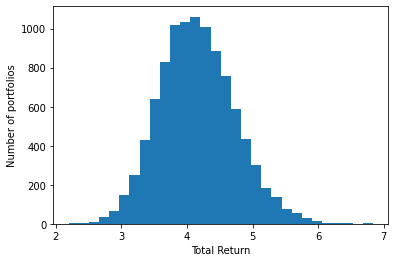

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

#
plt.hist(random_portfolios_returns, density=False, bins=30)
plt.ylabel('Number of portfolios')
plt.xlabel('Total Return');

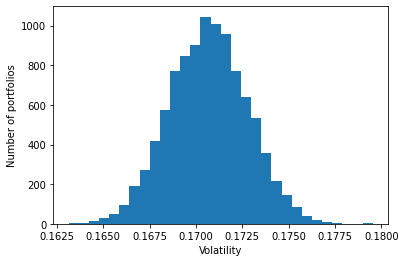

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

#
plt.hist(random_portfolios_volatilities, density=False, bins=30)
plt.ylabel('Number of portfolios')
plt.xlabel('Volatility');

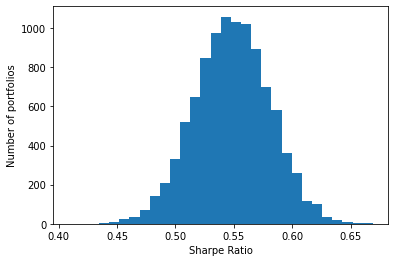

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

#
plt.hist(random_portfolios_sharpe_ratios, density=False, bins=30)
plt.ylabel('Number of portfolios')
plt.xlabel('Sharpe Ratio');

In [57]:
import scipy.stats

# Compute the percentile rank of the return, volatility and Sharpe Ratio of the portfolio invested in the MSCI ACWI index v.s. the random portfolios.
print(scipy.stats.percentileofscore(random_portfolios_returns, acwi_portfolio_return))
print(scipy.stats.percentileofscore(random_portfolios_volatilities, acwi_portfolio_volatility))
print(scipy.stats.percentileofscore(random_portfolios_sharpe_ratios, acwi_portfolio_sharpe_ratio))

0.53
0.0
4.15


> Conclusion: the performances of a portfolio made of different MSCI World/Emerging Markets indexes are better than the performances of a portfolio invested in the MSCI ACWI only, but at the expense of more volatility.

> Ultimately, the increase in Sharpe Ratio is of ~12%.